In [1]:
import sys
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import multiprocessing as mp
from multiprocessing import Pool
from esol import *

In [3]:
df = pd.read_csv("for_next_phase_only_lig_out_smiles_frm_maestro_4removed.smi", sep=" ", names=["SMILES", "NAMES"])
df

,SMILES,NAMES
0,NC(=O)c1ccc[n+](c1)[C@@H]2O[C@@H]([C@H](O)[C@H...,ZINC000238950259
1,O[P+]1(O)O[P+](O)(O)O[P+](O)(O)O[P+](O)(O)O[P+...,ZINC000257373260
2,NC(=O)c1ccc[n+](c1)[C@@H]2O[C@@H]([C@@H](O)[C@...,ZINC000238950261
3,Nc1ncnc(c12)n(cn2)[C@@H]3O[C@@H](C[C@H]3O)CO[P...,ZINC000013540909
4,O=c1ccn(c(=O)[nH]1)[C@@H]2O[C@H]([C@@H](O)[C@H...,ZINC000003875256
...,...,...
136135,COc1ccc(cc1)N[C@H]2CCC[N@H+](C2)Cc3cc(OC)c(OC)...,ZINC000011937649
136136,COc1ccc(cc1)N[C@H]2CCC[N@H+](C2)Cc3cc(OC)c(OC)...,ZINC000011937649
136137,COc1ccccc1OCCCn(cn2)c(c23)cccc3,ZINC000002868223
136138,COc1c(Cl)cc(cc1OC)C[NH2+]CCc(c[nH]2)c(c23)cccc3,ZINC000004488639


In [4]:
smiles_list = df['SMILES'].tolist()
smiles_list

['NC(=O)c1ccc[n+](c1)[C@@H]2O[C@@H]([C@H](O)[C@H]2O)CO[P+](O)(O)O[P+](O)(O)OC[C@@H]3O[C@@H]([C@@H]([C@@H]3O)O[P+](O)(O)O)n(cn4)c(c45)ncnc5N',
 'O[P+]1(O)O[P+](O)(O)O[P+](O)(O)O[P+](O)(O)O[P+](O)(O)O[P+](O1)(O)O',
 'NC(=O)c1ccc[n+](c1)[C@@H]2O[C@@H]([C@@H](O)[C@@H]2O)CO[P+](O)(O)O[P+](O)(O)OC[C@@H]3O[C@@H]([C@@H]([C@@H]3O)O[P+](O)(O)O)n(cn4)c(c45)ncnc5N',
 'Nc1ncnc(c12)n(cn2)[C@@H]3O[C@@H](C[C@H]3O)CO[P+](O)(O)O[P+](O)(O)O[P+](O)(O)O',
 'O=c1ccn(c(=O)[nH]1)[C@@H]2O[C@H]([C@@H](O)[C@H]2O)CO[P+](O)(O)O[P+](O)(O)O[P+](O)(O)O',
 'O=c1ccn(c(=O)[nH]1)[C@@H]2O[C@H]([C@H](O)[C@@H]2O)CO[P+](O)(O)O[P+](O)(O)O[P+](O)(O)O',
 'O=c1cnn(c(=O)[n-]1)[C@@H]2O[C@@H]([C@@H](O)[C@@H]2O)CO[P+](O)(O)O[P+](O)(O)O[P+](O)(O)O',
 'Nc1nc(=O)n(cc1)[C@@H]2O[C@@H]([C@H](O)[C@@H]2O)CO[P+](O)(O)O[P+](O)(O)O[P+](O)(O)O',
 'Nc1nc(=S)n(cc1)[C@@H]2O[C@@H]([C@@H](O)[C@H]2O)CO[P+](O)(O)O[P+](O)(O)O[P+](O)(O)O',
 'Nc1nc(=O)n(cc1)[C@H]2O[C@H]([C@@H](O)[C@H]2O)CO[P+](O)(O)O[P+](O)(O)O[P+](O)(O)O',
 'Nc1nc(=O)n(cc1)[C@@H]2O[C@@H

In [5]:
mol = Chem.MolFromSmiles(smiles_list[0])

In [6]:
wlogp = Descriptors.MolLogP(mol)

In [7]:
print(wlogp)

-4.2134999999999945


In [8]:
tpsab = Descriptors.TPSA(mol, includeSandP=True)

In [9]:
print(tpsab)

374.2699999999999


In [10]:
esol_calculator = ESOLCalculator()
logs = esol_calculator.calc_esol(mol)

In [11]:
print(logs)

-1.6455673237189787


In [12]:
num = len(smiles_list)
print(num)

136140


In [13]:
names_list = df['NAMES'].tolist()
names_list

['ZINC000238950259',
 'ZINC000257373260',
 'ZINC000238950261',
 'ZINC000013540909',
 'ZINC000003875256',
 'ZINC000035189340',
 'ZINC001529045279',
 'ZINC000082142140',
 'ZINC000013540477',
 'ZINC000013431057',
 'ZINC000012502058',
 'ZINC000584578731',
 'ZINC000584578731',
 'ZINC000584578731',
 'ZINC000584578731',
 'ZINC000038382752',
 'ZINC000238950253',
 'ZINC000008101193',
 'ZINC000008551165',
 'ZINC000012959016',
 'ZINC000053683723',
 'ZINC000105059333',
 'ZINC000008215945',
 'ZINC000025726233',
 'ZINC000031298140',
 'ZINC000076945729',
 'ZINC000013436738',
 'ZINC000088466482',
 'ZINC000013547944',
 'ZINC000081982903',
 'ZINC000070672626',
 'ZINC000008551162',
 'ZINC000090614026',
 'ZINC000584578379',
 'ZINC000012502057',
 'ZINC000008215971',
 'ZINC000012502055',
 'ZINC000003875257',
 'ZINC000100351450',
 'ZINC000065748564',
 'ZINC000013829365',
 'ZINC000008101193',
 'ZINC000013435050',
 'ZINC000238950256',
 'ZINC000082142138',
 'ZINC000013434884',
 'ZINC000065748567',
 'ZINC0000081

In [14]:
for i in range(num):
    mol = Chem.MolFromSmiles(smiles_list[i])
    name = names_list[i]
    wlogp = Descriptors.MolLogP(mol)
    tpsab = Descriptors.TPSA(mol, includeSandP=True)
    logs = esol_calculator.calc_esol(mol)
    all_infrm = [i, name, wlogp, tpsab, logs]
    print(all_infrm)

[0, 'ZINC000238950259', -4.2134999999999945, 374.2699999999999, -1.6455673237189787]
[1, 'ZINC000257373260', -1.9272000000000007, 298.14, -1.523267414757462]
[2, 'ZINC000238950261', -4.2134999999999945, 374.2699999999999, -1.6455673237189787]
[3, 'ZINC000013540909', -1.9144000000000005, 268.37999999999994, -1.6878190334951981]
[4, 'ZINC000003875256', -3.8154999999999997, 273.84999999999997, -0.19155589596462136]
[5, 'ZINC000035189340', -3.8154999999999997, 273.84999999999997, -0.19155589596462136]
[6, 'ZINC001529045279', -4.791399999999998, 285.04999999999995, 0.5323759918203383]
[7, 'ZINC000082142140', -3.5266000000000006, 279.9, -0.3993174381784215]
[8, 'ZINC000013540477', -2.1573100000000003, 294.91999999999996, -1.5211560649257823]
[9, 'ZINC000013431057', -3.5266000000000006, 279.9, -0.3993174381784215]
[10, 'ZINC000012502058', -3.5266000000000006, 279.9, -0.3993174381784215]
[11, 'ZINC000584578731', -4.554899999999995, 278.96999999999997, 0.4182012328044333]
[12, 'ZINC000584578731

[171, 'ZINC000036382611', -2.4748999999999963, 219.21000000000004, -1.2009436070148407]
[172, 'ZINC001529045148', -3.463199999999997, 272.0199999999999, -0.5325626055109701]
[173, 'ZINC000008214692', -9.163000000000014, 274.65, 3.95908776718704]
[174, 'ZINC000012958393', -2.9113000000000007, 232.86999999999995, -0.5462405606190117]
[175, 'ZINC000008216590', -6.843900000000011, 220.2, 2.3579298275844165]
[176, 'ZINC000008617535', -3.3551999999999995, 224.15999999999997, -0.13337229961181088]
[177, 'ZINC000038139452', -7.744900000000017, 224.77999999999997, 3.03284485449563]
[178, 'ZINC000005462369', -3.942299999999996, 194.07, 0.4168664125661349]
[179, 'ZINC000239165120', -9.879800000000014, 276.27, 4.484052860372939]
[180, 'ZINC000584577574', -9.163000000000014, 274.65, 3.95908776718704]
[181, 'ZINC000038192471', -4.831099999999996, 214.72000000000003, 1.1972335586113765]
[182, 'ZINC000013436741', -2.7863, 253.61999999999995, -0.8522208039686023]
[183, 'ZINC000013538256', -3.3290999999

[337, 'ZINC000013435054', -3.3232, 271.97999999999996, -0.42750760878311633]
[338, 'ZINC000013435054', -3.3232, 271.97999999999996, -0.42750760878311633]
[339, 'ZINC000012502055', -4.3523999999999985, 292.2099999999999, 0.2331572992208643]
[340, 'ZINC000012502055', -4.3523999999999985, 292.2099999999999, 0.2331572992208643]
[341, 'ZINC000079671663', -2.6224000000000007, 238.91999999999996, -0.7540021028328123]
[342, 'ZINC000239038528', -4.563099999999997, 195.52999999999997, 0.790970545840854]
[343, 'ZINC000071755562', -3.9736999999999956, 187.08, 0.4485423487103143]
[344, 'ZINC000256001330', -4.285699999999996, 182.29000000000002, 1.0418197268253766]
[345, 'ZINC000071792243', -4.798199999999999, 270.44999999999993, 1.0421728090317055]
[346, 'ZINC000257198558', -6.686700000000018, 212.13, 2.076029441666406]
[347, 'ZINC000242437511', -7.530300000000017, 213.74999999999994, 2.678253654739059]
[348, 'ZINC000008616006', -3.9340999999999995, 271.7799999999999, 0.11157594556589331]
[349, 'ZI

[544, 'ZINC000014960508', -2.1762000000000006, 209.97999999999996, -0.7846955819255429]
[545, 'ZINC000005125129', -5.077899999999997, 209.78, 1.1254078397019716]
[546, 'ZINC000012959005', -4.641299999999998, 286.15999999999997, 0.4409188414346654]
[547, 'ZINC000012959005', -4.641299999999998, 286.15999999999997, 0.4409188414346654]
[548, 'ZINC000016524408', 1.9158000000000013, 166.14, -4.488817851137716]
[549, 'ZINC000001532335', 0.6727000000000027, 121.75999999999999, -3.237191953082538]
[550, 'ZINC000023337287', 0.8455000000000013, 76.14, -3.10564845539303]
[551, 'ZINC000023337287', 0.8455000000000013, 76.14, -3.10564845539303]
[552, 'ZINC000169721030', -6.111400000000008, 201.13, 2.0041321355232102]
[553, 'ZINC000584577571', -8.446200000000015, 273.03, 3.4341226740011424]
[554, 'ZINC000045789106', -6.445999999999996, 194.78999999999996, 2.917905278134868]
[555, 'ZINC000031960561', -2.381399999999998, 206.20999999999998, -0.7846928123979648]
[556, 'ZINC000242437511', -6.8135000000000

[757, 'ZINC000008616004', -3.9340999999999995, 271.7799999999999, 0.11157594556589331]
[758, 'ZINC000239165118', -8.446200000000015, 273.03, 3.434122674001142]
[759, 'ZINC000004556640', -7.212900000000013, 250.48, 2.6203861538744992]
[760, 'ZINC000062613207', -2.2033, 262.3299999999999, -1.4800574912813977]
[761, 'ZINC000253529517', -1.3815000000000004, 186.04, -2.063451962671067]
[762, 'ZINC000004552106', 0.9949999999999994, 176.76, -3.8922070953187227]
[763, 'ZINC000038139448', -6.001900000000007, 218.58, 1.7534407472695492]
[764, 'ZINC000257272925', 0.1641000000000043, 90.64000000000001, -2.72650145700906]
[765, 'ZINC000059846619', -7.2660000000000045, 208.32000000000002, 3.5085027247554756]
[766, 'ZINC000584577855', -7.028100000000014, 223.15999999999997, 2.5078797613097272]
[767, 'ZINC000095921560', -2.9113000000000007, 232.86999999999995, -0.5462405606190117]
[768, 'ZINC000004027791', -3.733899999999995, 172.19, 0.9918248645328288]
[769, 'ZINC000005707379', 0.6168999999999998, 15

[966, 'ZINC000225512396', -1.723499999999995, 110.24000000000001, -1.3061553579236445]
[967, 'ZINC000017077541', 1.1123999999999996, 112.17, -3.3265751621192265]
[968, 'ZINC000031308647', -3.3291, 258.88999999999993, -0.33060227744377046]
[969, 'ZINC000004972306', 1.0946999999999991, 168.28, -3.8851091492019156]
[970, 'ZINC000008377035', 2.2277000000000013, 51.68000000000001, -4.109661470048477]
[971, 'ZINC000100749650', -0.03539999999999899, 112.99000000000001, -2.688689976033555]
[972, 'ZINC000426527692', -1.9162999999999955, 99.87, -0.6414598724289706]
[973, 'ZINC000060184556', -5.594500000000007, 219.92000000000002, 1.457949574937925]
[974, 'ZINC000060184552', -6.311300000000012, 221.54, 1.982914668123826]
[975, 'ZINC000039592645', -4.384399999999994, 165.05, 1.2595017695260333]
[976, 'ZINC000001679809', 1.9883999999999997, 108.77000000000001, -4.661501720718532]
[977, 'ZINC000035458004', -1.3815000000000004, 186.04, -2.063451962671067]
[978, 'ZINC000008993364', 0.26152, 191.489999

[1169, 'ZINC000004534086', -4.230600000000009, 222.35, 0.09036478155269106]
[1170, 'ZINC000015728905', -3.169799999999995, 79.97, 0.4771030117747094]
[1171, 'ZINC000023352303', -0.013699999999994494, 50.45, -2.91633637170217]
[1172, 'ZINC000023352303', -0.013699999999994494, 50.45, -2.91633637170217]
[1173, 'ZINC000012540241', 0.9210400000000024, 92.14, -3.4809643131670134]
[1174, 'ZINC000002290922', -2.787199999999995, 159.92000000000002, 0.10069125969675649]
[1175, 'ZINC000060184554', -6.718700000000011, 220.2, 2.2784058404554504]
[1176, 'ZINC000004217451', -4.831099999999996, 214.72000000000003, 1.1972335586113765]
[1177, 'ZINC000644163629', -4.384399999999994, 165.05, 1.2595017695260333]
[1178, 'ZINC000004991083', -1.052799999999994, 130.08999999999997, -1.4592186049831857]
[1179, 'ZINC000644163630', -4.384399999999994, 165.05, 1.2595017695260333]
[1180, 'ZINC000013829365', -1.7126000000000006, 260.46, -1.7195339188428334]
[1181, 'ZINC000013829365', -1.7126000000000006, 260.46, -1.

[1356, 'ZINC000888096525', -2.281099999999994, 141.12, -0.2915560586689549]
[1357, 'ZINC000095373936', -1.9228999999999943, 77.55, -0.8086588709365452]
[1358, 'ZINC000065255856', 0.004900000000003457, 66.28, -2.510770108316504]
[1359, 'ZINC000020462611', -2.619, 149.01999999999998, 0.8344266704466236]
[1360, 'ZINC000003871513', -1.6027999999999962, 131.88, -1.4206100648601605]
[1361, 'ZINC000065464251', 1.3852000000000004, 69.89, -3.508756222595795]
[1362, 'ZINC000065425691', -2.9548799999999957, 76.32, 0.3270571858658533]
[1363, 'ZINC000019224907', -0.3386999999999958, 62.98, -2.150899262893595]
[1364, 'ZINC000019224907', -0.3386999999999958, 62.98, -2.150899262893595]
[1365, 'ZINC000019224907', -0.3386999999999958, 62.98, -2.150899262893595]
[1366, 'ZINC000257283587', -0.5887999999999962, 79.0, -1.6556774050914604]
[1367, 'ZINC000064566025', 3.472520000000003, 72.81, -5.457404185783808]
[1368, 'ZINC000103310420', 2.3594, 58.2, -3.6664769804049913]
[1369, 'ZINC000020876527', 2.3282000

[1544, 'ZINC000004099004', 0.04809999999999953, 136.35, -2.79043709499951]
[1545, 'ZINC000105363265', -6.686700000000018, 212.12999999999997, 2.076029441666406]
[1546, 'ZINC000105363265', -6.686700000000018, 212.12999999999997, 2.076029441666406]
[1547, 'ZINC000013507361', -1.5555999999999957, 139.11, -0.8706936230883702]
[1548, 'ZINC000015864137', -1.2592999999999952, 61.67, -1.382114400521077]
[1549, 'ZINC000397617401', -3.733499999999994, 45.72, 1.4241517187532888]
[1550, 'ZINC000397617401', -3.733499999999994, 45.72, 1.4241517187532888]
[1551, 'ZINC000009995024', -4.186999999999997, 121.44999999999999, 0.9233360654041606]
[1552, 'ZINC000257228643', 5.7836200000000035, 82.92000000000002, -7.244058259482513]
[1553, 'ZINC000644163780', -8.327800000000012, 258.84, 3.5397110921981576]
[1554, 'ZINC000095521062', 1.255300000000002, 53.05, -3.366186037263465]
[1555, 'ZINC000014701000', 4.133300000000003, 48.13, -5.330606139747991]
[1556, 'ZINC000036847832', 3.4040000000000026, 74.61, -4.80

[1700, 'ZINC000257198557', -6.686700000000016, 212.12999999999994, 2.076029441666404]
[1701, 'ZINC000225967066', 4.375800000000003, 88.41, -6.288772100352254]
[1702, 'ZINC000224576646', -2.245400000000001, 209.19999999999996, -1.143868807549871]
[1703, 'ZINC000005605736', -5.255100000000003, 183.54, 1.8433525520588447]
[1704, 'ZINC000001588623', 2.5906200000000004, 106.4, -4.37122749485478]
[1705, 'ZINC000031155527', 0.058499999999998775, 179.28, -3.0298920466823307]
[1706, 'ZINC000100473135', -8.446200000000015, 273.03, 3.4341226740011424]
[1707, 'ZINC000030691566', -1.0608999999999975, 158.02, -2.275243550834011]
[1708, 'ZINC000001530830', -0.11179999999999995, 90.15, -1.7338631682983103]
[1709, 'ZINC000038139449', -6.311300000000011, 221.54, 1.982914668123826]
[1710, 'ZINC000644163851', -7.241800000000011, 252.76999999999998, 2.50757609805426]
[1711, 'ZINC000035395341', -1.9559, 127.9, -0.2508132171265427]
[1712, 'ZINC000072435720', -0.38639999999999786, 105.61, -1.9003681114345812]

[1865, 'ZINC000013540909', -2.7402, 280.68999999999994, -1.0553442960959112]
[1866, 'ZINC000013540909', -2.7402, 280.68999999999994, -1.0553442960959112]
[1867, 'ZINC000023693822', 4.658300000000003, 47.56, -5.94666753631918]
[1868, 'ZINC000100505444', -6.813500000000009, 212.12999999999994, 2.1532885615531527]
[1869, 'ZINC000009659886', -3.0079, 209.19999999999996, -0.06292709183714529]
[1870, 'ZINC000070672626', -5.543400000000006, 209.34999999999997, 1.426425820895311]
[1871, 'ZINC000072134499', -1.004779999999997, 73.75999999999999, -1.2884463969123756]
[1872, 'ZINC000071749965', 2.0656, 88.84999999999998, -3.710797544865781]
[1873, 'ZINC000584578379', -3.0387799999999983, 263.28, -0.741093982514093]
[1874, 'ZINC000584578379', -3.0387799999999983, 263.28, -0.741093982514093]
[1875, 'ZINC000242346998', 1.7727, 103.88000000000001, -3.8505628490402626]
[1876, 'ZINC000009938536', 0.07730000000000059, 181.07, -3.2219520889790143]
[1877, 'ZINC000004978214', 3.7429000000000023, 64.63, -5.

[2014, 'ZINC000004533723', -8.88460000000001, 277.45, 3.9497509095055183]
[2015, 'ZINC000034028377', -5.829500000000004, 174.53, 2.4776300034164485]
[2016, 'ZINC000006551983', 4.4444000000000035, 52.60000000000001, -5.705004259209649]
[2017, 'ZINC000013544128', 1.2624999999999997, 105.45000000000002, -3.083300623275567]
[2018, 'ZINC000072293627', 3.541500000000002, 58.56, -4.826942905708335]
[2019, 'ZINC000257314102', -0.10259999999999725, 74.07, -2.021074612174707]
[2020, 'ZINC000257314102', -0.10259999999999725, 74.07, -2.021074612174707]
[2021, 'ZINC000585268702', 0.9347000000000009, 72.59, -3.284625125624734]
[2022, 'ZINC000585268702', 0.9347000000000009, 72.59, -3.284625125624734]
[2023, 'ZINC000001566359', -1.631399999999995, 151.58999999999997, -1.8343350258759923]
[2024, 'ZINC000224703249', 4.763300000000004, 74.71000000000001, -6.601048776383198]
[2025, 'ZINC000097745174', -2.6338999999999952, 85.72, 0.2580106285825833]
[2026, 'ZINC000257355022', -4.292799999999997, 188.599999

[2186, 'ZINC000033455762', 4.962640000000004, 58.2, -6.439487621858242]
[2187, 'ZINC000248165048', -1.469199999999993, 13.32, -0.8463220335158507]
[2188, 'ZINC000248165048', -1.469199999999993, 13.32, -0.8463220335158507]
[2189, 'ZINC000426701383', -0.6405799999999973, 84.67, -1.6164023325098207]
[2190, 'ZINC000033282776', 3.500740000000003, 72.81, -5.370593620702991]
[2191, 'ZINC000004097029', -4.292999999999998, 167.48000000000002, 1.7282431307389239]
[2192, 'ZINC000584569310', -4.737600000000005, 195.51999999999998, 0.7196218796203431]
[2193, 'ZINC000013014295', 4.702600000000004, 99.88, -6.498648764107123]
[2194, 'ZINC000072293626', 3.541500000000002, 58.56, -4.826942905708335]
[2195, 'ZINC000014704303', 4.2741000000000025, 63.35000000000001, -5.751177016315267]
[2196, 'ZINC000208016658', 0.30350000000000027, 178.23, -3.392690018781378]
[2197, 'ZINC000222636906', 3.3885000000000014, 84.09, -5.395110068619035]
[2198, 'ZINC000005606507', -7.548399999999998, 202.36999999999995, 3.4178

[2388, 'ZINC000426368338', -0.46949999999999686, 84.99000000000001, -1.7900080991197103]
[2389, 'ZINC000426368338', -0.46949999999999686, 84.99000000000001, -1.7900080991197103]
[2390, 'ZINC000006638680', 4.343300000000003, 47.56, -5.636846551714614]
[2391, 'ZINC000014960497', -1.8550000000000006, 160.29, -0.5154980805888711]
[2392, 'ZINC000256001329', -4.866599999999999, 183.54000000000002, 1.4659913298881495]
[2393, 'ZINC000219442306', 2.8000000000000007, 117.23, -4.847950265520918]
[2394, 'ZINC000019234940', 0.554020000000002, 62.790000000000006, -2.620177165037575]
[2395, 'ZINC000012709736', 3.090700000000001, 80.82, -5.196488417169828]
[2396, 'ZINC000245204716', 4.1864000000000035, 86.99000000000001, -5.7425359385807315]
[2397, 'ZINC000077406819', -2.062799999999994, 65.92, -0.25397838569215825]
[2398, 'ZINC000100234264', 0.6159000000000006, 78.0, -2.8586384601138937]
[2399, 'ZINC000007339379', 4.375200000000002, 68.12, -5.481468513947305]
[2400, 'ZINC000079438918', -1.31419999999

[2569, 'ZINC000585286346', -1.618399999999995, 122.71000000000001, -0.8425628885097249]
[2570, 'ZINC000049031460', 4.104900000000003, 46.61, -5.3623144263126115]
[2571, 'ZINC000013536447', -4.477000000000001, 220.75999999999996, 1.332682730589038]
[2572, 'ZINC000020572574', 0.2809000000000008, 72.2, -2.516401659546329]
[2573, 'ZINC000685940963', -1.0884999999999945, 84.37, -1.2263534536223966]
[2574, 'ZINC000585270791', 0.01910000000000278, 79.53, -2.714941615483551]
[2575, 'ZINC000016525648', 4.053700000000003, 144.2, -6.0062215256258895]
[2576, 'ZINC000260707726', 4.079620000000003, 85.17000000000002, -5.58234434265091]
[2577, 'ZINC001772710806', -1.334999999999996, 50.510000000000005, -0.8099934498421593]
[2578, 'ZINC000034572331', -0.4855999999999971, 85.71000000000001, -1.6659727689962371]
[2579, 'ZINC000095534846', 1.3320999999999994, 87.75000000000001, -2.912102192958287]
[2580, 'ZINC000002944417', -0.13729999999999631, 141.17, -2.975554917895966]
[2581, 'ZINC000008101114', -6.8

[2811, 'ZINC000040719688', 0.8830000000000013, 42.45, -2.606551711571857]
[2812, 'ZINC000408702292', 3.3153000000000024, 118.61999999999999, -5.539509155291882]
[2813, 'ZINC000261760528', -1.7381999999999953, 73.78999999999999, -0.40459050625321524]
[2814, 'ZINC000003437416', 4.442000000000004, 51.47, -5.575107847049507]
[2815, 'ZINC000257202408', -5.059399999999997, 238.43999999999997, 0.9689793344951982]
[2816, 'ZINC000257202408', -5.059399999999997, 238.43999999999997, 0.9689793344951982]
[2817, 'ZINC000021657311', 2.746900000000001, 78.51, -4.444315303242602]
[2818, 'ZINC000002384966', -2.696799999999996, 141.76, 0.013307159392540124]
[2819, 'ZINC000073333313', -1.5104999999999968, 162.5, -1.9041617523924048]
[2820, 'ZINC000006997100', 3.9277000000000024, 51.47, -5.084833459406605]
[2821, 'ZINC000010314090', 2.696900000000002, 54.14, -4.538471646546872]
[2822, 'ZINC000020206617', 0.9910999999999996, 103.50999999999999, -3.3816447260064493]
[2823, 'ZINC000081168754', -3.507079999999

[3020, 'ZINC000095525063', 0.36550000000000266, 68.74000000000001, -2.7062710100096288]
[3021, 'ZINC000095525063', 0.36550000000000266, 68.74000000000001, -2.7062710100096288]
[3022, 'ZINC000195529346', 1.3314000000000017, 73.86999999999999, -3.600092672386277]
[3023, 'ZINC000072147332', -2.943099999999994, 106.86999999999999, 0.05814362997961664]
[3024, 'ZINC000072147332', -2.943099999999994, 106.86999999999999, 0.05814362997961664]
[3025, 'ZINC000010434655', 1.4501000000000004, 51.68, -3.367535291279993]
[3026, 'ZINC000097570980', 3.8263000000000025, 51.22, -5.090983471658111]
[3027, 'ZINC000013592793', 2.9288000000000016, 103.96000000000001, -5.324497875537514]
[3028, 'ZINC000015864141', -1.439999999999993, 90.77000000000001, -1.4935217520391628]
[3029, 'ZINC000003830849', -2.1621000000000006, 189.23, -0.7034031653118465]
[3030, 'ZINC000031815375', -4.087599999999993, 117.36999999999999, 0.4280366699471939]
[3031, 'ZINC000031815375', -4.087599999999993, 117.36999999999999, 0.4280366

[3203, 'ZINC000024660115', 4.470000000000003, 62.400000000000006, -5.832993967405399]
[3204, 'ZINC000004533970', -6.253900000000008, 235.74, 1.73021885959048]
[3205, 'ZINC000009282600', 4.786540000000003, 110.21, -6.368587186017478]
[3206, 'ZINC000072473506', -0.2552799999999966, 58.86, -1.9112098166519722]
[3207, 'ZINC000101372704', -0.4101999999999961, 73.42, -2.262073873199582]
[3208, 'ZINC000033333794', 4.780900000000004, 40.620000000000005, -6.286882391212114]
[3209, 'ZINC000001043440', 4.776800000000003, 85.9, -6.43708534546588]
[3210, 'ZINC000007540220', 0.9634000000000025, 51.68000000000001, -2.814178954277535]
[3211, 'ZINC000072482407', 2.1376, 36.78, -3.7402856881308013]
[3212, 'ZINC000299786352', 3.4875000000000016, 83.81, -4.794912032399623]
[3213, 'ZINC000299801622', -0.4862799999999971, 101.37, -1.5070543831689904]
[3214, 'ZINC000067758471', 0.943500000000002, 57.86, -2.8282713702717546]
[3215, 'ZINC000067758471', 0.943500000000002, 57.86, -2.8282713702717546]
[3216, 'ZIN

[3403, 'ZINC000003831428', -2.044760000000001, 211.24999999999997, -1.4154824529206822]
[3404, 'ZINC000067981824', -1.1534999999999958, 92.22, -1.4638053688496167]
[3405, 'ZINC000089262098', 2.7550000000000012, 62.22, -3.905460305931539]
[3406, 'ZINC001569989210', -3.307100000000001, 193.44, -0.002449662365616896]
[3407, 'ZINC000261698835', -0.726999999999997, 64.56, -1.1415286260862667]
[3408, 'ZINC000218986632', 4.936620000000004, 38.33, -6.03419158941866]
[3409, 'ZINC000010434158', -0.8471999999999953, 113.47999999999999, -1.4512219539729905]
[3410, 'ZINC000009963914', 3.233200000000002, 98.36, -5.419192200322711]
[3411, 'ZINC000426370144', 0.9842, 83.01, -2.900938049326399]
[3412, 'ZINC000225519916', -0.2064999999999957, 112.70000000000002, -2.9100690704385985]
[3413, 'ZINC000015075306', 0.6727000000000034, 38.419999999999995, -3.2093899542132776]
[3414, 'ZINC000006786905', 3.9204000000000025, 54.56, -5.272940533513781]
[3415, 'ZINC000005273845', -3.227799999999996, 137.32999999999

[3596, 'ZINC000009116312', 4.938700000000003, 108.66999999999999, -6.707805373469807]
[3597, 'ZINC000009264459', 1.24574, 93.71000000000001, -3.2418201908627426]
[3598, 'ZINC000022363213', 3.863400000000002, 77.77, -5.496248920067249]
[3599, 'ZINC000299783774', -1.3524799999999957, 79.64, -0.9618996181372597]
[3600, 'ZINC000013829327', -1.0413999999999974, 197.67000000000002, -2.0126089557718507]
[3601, 'ZINC000035453019', 2.69482, 113.19, -4.960104837607226]
[3602, 'ZINC000001747592', -6.320999999999995, 211.47999999999996, 2.7010177423472848]
[3603, 'ZINC000225077688', 3.2051000000000016, 117.23, -5.174211678914767]
[3604, 'ZINC000006889756', 3.035300000000001, 92.88, -4.890274431531458]
[3605, 'ZINC000014768526', -6.730199999999998, 202.79000000000002, 3.075654077960516]
[3606, 'ZINC000021275439', 1.3282000000000007, 57.370000000000005, -3.3957840409315785]
[3607, 'ZINC000021275439', 1.3282000000000007, 57.370000000000005, -3.3957840409315785]
[3608, 'ZINC000003798304', -4.384399999

[3763, 'ZINC000023114537', -1.8771999999999944, 130.04999999999998, -1.6355374420505766]
[3764, 'ZINC000020522050', 1.328799999999999, 72.2, -3.5146512075510983]
[3765, 'ZINC000068722560', -0.5454999999999977, 48.739999999999995, -1.4730656043557087]
[3766, 'ZINC000017064763', 2.943320000000001, 95.17000000000002, -5.33871852689146]
[3767, 'ZINC000069927461', -0.6163999999999947, 38.34, -1.3341685056393082]
[3768, 'ZINC000193406288', -0.798799999999998, 82.58, -1.3196420099571902]
[3769, 'ZINC000034636383', 1.3497999999999997, 104.63, -3.461007247078969]
[3770, 'ZINC000020540993', -0.03859999999999375, 62.980000000000004, -2.675099527900629]
[3771, 'ZINC000020540993', -0.03859999999999375, 62.980000000000004, -2.675099527900629]
[3772, 'ZINC000020540993', -0.03859999999999375, 62.980000000000004, -2.675099527900629]
[3773, 'ZINC000071283472', -0.5079999999999985, 97.14, -2.0566169282463895]
[3774, 'ZINC000014993199', -0.3723999999999945, 76.17, -2.3437164892622597]
[3775, 'ZINC00001499

[3954, 'ZINC000020109786', 0.7065000000000017, 64.83000000000001, -3.0669105721914973]
[3955, 'ZINC000020487186', 4.144620000000002, 73.01, -5.605519053737468]
[3956, 'ZINC000010435484', 2.0649000000000006, 42.45, -4.047598913962646]
[3957, 'ZINC000048264626', 3.1195200000000014, 96.12, -4.969627366652064]
[3958, 'ZINC000091551050', -0.3807999999999953, 51.97, -1.7381935289199861]
[3959, 'ZINC000245224242', -7.266000000000003, 208.32, 3.508502724755474]
[3960, 'ZINC000097259158', 0.6362000000000013, 37.43, -2.6931043508406276]
[3961, 'ZINC000097259158', 0.6362000000000013, 37.43, -2.6931043508406276]
[3962, 'ZINC000409241659', 4.8598000000000035, 83.65, -6.447081548565302]
[3963, 'ZINC000008377268', 1.5657000000000019, 42.45, -3.2236209894703887]
[3964, 'ZINC000205972421', 1.1576999999999988, 112.03000000000002, -3.722953891891462]
[3965, 'ZINC000012711548', 3.6929200000000026, 103.1, -5.429036583291381]
[3966, 'ZINC000035801098', 2.1227, 89.93, -4.130212853039566]
[3967, 'ZINC00040914

[4172, 'ZINC000223239435', 4.904800000000004, 74.71000000000001, -6.408550302990328]
[4173, 'ZINC000008373855', 2.179000000000002, 39.510000000000005, -4.158445708980262]
[4174, 'ZINC000008373855', 2.179000000000002, 39.510000000000005, -4.158445708980262]
[4175, 'ZINC000004534299', 0.2821200000000024, 152.04999999999998, -3.02045002444995]
[4176, 'ZINC000043769661', -2.754899999999995, 191.81, -0.8872781917210052]
[4177, 'ZINC000017141414', 3.5747000000000027, 58.64, -4.887147795720113]
[4178, 'ZINC000026665347', -4.491099999999998, 180.82, 0.7668439775674447]
[4179, 'ZINC000020875047', 1.8827200000000006, 51.68000000000001, -3.718756490657103]
[4180, 'ZINC000039438674', -1.666299999999998, 136.20999999999998, -0.3878409597980289]
[4181, 'ZINC000585290688', -1.5007999999999972, 97.61000000000001, -0.8517358042914829]
[4182, 'ZINC000033986359', -3.2951999999999972, 146.89000000000001, 0.7892185285273912]
[4183, 'ZINC000000670144', 4.296000000000003, 72.47, -5.727878241432837]
[4184, 'Z

[4360, 'ZINC000096623690', 3.777400000000002, 29.1, -4.531575670063597]
[4361, 'ZINC000047409129', 4.611520000000002, 70.23, -5.731657239014455]
[4362, 'ZINC000225601034', 4.699940000000003, 107.75, -6.049094586641283]
[4363, 'ZINC000003922524', -8.468600000000007, 229.73999999999998, 4.289438387277609]
[4364, 'ZINC000032900892', 0.7521000000000011, 103.75000000000001, -3.6672327147837724]
[4365, 'ZINC000032900892', 0.7521000000000011, 103.75000000000001, -3.6672327147837724]
[4366, 'ZINC000078953450', 2.1384, 61.36, -3.3256508824590303]
[4367, 'ZINC000046004431', 3.059640000000001, 92.68, -5.082103529942731]
[4368, 'ZINC000225029436', 2.5730000000000004, 96.55999999999999, -4.899903141601553]
[4369, 'ZINC000095358046', 0.40080000000000077, 68.03999999999999, -2.7080941621969115]
[4370, 'ZINC000095358046', 0.40080000000000077, 68.03999999999999, -2.7080941621969115]
[4371, 'ZINC000005462303', -0.5565000000000004, 175.61999999999998, -1.9708179372729975]
[4372, 'ZINC000092107966', -2.00

[4554, 'ZINC000097200813', 0.5747200000000023, 59.71000000000001, -2.446509250885424]
[4555, 'ZINC000097200813', 0.5747200000000023, 59.71000000000001, -2.446509250885424]
[4556, 'ZINC000003504146', 2.0747, 83.65, -3.8515709601877224]
[4557, 'ZINC000009364643', 2.3782000000000014, 146.02, -4.825723433308785]
[4558, 'ZINC000009364644', 2.3782000000000014, 146.02, -4.825723433308785]
[4559, 'ZINC000034735461', 4.847800000000004, 61.88, -6.502394210651497]
[4560, 'ZINC000012630280', 4.500600000000003, 113.11000000000001, -6.080437073622899]
[4561, 'ZINC000072203816', -0.5105799999999976, 77.46000000000001, -1.5832584015615347]
[4562, 'ZINC000012495398', -2.3826, 179.97, 0.011424867916334625]
[4563, 'ZINC000012495398', -2.3826, 179.97, 0.011424867916334625]
[4564, 'ZINC000024983504', 3.7778000000000027, 83.65, -5.407271358700081]
[4565, 'ZINC000023387009', 0.674800000000001, 57.370000000000005, -2.6912282207484397]
[4566, 'ZINC000023387009', 0.674800000000001, 57.370000000000005, -2.691228

[4755, 'ZINC000072432329', -0.519499999999997, 59.150000000000006, -1.5460889102740438]
[4756, 'ZINC000067204984', 0.6056000000000017, 102.80000000000001, -3.5834193496672784]
[4757, 'ZINC000012973406', 3.215320000000002, 84.09000000000002, -4.947671488910356]
[4758, 'ZINC000040721716', 1.9915999999999996, 85.67, -3.998923349237305]
[4759, 'ZINC000020761793', 2.2611999999999997, 113.19, -4.602827367574393]
[4760, 'ZINC000072170545', -2.6033999999999935, 103.1, -0.19393528932606474]
[4761, 'ZINC000004686166', 0.9435000000000029, 92.14, -3.4026298974204754]
[4762, 'ZINC000022922027', -0.9805999999999948, 96.20000000000002, -1.6812985553923605]
[4763, 'ZINC000039797810', -4.866599999999999, 183.54000000000002, 1.4659913298881495]
[4764, 'ZINC000224274108', 4.799100000000005, 38.33, -5.853804617602674]
[4765, 'ZINC000257196033', 1.8722000000000032, 41.36, -4.04989240777513]
[4766, 'ZINC000257196033', 1.8722000000000032, 41.36, -4.04989240777513]
[4767, 'ZINC000004792399', 0.927220000000004

[4959, 'ZINC000058051000', 0.8629000000000018, 68.97, -3.3287089186639673]
[4960, 'ZINC000097155874', 0.9209000000000005, 50.540000000000006, -2.7831304018627625]
[4961, 'ZINC000644163850', -6.660900000000007, 251.51999999999998, 2.0834044949914867]
[4962, 'ZINC000096932144', 3.0779000000000014, 58.64, -4.590837248704731]
[4963, 'ZINC000081701466', 2.3678, 58.56, -3.7560441762181482]
[4964, 'ZINC000013117978', 3.215700000000002, 101.16, -5.487045658849787]
[4965, 'ZINC000095498153', 1.1231000000000027, 43.82, -2.9414740916425712]
[4966, 'ZINC000017087417', 5.498940000000004, 104.74999999999999, -6.746443811348842]
[4967, 'ZINC000009708901', 4.214200000000003, 75.2, -5.8569109404266335]
[4968, 'ZINC000001792679', 2.3843999999999994, 176.39, -4.758152268440915]
[4969, 'ZINC000004979061', 3.228600000000002, 64.63, -4.669603829363446]
[4970, 'ZINC000072371788', 4.772400000000004, 58.22, -6.4073914229008135]
[4971, 'ZINC000011821271', 2.1096999999999992, 66.66, -3.988560513731244]
[4972, 'Z

[5150, 'ZINC000012572755', 3.974700000000004, 38.769999999999996, -5.305292894780777]
[5151, 'ZINC000072203819', -0.5105799999999976, 77.46000000000001, -1.5832584015615347]
[5152, 'ZINC000220633787', 0.0702000000000001, 112.95, -1.9994814394612193]
[5153, 'ZINC000225077468', 2.7190200000000004, 117.22999999999999, -4.596100936380119]
[5154, 'ZINC000012293597', 2.8154000000000012, 63.36, -4.814421528319429]
[5155, 'ZINC000015075307', 0.6727000000000034, 38.419999999999995, -3.2093899542132776]
[5156, 'ZINC000002386306', 3.2081000000000017, 58.59, -4.60571604721313]
[5157, 'ZINC000257289011', 1.5105999999999997, 81.17999999999999, -4.030256094231671]
[5158, 'ZINC000014951284', -2.5901000000000005, 183.17999999999998, -0.28044069149143047]
[5159, 'ZINC000299795155', -1.9132999999999971, 142.37, -0.7354345413297941]
[5160, 'ZINC000003544041', 4.132800000000003, 77.77000000000001, -5.45931197940173]
[5161, 'ZINC000253561390', -5.210799999999994, 181.63, 1.1917343643357263]
[5162, 'ZINC0000

[5329, 'ZINC000032721147', 2.497, 95.08999999999999, -4.2730808481440095]
[5330, 'ZINC000524730576', 1.6216200000000005, 59.31999999999999, -3.804926669689744]
[5331, 'ZINC000010103507', 2.9495000000000013, 84.09, -4.939743305165738]
[5332, 'ZINC000031033888', 2.4319000000000006, 78.05000000000001, -4.00395984196455]
[5333, 'ZINC000001405921', 4.482400000000003, 63.78, -5.898872296868738]
[5334, 'ZINC000095355164', 0.19510000000000294, 48.75, -2.3183176795012]
[5335, 'ZINC000585662374', -3.204199999999998, 146.92000000000002, 0.3788020866805325]
[5336, 'ZINC000408585774', 4.958700000000004, 52.60000000000001, -6.195278646852551]
[5337, 'ZINC000257309819', -0.7029999999999967, 112.36, -2.153878653688855]
[5338, 'ZINC000257265848', -1.745199999999994, 149.12, -1.705997698353208]
[5339, 'ZINC000097730338', -4.674199999999999, 182.29, 1.4191809489960714]
[5340, 'ZINC000067350059', -2.3243999999999962, 99.50999999999999, -0.2838413982788196]
[5341, 'ZINC000253473081', 2.1195999999999993, 90

[5530, 'ZINC000225616362', 4.870820000000004, 101.76, -6.354681840907846]
[5531, 'ZINC000002530808', -2.7897799999999977, 179.69, -0.37665301498504566]
[5532, 'ZINC000009519410', 3.0726000000000013, 121.72999999999999, -5.453930486971144]
[5533, 'ZINC000013673041', 3.597000000000002, 20.310000000000002, -4.407018959196402]
[5534, 'ZINC000096845462', 3.7706000000000026, 75.97, -5.363961351067995]
[5535, 'ZINC000299751089', -2.3063999999999956, 79.61, -0.170134914269243]
[5536, 'ZINC000299751089', -2.3063999999999956, 79.61, -0.170134914269243]
[5537, 'ZINC000218994569', 1.7401000000000004, 79.53, -3.677741124928067]
[5538, 'ZINC000005887674', -0.3666999999999949, 38.34, -1.7650412404036342]
[5539, 'ZINC000220686932', 3.8744000000000023, 83.81, -5.078414138994359]
[5540, 'ZINC000022929812', -0.3033999999999961, 84.34, -2.1603445180753433]
[5541, 'ZINC000095503930', -1.3473999999999928, 58.239999999999995, -1.3663557953164207]
[5542, 'ZINC000003650235', -2.449779999999999, 187.57999999999

[5713, 'ZINC000257332936', 0.9783000000000008, 117.42999999999999, -3.543982698652603]
[5714, 'ZINC000223461302', 3.214900000000002, 84.09, -5.15217010696251]
[5715, 'ZINC000072123877', -0.27529999999999477, 65.56, -2.2213829432196848]
[5716, 'ZINC000072123877', -0.27529999999999477, 65.56, -2.2213829432196848]
[5717, 'ZINC000096461947', 2.6793000000000013, 41.57, -3.9326049592859227]
[5718, 'ZINC000222960576', 4.126500000000004, 74.86, -5.806554057428831]
[5719, 'ZINC000007514766', 1.1309, 98.49000000000001, -2.641756772625438]
[5720, 'ZINC000052603023', 2.675300000000001, 71.62, -4.256258349149192]
[5721, 'ZINC000095511056', 1.059200000000002, 60.89, -3.2108617290712567]
[5722, 'ZINC000020025158', 4.023600000000003, 92.88, -6.000600303849492]
[5723, 'ZINC000058167431', 4.143800000000002, 98.91000000000001, -6.066873286421874]
[5724, 'ZINC000257284972', -3.5263999999999944, 81.74000000000001, 1.2576671956839967]
[5725, 'ZINC000408708907', 2.6564000000000005, 87.30000000000001, -4.3737

[5905, 'ZINC000409229980', 3.2753000000000023, 102.11000000000001, -5.245603370426725]
[5906, 'ZINC000065398847', 1.8370199999999994, 95.09000000000002, -3.8428667119309203]
[5907, 'ZINC000244659667', -0.09169999999999678, 83.1, -2.2926238724666224]
[5908, 'ZINC000244659667', -0.09169999999999678, 83.1, -2.2926238724666224]
[5909, 'ZINC000585291991', 0.4986000000000011, 77.38000000000001, -2.8263684970911416]
[5910, 'ZINC000006738895', 4.865020000000003, 55.11, -6.130798752249286]
[5911, 'ZINC000257297476', 1.9082199999999998, 107.43, -3.6039736568302554]
[5912, 'ZINC000257297476', 1.9082199999999998, 107.43, -3.6039736568302554]
[5913, 'ZINC000014072499', 3.650800000000001, 46.53, -4.8557396838886095]
[5914, 'ZINC000224353716', 4.002400000000002, 74.71000000000001, -5.517747704865703]
[5915, 'ZINC000010434569', 1.9557999999999995, 42.45, -3.6726884936791047]
[5916, 'ZINC000056922559', 4.375200000000004, 54.84, -5.596907723669271]
[5917, 'ZINC000019322419', -3.621199999999996, 108.8300

[6081, 'ZINC000096511478', -0.5112999999999996, 75.84, -1.057280000362317]
[6082, 'ZINC000015784179', 4.513240000000002, 80.05000000000001, -5.851766341326746]
[6083, 'ZINC000090592822', 4.612020000000003, 110.5, -5.865305824079457]
[6084, 'ZINC000002390894', -2.200199999999997, 117.10000000000001, 0.09973190577383975]
[6085, 'ZINC000005208869', -5.577200000000002, 191.11, 2.4222494406234905]
[6086, 'ZINC000019703285', 4.024600000000004, 91.92999999999999, -5.809705273408468]
[6087, 'ZINC000223060303', -0.3422, 92.47000000000001, -1.6940271127139142]
[6088, 'ZINC000252494313', 1.5736999999999999, 79.82, -3.288662287778751]
[6089, 'ZINC000008671751', 0.5250200000000007, 118.86000000000001, -3.3498771045337254]
[6090, 'ZINC000040720670', 2.872500000000003, 42.45, -4.629096104987829]
[6091, 'ZINC000003201891', -2.3012000000000006, 189.23, -0.4882022337052313]
[6092, 'ZINC000102243723', 1.5788999999999997, 71.56, -3.0306475549843888]
[6093, 'ZINC000008124377', 3.744600000000002, 76.66, -5.

[6246, 'ZINC000005618676', 0.7785200000000029, 161.27999999999997, -3.57121721526928]
[6247, 'ZINC000225570541', 4.874800000000003, 74.86, -6.693936971446971]
[6248, 'ZINC000012321701', -0.796799999999996, 63.97, -2.121440000481606]
[6249, 'ZINC000077419118', -1.3566799999999977, 71.27, -0.7385526500226047]
[6250, 'ZINC000257294632', -0.6808999999999978, 68.02000000000001, -1.5099934440124752]
[6251, 'ZINC000255973203', -3.398799999999999, 168.94, 0.7971287497346726]
[6252, 'ZINC000199792723', 2.603200000000001, 93.06000000000002, -4.371857890022412]
[6253, 'ZINC000096426265', 2.03514, 87.08999999999999, -3.7517020456353687]
[6254, 'ZINC000584578744', -1.4240000000000006, 160.9, -1.0834655621226883]
[6255, 'ZINC000098018961', 3.154320000000001, 62.470000000000006, -4.3603974509539505]
[6256, 'ZINC000102181304', -9.27470000000001, 277.45, 4.3283993344707765]
[6257, 'ZINC000225964821', 4.7649000000000035, 88.41000000000001, -6.402394335180165]
[6258, 'ZINC000002632587', 4.790200000000003

[6449, 'ZINC000004428889', 1.8687999999999998, 124.61, -4.1301239090829664]
[6450, 'ZINC000212119209', 3.7974000000000023, 38.769999999999996, -5.190708412200819]
[6451, 'ZINC000212119209', 3.7974000000000023, 38.769999999999996, -5.190708412200819]
[6452, 'ZINC000212119209', 3.7974000000000023, 38.769999999999996, -5.190708412200819]
[6453, 'ZINC000068605143', -1.2156999999999938, 61.86, -0.8315069711272467]
[6454, 'ZINC000002079675', 1.0267, 101.57000000000002, -3.207346148044254]
[6455, 'ZINC000019857453', 1.6050000000000004, 63.44, -3.803704165416067]
[6456, 'ZINC000178992376', 2.5955200000000005, 36.92, -4.139133748651948]
[6457, 'ZINC000023339154', 1.297500000000002, 57.03, -3.69864563723863]
[6458, 'ZINC000096556860', 3.0138000000000007, 38.33, -4.061508174067034]
[6459, 'ZINC000095525171', -0.7573999999999976, 79.77, -1.8425671957905276]
[6460, 'ZINC000012707801', 3.562000000000002, 77.23, -5.2484558710870255]
[6461, 'ZINC000122208826', 2.5454000000000008, 41.99, -3.70730049382

[6665, 'ZINC000095356158', 1.5132000000000023, 43.82, -3.3168436827277246]
[6666, 'ZINC000253404731', 0.4100000000000048, 92.57, -2.9812299687859944]
[6667, 'ZINC000004963544', -3.067999999999998, 129.87, 0.4882418079047466]
[6668, 'ZINC000095533247', 1.2768, 87.75000000000001, -2.9007499943186277]
[6669, 'ZINC000238856779', 3.2788000000000013, 74.5, -4.673476938404183]
[6670, 'ZINC000011913685', 3.134400000000002, 46.790000000000006, -4.883584659828342]
[6671, 'ZINC000072432970', -1.3660999999999963, 71.27000000000001, -0.7574057845627985]
[6672, 'ZINC000257198355', -0.5263999999999989, 74.73, -1.2971832519466695]
[6673, 'ZINC000004722807', 0.41690000000000016, 117.37, -1.8671146372187282]
[6674, 'ZINC000045945352', -2.635199999999993, 118.6, -0.6875714185624807]
[6675, 'ZINC000045945352', -2.635199999999993, 118.6, -0.6875714185624807]
[6676, 'ZINC000025898445', 2.2691999999999997, 103.96000000000001, -4.409075707613771]
[6677, 'ZINC000019703769', 4.605700000000004, 58.22, -6.1749229

[6864, 'ZINC000013632190', 4.247740000000003, 74.86, -5.9931325892955325]
[6865, 'ZINC000006542865', 3.6491200000000017, 80.57000000000001, -5.099570623109191]
[6866, 'ZINC000067982453', -0.6268999999999953, 70.63, -2.05731000242983]
[6867, 'ZINC000067982453', -0.6268999999999953, 70.63, -2.05731000242983]
[6868, 'ZINC000223668960', 1.9246999999999996, 84.09, -3.8481482546595953]
[6869, 'ZINC000013687064', 3.590600000000002, 51.22, -4.806523040575937]
[6870, 'ZINC000016578202', 1.7758999999999998, 46.36, -3.4001629344017847]
[6871, 'ZINC000019703706', 4.466600000000004, 58.22, -5.960563904739154]
[6872, 'ZINC000003873852', -2.7053, 239.17, -0.6661411597055729]
[6873, 'ZINC000003873852', -2.7053, 239.17, -0.6661411597055729]
[6874, 'ZINC000008377222', 2.2277000000000022, 51.68000000000001, -4.1096614700484775]
[6875, 'ZINC000004533514', -1.4330999999999945, 157.35999999999999, -1.629690221146689]
[6876, 'ZINC000000331406', -1.547399999999997, 115.46, -0.48332411237771]
[6877, 'ZINC00008

[7057, 'ZINC000101683999', -1.787399999999994, 70.32, -1.1814265693366672]
[7058, 'ZINC000017295967', 3.6655000000000024, 82.27000000000001, -5.658554290595569]
[7059, 'ZINC000222708267', 4.928600000000004, 71.47, -6.163886624862118]
[7060, 'ZINC000299791969', 0.49261999999999984, 101.72999999999999, -2.4766027922685576]
[7061, 'ZINC000014963244', -1.9787000000000001, 188.96999999999997, -0.7273920833351722]
[7062, 'ZINC000009062807', 3.1827000000000014, 62.64, -5.025252952233644]
[7063, 'ZINC000585285682', 0.8887000000000008, 77.38000000000001, -3.2021692301187126]
[7064, 'ZINC000019563011', 2.969000000000001, 63.36, -5.00926157132159]
[7065, 'ZINC000013654641', 3.844800000000002, 131.06, -5.744237055502127]
[7066, 'ZINC000096406471', 2.0140999999999996, 84.83, -3.5438746697720513]
[7067, 'ZINC000065260025', 2.5078999999999994, 79.60000000000001, -4.706955865814143]
[7068, 'ZINC000032068461', 1.6563999999999997, 94.45, -3.0903932158025738]
[7069, 'ZINC000034677404', -1.155899999999993

[7251, 'ZINC000012835583', 1.884100000000002, 57.33, -4.215728333682597]
[7252, 'ZINC000003839693', -3.8532999999999964, 169.39, 1.0575751574560395]
[7253, 'ZINC000001532129', -2.3625999999999943, 123.17, -0.030647484405825237]
[7254, 'ZINC000260718165', 4.868400000000004, 88.41000000000001, -6.567086819102144]
[7255, 'ZINC000408584503', 3.279700000000002, 92.88, -5.08487313718769]
[7256, 'ZINC000096059783', 2.791500000000001, 80.21, -4.324338805160441]
[7257, 'ZINC000098056595', 1.8651, 49.33, -3.0071585115268]
[7258, 'ZINC000008754077', 2.3147599999999997, 129.41, -4.598439072819316]
[7259, 'ZINC000010110756', 4.466840000000004, 83.65, -6.074561905214027]
[7260, 'ZINC000004642766', -1.9374999999999991, 124.61000000000001, 0.36806874025262504]
[7261, 'ZINC000224627132', 2.874220000000001, 84.09, -4.6907623676412]
[7262, 'ZINC000575420003', 1.7366199999999998, 83.65, -3.7679325304096936]
[7263, 'ZINC000023352470', -1.97119999999999, 53.69, -1.36350138253357]
[7264, 'ZINC000023352470', 

[7447, 'ZINC000256001330', -4.1497999999999955, 181.92000000000002, 0.9410262367022479]
[7448, 'ZINC000006578979', 4.977500000000004, 98.87, -6.352883425697575]
[7449, 'ZINC000008430556', 4.017600000000003, 83.65, -5.818992200337839]
[7450, 'ZINC000012444182', 4.746820000000003, 112.6, -6.1524607470456125]
[7451, 'ZINC000017263588', -1.9805999999999993, 167.57999999999998, -0.6950286756723583]
[7452, 'ZINC000012508630', 2.4917000000000007, 78.21, -4.992404407951418]
[7453, 'ZINC000020109008', 2.8248000000000015, 113.19, -5.207111374602268]
[7454, 'ZINC000223758247', 4.443400000000004, 84.09, -6.42341727763813]
[7455, 'ZINC000010434560', 1.964400000000002, 51.68000000000001, -3.857809678922895]
[7456, 'ZINC000225558903', 4.188300000000002, 59.39000000000001, -5.632005018728197]
[7457, 'ZINC000001571045', -2.3012000000000006, 189.23, -0.4882022337052313]
[7458, 'ZINC000224169942', 4.770520000000004, 49.410000000000004, -6.166884563556561]
[7459, 'ZINC000067867413', -1.5195799999999955, 6

[7640, 'ZINC000033263891', 3.8645000000000023, 93.72, -5.481473113532549]
[7641, 'ZINC000003943903', -1.1924999999999997, 189.95, -1.9991944377483988]
[7642, 'ZINC000095534690', 0.8109999999999997, 85.98, -2.304712534856638]
[7643, 'ZINC000280611637', -1.8088999999999946, 81.07, -0.6818009192425188]
[7644, 'ZINC000011771815', 0.5011000000000032, 77.46000000000001, -2.7769885308659]
[7645, 'ZINC000006227049', 4.486400000000002, 58.2, -5.833234957065264]
[7646, 'ZINC000008616635', 3.3390000000000013, 112.56, -5.691554266612037]
[7647, 'ZINC000012948585', 3.419200000000002, 84.76, -5.005821712430508]
[7648, 'ZINC000032914234', 3.944300000000003, 83.5, -5.270521344058042]
[7649, 'ZINC000067872562', 1.7061199999999996, 62.22, -3.5441038606735598]
[7650, 'ZINC000013638215', -0.08349999999999747, 80.04, -2.7567479312328595]
[7651, 'ZINC000223758998', 4.443400000000004, 84.09, -6.42341727763813]
[7652, 'ZINC000009407324', 3.158520000000001, 78.51, -5.081101767308907]
[7653, 'ZINC000012795358',

[7835, 'ZINC000952850154', 0.15140000000000053, 97.26, -1.987859380394949]
[7836, 'ZINC001704311818', 0.8041200000000024, 54.68, -2.6886658692017633]
[7837, 'ZINC000426551722', 1.7668199999999996, 80.55, -3.497725920156885]
[7838, 'ZINC000426551722', 1.7668199999999996, 80.55, -3.497725920156885]
[7839, 'ZINC000020756338', 0.47490000000000127, 145.85, -3.480944955421767]
[7840, 'ZINC000020756338', 0.47490000000000127, 145.85, -3.480944955421767]
[7841, 'ZINC000223485253', 4.460000000000003, 74.86, -6.424056866222817]
[7842, 'ZINC000046060848', 2.570100000000001, 103.31, -4.3484515028644655]
[7843, 'ZINC000095356157', 1.5132000000000023, 43.82, -3.3168436827277246]
[7844, 'ZINC000004948047', 3.8198000000000025, 65.74000000000001, -5.2355834090830475]
[7845, 'ZINC000004650968', 3.9978000000000034, 83.5, -5.560792721281655]
[7846, 'ZINC000003251800', 3.6339000000000024, 101.16, -5.856203299143161]
[7847, 'ZINC000067654482', 1.38534, 58.11, -3.0392828411223314]
[7848, 'ZINC000253415956', 0

[8031, 'ZINC000006552207', 1.4121000000000008, 78.66000000000001, -3.6831648584072987]
[8032, 'ZINC000020107140', 3.549100000000003, 74.86000000000001, -5.455229862960565]
[8033, 'ZINC000009995027', -4.186999999999997, 121.44999999999999, 0.9233360654041606]
[8034, 'ZINC000253404731', 0.4100000000000039, 92.57, -2.9812299687859936]
[8035, 'ZINC000022916643', 0.5809000000000015, 74.06, -3.238227654575695]
[8036, 'ZINC000022916643', 0.5809000000000015, 74.06, -3.238227654575695]
[8037, 'ZINC000019922721', 3.271200000000002, 103.61, -5.5150791000628905]
[8038, 'ZINC000032802468', 4.066940000000002, 68.17999999999999, -5.657803777448452]
[8039, 'ZINC000002953802', 3.826900000000002, 82.64, -4.833918169763261]
[8040, 'ZINC000032919468', 1.5181200000000006, 47.87, -3.2464697351357743]
[8041, 'ZINC000012716450', 0.04932000000000136, 134.64000000000001, -2.7909191335919257]
[8042, 'ZINC000032930602', 3.8279200000000024, 51.22, -5.140040226724818]
[8043, 'ZINC000037487533', -0.25219999999999954

[8222, 'ZINC000035454976', -0.2943800000000003, 159.05, -2.5438675510842175]
[8223, 'ZINC000072479720', -0.44037999999999844, 74.01, -1.6113822335851216]
[8224, 'ZINC000072479720', -0.44037999999999844, 74.01, -1.6113822335851216]
[8225, 'ZINC000101136769', -0.6046999999999985, 87.15, -1.7830233104488689]
[8226, 'ZINC000000958590', 3.334200000000002, 126.67999999999999, -5.324959866540779]
[8227, 'ZINC000019321690', -0.2251999999999995, 157.92, -1.651778204944855]
[8228, 'ZINC000067743805', -0.015099999999997893, 69.6, -2.0324204450947185]
[8229, 'ZINC000053368749', 1.9290000000000003, 125.87999999999998, -3.521216434129277]
[8230, 'ZINC000004879775', -1.567399999999994, 172.98999999999998, -1.6508817836635228]
[8231, 'ZINC000082145996', -2.0746999999999955, 102.24, -0.4161012547485034]
[8232, 'ZINC000089775508', 2.9120000000000013, 49.33, -4.10695221902605]
[8233, 'ZINC000018147954', 3.890340000000003, 68.44, -5.660751211840826]
[8234, 'ZINC000033932940', -2.701499999999996, 207.35999

[8421, 'ZINC001772710811', -1.334999999999996, 50.510000000000005, -0.8099934498421593]
[8422, 'ZINC000223598340', 0.4777, 105.61999999999999, -2.4574752186648006]
[8423, 'ZINC000223598340', 0.4777, 105.61999999999999, -2.4574752186648006]
[8424, 'ZINC000079361819', 1.453819999999999, 83.65, -2.967749701075217]
[8425, 'ZINC000015721227', -1.7274999999999943, 177.58999999999997, -1.5124304072676211]
[8426, 'ZINC000022766013', 2.877600000000001, 80.24, -4.891774054466685]
[8427, 'ZINC000022766013', 2.877600000000001, 80.24, -4.891774054466685]
[8428, 'ZINC000118321777', 1.760699999999999, 100.82000000000001, -3.6608805034201444]
[8429, 'ZINC000238809483', -7.028100000000015, 223.15999999999997, 2.507879761309729]
[8430, 'ZINC000257342408', 0.2546999999999995, 109.50999999999999, -2.5889472724752043]
[8431, 'ZINC000079036114', 2.8390000000000013, 71.84, -4.396750826071024]
[8432, 'ZINC000218095067', 0.10510000000000286, 107.03, -2.3138813992036362]
[8433, 'ZINC000245240471', 3.31110000000

[8622, 'ZINC000575624270', -1.2494999999999992, 95.74000000000001, -0.8023510369276279]
[8623, 'ZINC000012595926', 4.193000000000003, 49.410000000000004, -5.762606372178431]
[8624, 'ZINC000008649668', 2.793640000000001, 108.16, -5.173057844324982]
[8625, 'ZINC000888096948', -2.569299999999994, 141.12, 0.09487929669735111]
[8626, 'ZINC000072129762', 2.002, 45.63, -4.010143853875495]
[8627, 'ZINC000066179959', 2.0121399999999996, 83.29, -3.510039008700801]
[8628, 'ZINC000002866155', 3.5481000000000025, 35.07, -4.882686975122022]
[8629, 'ZINC000012504288', -4.1549, 271.19999999999993, 0.3018724599555167]
[8630, 'ZINC000012504288', -4.1549, 271.19999999999993, 0.3018724599555167]
[8631, 'ZINC000072134439', -0.13849999999999918, 83.24, -1.8849356300211388]
[8632, 'ZINC000058160924', 2.8668400000000016, 90.42, -4.408285171486421]
[8633, 'ZINC000072475082', 0.5602000000000009, 88.88000000000001, -2.64138735761404]
[8634, 'ZINC000074010337', 0.7991999999999997, 66.56, -2.1103267218263033]
[863

[8820, 'ZINC000032096629', 2.0897, 75.42, -3.9152109400414856]
[8821, 'ZINC000033989303', 2.5847999999999995, 127.33, -4.68412539438409]
[8822, 'ZINC000004819380', 1.3287, 46.370000000000005, -3.4192727651364456]
[8823, 'ZINC000004819380', 1.3287, 46.370000000000005, -3.4192727651364456]
[8824, 'ZINC000065371560', 2.8679000000000014, 58.2, -3.938318525685609]
[8825, 'ZINC000001679809', 0.962200000000002, 113.35000000000001, -3.907062706678361]
[8826, 'ZINC000015657766', 0.5722999999999996, 176.12, -3.484325084794916]
[8827, 'ZINC000002391087', -3.124399999999995, 148.57, 0.11392141864609112]
[8828, 'ZINC000011936036', 2.1332999999999993, 88.49, -3.8669434122260813]
[8829, 'ZINC000225694998', 3.1279000000000012, 84.09, -4.9950463110152175]
[8830, 'ZINC000010543343', 3.017000000000002, 54.550000000000004, -4.336783791273434]
[8831, 'ZINC000224596480', 4.645400000000004, 56.790000000000006, -6.087285696309031]
[8832, 'ZINC000426518694', 3.168200000000001, 83.66000000000001, -4.85020956668

[9019, 'ZINC000091943048', 0.8318600000000023, 103.49000000000001, -3.045568840616558]
[9020, 'ZINC000006786514', 3.6054000000000013, 61.86, -5.256771071070374]
[9021, 'ZINC000006546221', 5.190520000000003, 104.74999999999999, -6.4343726255002975]
[9022, 'ZINC000154972414', 3.447400000000002, 67.69, -4.8390684244582935]
[9023, 'ZINC000426668423', 0.6154, 106.43, -2.602178200477523]
[9024, 'ZINC000072328326', 3.5184000000000015, 63.99, -5.4575538009296185]
[9025, 'ZINC000223921662', 4.529880000000004, 92.88000000000001, -6.303921220224227]
[9026, 'ZINC000032843836', 4.192100000000003, 41.13, -5.262023128918351]
[9027, 'ZINC000037487533', -0.25219999999999954, 93.24000000000001, -1.732344384992021]
[9028, 'ZINC000072158194', 1.6182199999999998, 60.76, -3.485868527044903]
[9029, 'ZINC000012314028', -0.9289799999999935, 72.28, -1.8628369223719217]
[9030, 'ZINC000012314028', -0.9289799999999935, 72.28, -1.8628369223719217]
[9031, 'ZINC000223755793', 3.388040000000002, 84.09, -5.165226093184

[9221, 'ZINC000219009904', 3.017920000000001, 74.86, -4.758201491583584]
[9222, 'ZINC000219160921', 3.9197200000000034, 74.86, -5.662346751837076]
[9223, 'ZINC000058248638', 1.2086000000000008, 57.43, -3.3776615535152654]
[9224, 'ZINC000218352113', -0.6793999999999978, 97.80000000000001, -1.2865961890056243]
[9225, 'ZINC000021792086', 3.907420000000002, 88.33, -5.536221982634739]
[9226, 'ZINC000032610796', 3.488540000000002, 46.92, -4.802964226936866]
[9227, 'ZINC000012597708', 4.367500000000004, 60.25, -5.860957208287717]
[9228, 'ZINC000216753982', 1.5703000000000003, 95.61, -3.0812536519082063]
[9229, 'ZINC000426425513', -1.1726799999999966, 88.31, -0.827709800626856]
[9230, 'ZINC000426425513', -1.1726799999999966, 88.31, -0.827709800626856]
[9231, 'ZINC000426425513', -1.1726799999999966, 88.31, -0.827709800626856]
[9232, 'ZINC000010213581', 4.575840000000003, 65.97, -5.783552526825756]
[9233, 'ZINC000223944335', 4.050840000000003, 92.88000000000001, -5.860139568853674]
[9234, 'ZINC0

[9390, 'ZINC001570001157', -3.7417999999999947, 178.2, -0.3450366243867844]
[9391, 'ZINC000225813228', 3.9723000000000024, 38.33, -5.215497485245189]
[9392, 'ZINC000000147011', -0.8350999999999975, 106.08999999999999, -1.4268089077097352]
[9393, 'ZINC000585149949', 1.122200000000002, 59.64, -3.32940163589426]
[9394, 'ZINC000097815033', 1.7048000000000016, 41.31, -3.516190702566331]
[9395, 'ZINC000040719375', 2.3733199999999997, 42.45, -4.360593987978392]
[9396, 'ZINC000257277441', -0.8158999999999963, 196.54000000000005, -2.36089331029732]
[9397, 'ZINC000534576783', -0.3648, 94.48, -1.3505192267388026]
[9398, 'ZINC000225353136', 4.675000000000003, 29.1, -5.638451498363865]
[9399, 'ZINC000007792031', 2.897800000000001, 42.769999999999996, -4.688340510428171]
[9400, 'ZINC000035430071', 4.465700000000003, 66.91, -5.5936367484909955]
[9401, 'ZINC000058378379', 2.554900000000001, 49.410000000000004, -3.732841762011137]
[9402, 'ZINC000218362224', 0.7133400000000015, 97.80000000000001, -2.755

[9580, 'ZINC000072157135', -0.8710999999999953, 74.09, -1.7462540221135234]
[9581, 'ZINC000072157135', -0.8710999999999953, 74.09, -1.7462540221135234]
[9582, 'ZINC000299888568', 0.9249000000000014, 153.43, -3.2635517576205193]
[9583, 'ZINC000096309176', 2.456900000000001, 83.65, -4.098945873275424]
[9584, 'ZINC000060740464', 3.619900000000002, 64.78, -4.870185036777335]
[9585, 'ZINC000019566202', 1.6625999999999999, 96.51, -3.8886434293287584]
[9586, 'ZINC001344282158', -5.2256999999999945, 166.69, 2.0084666738029697]
[9587, 'ZINC000223110859', 3.7706000000000026, 29.1, -4.780600072883321]
[9588, 'ZINC000023409377', 2.0492, 54.21000000000001, -4.1136826536996285]
[9589, 'ZINC000023409377', 2.0492, 54.21000000000001, -4.1136826536996285]
[9590, 'ZINC000082127473', 0.03100000000000347, 84.56, -2.6226265859222946]
[9591, 'ZINC000091519273', 2.1160000000000005, 51.05, -4.014810658686937]
[9592, 'ZINC000056157137', 2.535, 64.35000000000001, -3.8541024653767573]
[9593, 'ZINC000006008121', 1

[9783, 'ZINC000015727796', 1.7743200000000003, 84.93, -4.405001848556026]
[9784, 'ZINC000150374458', 0.1909999999999984, 139.51, -2.9097558944931388]
[9785, 'ZINC000014978541', 4.364800000000004, 38.769999999999996, -5.677175472056933]
[9786, 'ZINC000024982227', 4.446000000000004, 50.8, -6.047073211124918]
[9787, 'ZINC000024982227', 4.446000000000004, 50.8, -6.047073211124918]
[9788, 'ZINC000066055319', -4.782099999999992, 249.81999999999996, 0.6050696989085358]
[9789, 'ZINC000012464598', 1.2795000000000005, 66.38, -3.3729003605431167]
[9790, 'ZINC000241124257', 2.2146999999999997, 68.18, -3.6537379663303926]
[9791, 'ZINC000222229479', 2.4827000000000004, 77.69000000000001, -4.156572724828223]
[9792, 'ZINC000012594082', 1.3918000000000024, 59.74000000000001, -3.4273589287032236]
[9793, 'ZINC000864097316', -0.6483999999999961, 62.68000000000001, -1.2196658530618623]
[9794, 'ZINC000220015404', 3.8649000000000022, 47.56, -5.091383742214593]
[9795, 'ZINC000224489717', 4.234200000000003, 74

[9980, 'ZINC000032925131', 4.270900000000004, 47.56, -5.632659631263765]
[9981, 'ZINC000097233821', 2.7959000000000014, 69.56, -4.1328795370648725]
[9982, 'ZINC000225222305', 4.693300000000004, 38.33, -5.616140262629774]
[9983, 'ZINC000020686943', 2.7444000000000006, 63.08, -4.881862709443956]
[9984, 'ZINC000020686943', 2.7444000000000006, 63.08, -4.881862709443956]
[9985, 'ZINC000079036464', 0.9383000000000002, 95.68, -2.5884849177550597]
[9986, 'ZINC000067613005', 1.6169199999999995, 80.19, -3.241948617311653]
[9987, 'ZINC000067613005', 1.6169199999999995, 80.19, -3.241948617311653]
[9988, 'ZINC000247920296', 1.4342999999999995, 125.32000000000002, -3.9960973696828166]
[9989, 'ZINC000225877943', 2.4754000000000005, 74.86, -4.35524300901019]
[9990, 'ZINC000020201190', -0.7426999999999937, 33.82000000000001, -1.924968810923154]
[9991, 'ZINC000020201190', -0.7426999999999937, 33.82000000000001, -1.924968810923154]
[9992, 'ZINC000020201190', -0.7426999999999937, 33.82000000000001, -1.924

[10179, 'ZINC000257303575', -2.0781999999999945, 165.95999999999998, -1.0698812635600343]
[10180, 'ZINC000328768181', -1.9425999999999946, 59.82000000000001, -0.3361900989394513]
[10181, 'ZINC000328768181', -1.9425999999999946, 59.82000000000001, -0.3361900989394513]
[10182, 'ZINC000328768181', -1.9425999999999946, 59.82000000000001, -0.3361900989394513]
[10183, 'ZINC000035684694', 3.445000000000002, 47.56, -4.574755682466401]
[10184, 'ZINC000002836241', 4.684300000000004, 38.33, -5.840621917191806]
[10185, 'ZINC000009464770', 4.780300000000004, 109.39, -6.631724972482865]
[10186, 'ZINC000224573500', 3.5279000000000025, 47.56, -4.784214814025466]
[10187, 'ZINC000019933865', 4.385500000000003, 38.33, -5.490667446388034]
[10188, 'ZINC000076093898', 1.7674, 90.64, -3.3512347019185755]
[10189, 'ZINC000097238301', -0.1958999999999964, 55.940000000000005, -1.9395713698958101]
[10190, 'ZINC000035387469', 3.163900000000001, 38.33, -4.1987447213211935]
[10191, 'ZINC000013670180', 3.508400000000

[10375, 'ZINC000100473135', -9.879800000000014, 276.27, 4.484052860372939]
[10376, 'ZINC000067641291', -0.3224999999999987, 62.24, -1.8450419468652584]
[10377, 'ZINC000064928308', 3.327700000000001, 67.23, -5.188495905396108]
[10378, 'ZINC000096640066', 2.983900000000001, 58.2, -4.21935866929261]
[10379, 'ZINC000606530840', -10.15850000000001, 306.55, 4.613458510562935]
[10380, 'ZINC000065453249', -0.3427999999999969, 55.05, -1.7725166287510876]
[10381, 'ZINC000065453249', -0.3427999999999969, 55.05, -1.7725166287510876]
[10382, 'ZINC000065453249', -0.3427999999999969, 55.05, -1.7725166287510876]
[10383, 'ZINC000065453249', -0.3427999999999969, 55.05, -1.7725166287510876]
[10384, 'ZINC000006936248', -0.5906999999999956, 38.34, -1.5679721608208461]
[10385, 'ZINC000044901667', 3.8649000000000022, 47.56, -5.091383742214593]
[10386, 'ZINC000067725939', 2.3711400000000005, 95.38000000000001, -4.252661812161823]
[10387, 'ZINC000013676349', 3.568120000000002, 63.78, -4.923862673167617]
[10388

[10580, 'ZINC000015020035', -3.744199999999998, 186.73999999999998, 0.9310738308221592]
[10581, 'ZINC000044972904', -0.6578999999999966, 41.22, -1.3766853268776225]
[10582, 'ZINC000044972904', -0.6578999999999966, 41.22, -1.3766853268776225]
[10583, 'ZINC000021026261', 3.1572000000000013, 49.33, -4.265008506540742]
[10584, 'ZINC000021026261', 3.1572000000000013, 49.33, -4.265008506540742]
[10585, 'ZINC000244874720', -0.5791999999999979, 119.77, -1.6014696762849472]
[10586, 'ZINC000263585186', 2.17912, 133.09000000000003, -4.618713730683109]
[10587, 'ZINC000263585186', 2.17912, 133.09000000000003, -4.618713730683109]
[10588, 'ZINC000038752483', 4.0869000000000035, 84.09, -5.84438541551069]
[10589, 'ZINC000040474207', 2.4762000000000004, 87.83, -3.7162545803554874]
[10590, 'ZINC000020455597', 3.544900000000002, 72.86, -4.834868713907292]
[10591, 'ZINC000002427416', 0.2610200000000027, 107.04, -3.376516113251815]
[10592, 'ZINC000002427416', 0.2610200000000027, 107.04, -3.376516113251815]


[10735, 'ZINC000244811737', -0.9863999999999953, 73.98, -1.6705170439623946]
[10736, 'ZINC000244811737', -0.9863999999999953, 73.98, -1.6705170439623946]
[10737, 'ZINC000012090912', 2.8934000000000006, 24.750000000000004, -4.689128666187218]
[10738, 'ZINC000015070795', 0.12460000000000448, 70.27, -2.6475425774106296]
[10739, 'ZINC000224132264', 4.900100000000005, 47.56, -6.2378147269554285]
[10740, 'ZINC000020038528', 4.398600000000004, 73.01, -5.873062048776434]
[10741, 'ZINC000259411623', -2.2712999999999974, 104.64000000000001, 0.313292690265345]
[10742, 'ZINC000011711387', -0.27689999999999526, 37.980000000000004, -1.9537472974469732]
[10743, 'ZINC000011711387', -0.27689999999999526, 37.980000000000004, -1.9537472974469732]
[10744, 'ZINC000188365538', -0.8461999999999963, 64.56, -0.8921380843661552]
[10745, 'ZINC000003830996', -2.274099999999994, 148.98999999999998, -0.7234963658855429]
[10746, 'ZINC000409241993', 3.499100000000002, 83.65, -5.430982710483125]
[10747, 'ZINC000015721

[10924, 'ZINC000042463941', 2.554900000000001, 49.410000000000004, -3.8072268031239647]
[10925, 'ZINC000003367143', 4.257100000000003, 66.57, -5.329556188125631]
[10926, 'ZINC000068606296', -2.1367999999999947, 57.28, 0.32218051084115684]
[10927, 'ZINC000252537433', 0.5627000000000009, 74.96000000000001, -2.4089419536716776]
[10928, 'ZINC000224348178', 3.905700000000003, 84.08999999999999, -5.892805711660896]
[10929, 'ZINC000071894130', 2.711500000000001, 46.92, -3.9354465740815114]
[10930, 'ZINC000299772214', 2.654000000000001, 46.790000000000006, -4.434078341518052]
[10931, 'ZINC000058404556', 4.063500000000003, 29.1, -5.010374815447359]
[10932, 'ZINC000032771744', 2.2554000000000007, 58.36000000000001, -3.6562123531741038]
[10933, 'ZINC000095376827', 0.5298000000000018, 56.71, -2.794347329397552]
[10934, 'ZINC000019904796', 2.3731, 66.60000000000001, -4.926207501813907]
[10935, 'ZINC000019904796', 2.3731, 66.60000000000001, -4.926207501813907]
[10936, 'ZINC000018150038', 3.010100000

[11112, 'ZINC000004761519', 4.571400000000003, 46.17, -5.809308578690185]
[11113, 'ZINC000585286747', -3.210199999999994, 139.55, 0.5611058151876936]
[11114, 'ZINC000082027098', -1.4585999999999997, 160.89999999999998, -1.5082069573330488]
[11115, 'ZINC000012746751', 2.0162, 81.69999999999999, -3.7507995843883695]
[11116, 'ZINC000019770739', 1.1885000000000006, 81.68, -3.4910544077700743]
[11117, 'ZINC000013634091', 1.2679199999999993, 162.61, -4.059770267942108]
[11118, 'ZINC000022936800', 3.384220000000002, 25.7, -4.891143813309429]
[11119, 'ZINC000004135316', 4.512300000000003, 64.36, -5.690088042927153]
[11120, 'ZINC000257256623', -1.6090999999999909, 87.75, -1.6382785723636435]
[11121, 'ZINC000257256623', -1.6090999999999909, 87.75, -1.6382785723636435]
[11122, 'ZINC000096166595', -0.7104999999999979, 139.97, -1.9952213494770714]
[11123, 'ZINC000008299078', -3.483099999999993, 109.96000000000001, 0.3729208873793754]
[11124, 'ZINC000058341135', 3.5687200000000026, 71.84, -5.0337494

[11270, 'ZINC000022339768', 4.008200000000002, 74.86, -5.769425983827727]
[11271, 'ZINC000670433713', -3.514499999999999, 141.17000000000002, 1.2626965726469532]
[11272, 'ZINC000329060573', 5.511400000000004, 62.730000000000004, -6.642037203925268]
[11273, 'ZINC000952994040', -2.073799999999994, 56.44, -0.5971351668338714]
[11274, 'ZINC000033140420', 3.1923200000000023, 72.81, -5.057402570409352]
[11275, 'ZINC000071326510', 4.468720000000003, 82.25999999999999, -5.800598352174933]
[11276, 'ZINC000222634774', 4.252040000000004, 74.86, -5.924580560979629]
[11277, 'ZINC000013668770', 4.212920000000004, 54.550000000000004, -5.444880997830876]
[11278, 'ZINC000150374455', 0.1909999999999984, 139.51, -2.9097558944931388]
[11279, 'ZINC000091351210', 1.7586000000000002, 82.45, -3.8650119972350163]
[11280, 'ZINC000008551164', -9.163000000000013, 274.65, 3.95908776718704]
[11281, 'ZINC000068606647', -3.5468999999999946, 109.17999999999999, 1.0213737338679298]
[11282, 'ZINC000225739828', 4.4903200

[11453, 'ZINC000016953871', 2.953500000000001, 64.47, -5.398242352205148]
[11454, 'ZINC000223559812', -0.18139999999999773, 101.75, -1.8068613928221358]
[11455, 'ZINC000009860623', 2.647820000000001, 121.31, -4.702836026037079]
[11456, 'ZINC000076471780', 3.164600000000002, 61.36, -4.344944746564309]
[11457, 'ZINC000220314626', 2.7292000000000005, 74.86, -4.435233914109743]
[11458, 'ZINC000012203635', 1.18082, 84.86000000000001, -3.4413400436012087]
[11459, 'ZINC000012203635', 1.18082, 84.86000000000001, -3.4413400436012087]
[11460, 'ZINC000225167111', 3.956800000000003, 148.97, -5.965753890421659]
[11461, 'ZINC000000896131', 1.6753999999999996, 129.42, -4.4495651952521955]
[11462, 'ZINC000017046973', -1.8386000000000005, 149.29, -0.5212310328350628]
[11463, 'ZINC000027645694', 1.4247999999999998, 107.92000000000002, -3.243527679623341]
[11464, 'ZINC000005258548', -0.7821999999999962, 115.3, -1.3807238546677878]
[11465, 'ZINC000224890327', 2.844000000000001, 84.09, -4.807244355738511]


[11638, 'ZINC000015070765', 2.159700000000001, 81.69, -4.499086876408533]
[11639, 'ZINC000254489185', 2.0675, 74.63, -3.2602590215804765]
[11640, 'ZINC000003869662', -3.5426000000000006, 160.07, 1.1718497301368873]
[11641, 'ZINC000224597315', 4.075600000000003, 38.33, -5.096118018319987]
[11642, 'ZINC000263585769', 0.9618000000000004, 115.36, -3.821816516466683]
[11643, 'ZINC000329016013', 4.672820000000004, 82.96000000000001, -6.086085119415653]
[11644, 'ZINC000072378327', 4.351500000000003, 83.67, -6.129719360577429]
[11645, 'ZINC000067789066', 1.6459600000000005, 64.36, -3.271416842817374]
[11646, 'ZINC000067789066', 1.6459600000000005, 64.36, -3.271416842817374]
[11647, 'ZINC000012462832', 4.692520000000003, 103.96000000000001, -6.717801912973117]
[11648, 'ZINC000195545551', 0.15980000000000222, 41.28, -2.02595627767724]
[11649, 'ZINC000072166419', 3.0775000000000015, 76.53999999999999, -4.761168734602298]
[11650, 'ZINC000005567554', -4.100599999999997, 182.90999999999997, 0.652200

[11797, 'ZINC000408550145', 3.513300000000002, 83.65, -5.034600296972488]
[11798, 'ZINC000219938472', 2.5192200000000007, 71.78, -4.035178748966407]
[11799, 'ZINC000045593323', 2.9906000000000015, 50.80000000000001, -4.385344826457364]
[11800, 'ZINC000020458964', -4.012599999999994, 109.96, 0.6802736288704475]
[11801, 'ZINC000020458964', -4.012599999999994, 109.96, 0.6802736288704475]
[11802, 'ZINC000012099935', 4.871000000000004, 66.91, -6.285675747078925]
[11803, 'ZINC000003872255', -2.6471999999999936, 155.07, -0.42446075737507855]
[11804, 'ZINC000096523381', 3.145400000000002, 49.330000000000005, -4.676900570161296]
[11805, 'ZINC000008850060', 4.123800000000003, 153.73, -6.170985715720276]
[11806, 'ZINC000071877548', -0.6750599999999949, 85.69000000000001, -1.455936644566831]
[11807, 'ZINC000064861274', 4.128600000000003, 46.92, -5.518182780638406]
[11808, 'ZINC000008681473', -2.150799999999997, 155.14000000000001, -0.7117522271093035]
[11809, 'ZINC000002601082', 0.1827000000000007

[11986, 'ZINC000001237189', 3.508000000000001, 107.65, -5.09122233832943]
[11987, 'ZINC000021873517', 4.812320000000003, 67.66, -6.051442828995479]
[11988, 'ZINC000072167164', 0.48250000000000204, 46.84, -2.5222260991476046]
[11989, 'ZINC000585126289', 3.667500000000003, 56.790000000000006, -4.8938919874144045]
[11990, 'ZINC000223395012', 4.8049000000000035, 100.16000000000001, -6.444606682862947]
[11991, 'ZINC000015881667', 2.4404199999999996, 78.10000000000001, -4.5294530415317125]
[11992, 'ZINC000033562087', 4.015700000000002, 111.34, -6.037155020394804]
[11993, 'ZINC000017087402', 5.444500000000004, 104.74999999999999, -6.702615535817447]
[11994, 'ZINC000068497965', 1.1530999999999993, 58.2, -2.459410350257825]
[11995, 'ZINC000253595529', -0.8382000000000003, 159.74, -2.249818739306814]
[11996, 'ZINC000089977222', 2.0596999999999994, 102.32000000000001, -4.23608990453548]
[11997, 'ZINC000238809483', -7.0281000000000144, 223.16, 2.507879761309729]
[11998, 'ZINC000585141019', 0.23759

[12187, 'ZINC000019235303', 3.528620000000002, 55.11, -4.98053843869895]
[12188, 'ZINC000020234664', 2.5709999999999997, 103.96000000000001, -4.685334557147922]
[12189, 'ZINC000260793369', 2.48252, 84.09, -4.321144657607254]
[12190, 'ZINC000077537990', -2.379499999999995, 70.82000000000001, -0.19375513503190983]
[12191, 'ZINC000079857084', 1.2950999999999995, 74.86000000000001, -3.084311854185417]
[12192, 'ZINC000408709158', 3.5249000000000015, 87.30000000000001, -5.37844778641856]
[12193, 'ZINC000084053116', 3.0086200000000005, 91.19, -4.81570908121565]
[12194, 'ZINC000237683416', 0.3310000000000028, 65.53, -2.1892724000256125]
[12195, 'ZINC000096586222', 2.74582, 72.19, -3.8591073219861]
[12196, 'ZINC000040719380', 2.1035000000000017, 51.68000000000001, -4.072674015264039]
[12197, 'ZINC000072152719', 0.6390000000000006, 102.55000000000001, -2.8425838052510235]
[12198, 'ZINC000022930069', 1.0725000000000033, 65.28999999999999, -3.5041259518172296]
[12199, 'ZINC000022930069', 1.0725000

[12383, 'ZINC000022232506', 3.529600000000002, 84.09, -5.581347333403588]
[12384, 'ZINC000534663432', 1.1622199999999996, 72.88, -2.898814386271009]
[12385, 'ZINC000023352445', -1.6580999999999937, 45.66, -1.7033169582795684]
[12386, 'ZINC000095364262', 0.22570000000000223, 39.64, -2.095727822506954]
[12387, 'ZINC000223227564', 2.7018400000000007, 89.85, -4.925385459314615]
[12388, 'ZINC000222310239', 2.1582, 93.88, -3.9601882360190515]
[12389, 'ZINC000012137245', 5.156600000000003, 101.59000000000002, -6.5350512698061936]
[12390, 'ZINC000585291618', -2.6613999999999964, 123.06000000000002, 0.034864686406834405]
[12391, 'ZINC000016671502', 4.6571200000000035, 74.71000000000001, -5.6979850636445395]
[12392, 'ZINC000067919681', 1.1414000000000006, 49.33, -2.725984008761752]
[12393, 'ZINC000004926846', -1.4402999999999937, 62.620000000000005, -0.8868062034592414]
[12394, 'ZINC000033530586', 4.089200000000003, 49.410000000000004, -5.403874681352649]
[12395, 'ZINC000005843989', -1.223599999

[12584, 'ZINC000008221622', 3.8445000000000027, 56.150000000000006, -4.786963071992741]
[12585, 'ZINC000071422421', 1.6832999999999996, 113.58, -3.7276205494967924]
[12586, 'ZINC000329059515', 4.914900000000003, 62.730000000000004, -6.080911629667548]
[12587, 'ZINC000223945830', 4.5242600000000035, 83.65, -6.2313341870875885]
[12588, 'ZINC000015356869', 1.9086999999999994, 107.52, -3.957943357990926]
[12589, 'ZINC000062715857', 3.803200000000003, 58.56, -5.4647765046129635]
[12590, 'ZINC000227169257', 3.632500000000002, 49.410000000000004, -5.038553505100035]
[12591, 'ZINC000040721716', 1.9915999999999996, 85.67, -3.998923349237305]
[12592, 'ZINC000035075876', -2.640899999999995, 176.81, -0.4171062611082118]
[12593, 'ZINC000009428134', 3.2108000000000008, 75.63, -5.1664774071706745]
[12594, 'ZINC000065395529', -1.9634999999999947, 77.84, -0.688532838985179]
[12595, 'ZINC000013733096', 1.9630000000000003, 67.33, -3.8626745297519074]
[12596, 'ZINC000261625582', -0.03449999999999931, 78.5

[12778, 'ZINC000230213927', 2.8004000000000007, 109.33999999999999, -5.163671526894085]
[12779, 'ZINC000230213927', 2.8004000000000007, 109.33999999999999, -5.163671526894085]
[12780, 'ZINC000097228481', 3.6376000000000026, 86.84, -5.267602603015363]
[12781, 'ZINC000020490571', 4.554820000000004, 38.33, -5.590036854639563]
[12782, 'ZINC000056178900', 3.878300000000002, 67.43, -5.101426190760342]
[12783, 'ZINC000001530084', -3.541, 160.07, 1.1706630518131411]
[12784, 'ZINC000097446869', -2.790699999999994, 49.010000000000005, 0.47824432135906936]
[12785, 'ZINC000219168258', 3.2902200000000024, 74.86000000000001, -4.903700582572976]
[12786, 'ZINC000218959020', 4.546820000000004, 63.629999999999995, -5.649172093097387]
[12787, 'ZINC000006342258', 3.584800000000002, 110.57, -5.3880852743065795]
[12788, 'ZINC000012075488', 1.6800000000000013, 59.739999999999995, -3.7312052952987935]
[12789, 'ZINC000163561199', 2.687900000000001, 46.92, -3.987149856794007]
[12790, 'ZINC000252550378', 0.97660

[12975, 'ZINC000089977248', -0.9376999999999944, 41.22, -1.341571869156077]
[12976, 'ZINC000084502365', -1.0205999999999984, 74.44000000000001, -1.4276182168448852]
[12977, 'ZINC000005501209', -1.6209999999999969, 85.03, -0.5374766913385626]
[12978, 'ZINC000257239383', -1.912999999999994, 200.69, -1.4816183599006048]
[12979, 'ZINC000008764210', 0.20968000000000026, 164.81, -3.187864617889407]
[12980, 'ZINC000012777151', 3.2551000000000014, 90.54, -5.315417270989182]
[12981, 'ZINC000095517230', -0.6264999999999938, 74.99000000000001, -1.9607259651945865]
[12982, 'ZINC000034323705', -4.965599999999998, 256.69999999999993, 1.0941880653789133]
[12983, 'ZINC000034323705', -4.965599999999998, 256.69999999999993, 1.0941880653789133]
[12984, 'ZINC000013678250', 3.877920000000003, 100.16, -5.792210747931022]
[12985, 'ZINC000012224763', 1.2750000000000026, 59.74000000000001, -3.5340149702050083]
[12986, 'ZINC000008373850', 1.6561000000000015, 30.28, -3.4830501360935706]
[12987, 'ZINC000013676446

[13179, 'ZINC000096417832', 1.6786999999999999, 77.39, -3.430205639484299]
[13180, 'ZINC000013727031', 3.2927000000000017, 55.30000000000001, -4.872006236947814]
[13181, 'ZINC000223919923', 4.459020000000003, 108.94999999999999, -6.184624950661318]
[13182, 'ZINC000022336545', 3.302520000000002, 74.86, -5.080979387990331]
[13183, 'ZINC000257318129', 4.880120000000004, 75.02000000000001, -6.307172947269218]
[13184, 'ZINC000060781882', 1.9628999999999999, 106.87, -3.5234375123449952]
[13185, 'ZINC000024791320', 3.7372400000000017, 67.43, -5.096165099151536]
[13186, 'ZINC000218353950', -0.6793999999999978, 97.80000000000001, -1.2865961890056243]
[13187, 'ZINC000067695127', 0.0912200000000008, 63.6, -2.1215044152492153]
[13188, 'ZINC000012231230', 2.586920000000001, 80.56, -4.5705507626168735]
[13189, 'ZINC000224041907', 4.767100000000003, 92.88, -6.480358066731742]
[13190, 'ZINC000006376241', 4.987200000000003, 96.48999999999998, -6.394754368166534]
[13191, 'ZINC000218409202', 0.6589000000

[13380, 'ZINC000493133996', 0.39520000000000083, 84.43, -1.996310018150822]
[13381, 'ZINC000015784066', 2.1526999999999994, 71.78999999999999, -4.421269741734607]
[13382, 'ZINC000015784066', 2.1526999999999994, 71.78999999999999, -4.421269741734607]
[13383, 'ZINC000082087762', -1.419199999999994, 50.589999999999996, -0.9781029225770198]
[13384, 'ZINC001704305566', -4.2541999999999955, 112.34, 1.307990322595222]
[13385, 'ZINC001704305566', -4.2541999999999955, 112.34, 1.307990322595222]
[13386, 'ZINC000012548742', 4.143900000000003, 55.4, -5.313287944171761]
[13387, 'ZINC000012371820', 3.2029000000000014, 103.96000000000001, -5.421202289112769]
[13388, 'ZINC000223506897', 3.8769000000000027, 93.32000000000001, -6.042860570134199]
[13389, 'ZINC000012809366', 3.1544000000000016, 38.33, -4.124437974595419]
[13390, 'ZINC000224108651', 3.707200000000003, 84.09, -5.613992678374375]
[13391, 'ZINC000096130339', 1.8670999999999993, 65.86, -3.481713500820715]
[13392, 'ZINC000408600641', 3.2458000

[13548, 'ZINC000098009495', 2.2178999999999993, 83.5, -3.585426984122735]
[13549, 'ZINC000006942889', 3.618800000000002, 67.00999999999999, -4.910241929306752]
[13550, 'ZINC000044914717', 2.518700000000001, 87.83, -3.825933490800034]
[13551, 'ZINC000223688849', 4.6799000000000035, 73.01, -6.165019037037494]
[13552, 'ZINC000019290470', 0.5973000000000007, 62.84, -2.495873028567521]
[13553, 'ZINC000017025729', 3.816320000000002, 34.03, -4.84665661196206]
[13554, 'ZINC000224739429', 2.5744000000000007, 93.32000000000001, -4.564458442677844]
[13555, 'ZINC000011998521', -0.28049999999999614, 70.74000000000001, -1.9266024574227074]
[13556, 'ZINC000010110767', 2.677320000000001, 73.01, -4.214804443807314]
[13557, 'ZINC000006284450', 4.812000000000004, 38.33, -5.839219260085449]
[13558, 'ZINC000019703706', 4.466600000000004, 58.22, -5.960563904739154]
[13559, 'ZINC000334158712', 0.2125000000000014, 59.43, -2.192312925359768]
[13560, 'ZINC000757216143', -0.21987999999999863, 72.93, -1.411314606

[13762, 'ZINC000005392341', 3.542900000000002, 38.33, -4.493172740962511]
[13763, 'ZINC000008990177', 3.9950000000000028, 83.66, -5.7579254510843745]
[13764, 'ZINC000259411633', -2.2712999999999974, 104.64000000000001, 0.313292690265345]
[13765, 'ZINC000031841108', 1.3724, 120.32000000000001, -3.835403775666625]
[13766, 'ZINC000040069023', 3.9837000000000033, 69.81, -5.146401468090987]
[13767, 'ZINC000069973224', -1.0376999999999947, 68.03, -1.420636938717436]
[13768, 'ZINC000069973224', -1.0376999999999947, 68.03, -1.420636938717436]
[13769, 'ZINC000016480621', 3.6612000000000027, 35.07, -4.997065875989124]
[13770, 'ZINC000012445797', -1.890079999999995, 72.92, -0.5446696175755763]
[13771, 'ZINC000012445797', -1.890079999999995, 72.92, -0.5446696175755763]
[13772, 'ZINC000096372410', 1.7577000000000007, 65.9, -4.182398830582737]
[13773, 'ZINC000095358953', 1.0043000000000013, 53.05, -3.209688246150691]
[13774, 'ZINC000001181379', 4.335320000000004, 106.80000000000001, -5.9111454932797

[13956, 'ZINC000585287586', 1.1906200000000007, 66.60000000000001, -3.7078244884374802]
[13957, 'ZINC000005146885', 4.583700000000003, 83.87, -6.146505839323159]
[13958, 'ZINC000075550867', 3.8156000000000025, 54.12, -4.943334267143265]
[13959, 'ZINC000930053795', 0.3956200000000008, 75.35, -2.402422481290386]
[13960, 'ZINC000329054177', 2.0942, 55.53, -4.153235836964758]
[13961, 'ZINC000329054177', 2.0942, 55.53, -4.153235836964758]
[13962, 'ZINC000036027775', 2.8382000000000014, 75.69, -5.256087399159967]
[13963, 'ZINC000019323209', -3.169999999999995, 125.90000000000002, 0.0736174010413404]
[13964, 'ZINC000888099301', 3.1875000000000018, 50.36, -4.440992944396373]
[13965, 'ZINC000585262299', 0.15100000000000008, 83.22999999999999, -2.697741307175686]
[13966, 'ZINC000426434429', -0.9333999999999971, 70.85, -1.2692687925183244]
[13967, 'ZINC000244707781', 2.2611, 71.45, -3.7669487757218274]
[13968, 'ZINC000257251172', -1.3670999999999984, 82.61999999999999, -0.913781073819174]
[13969,

[14168, 'ZINC000009501985', 3.1628000000000016, 81.86000000000001, -5.121198135879485]
[14169, 'ZINC000072480968', -1.666699999999997, 111.35, -0.5351049901781983]
[14170, 'ZINC000002975353', 2.2613000000000003, 98.24000000000001, -4.536724006461744]
[14171, 'ZINC000067789138', 0.5333000000000001, 68.55, -2.4121226257624597]
[14172, 'ZINC000097200761', 0.035220000000002916, 72.85000000000001, -2.121553301882755]
[14173, 'ZINC000097200761', 0.035220000000002916, 72.85000000000001, -2.121553301882755]
[14174, 'ZINC000225545448', 4.098720000000003, 100.16, -6.010644764741373]
[14175, 'ZINC000016848975', 4.078600000000002, 111.36000000000001, -5.604139573510327]
[14176, 'ZINC000020109787', 0.7065000000000017, 64.83000000000001, -3.0669105721914973]
[14177, 'ZINC000020109787', 0.7065000000000017, 64.83000000000001, -3.0669105721914973]
[14178, 'ZINC000006807213', 2.1313199999999997, 107.84, -4.18933152247836]
[14179, 'ZINC000224996977', 4.181140000000003, 29.1, -5.173735218320399]
[14180, '

[14347, 'ZINC000034499029', 0.23059999999999992, 176.12, -3.1476520877420437]
[14348, 'ZINC000003144001', 3.331520000000001, 74.39, -5.027722968424636]
[14349, 'ZINC000015414176', -0.3312999999999964, 132.88, -2.294714839483075]
[14350, 'ZINC000008697002', 0.7201000000000006, 84.83, -2.9330339385209467]
[14351, 'ZINC000034700934', 3.9787200000000036, 84.09000000000002, -5.725578596371453]
[14352, 'ZINC000002719616', 2.3976000000000006, 66.49, -3.5116375153290607]
[14353, 'ZINC000065362595', 3.353640000000002, 54.550000000000004, -4.563701630796599]
[14354, 'ZINC000224811661', 3.359600000000002, 84.09, -5.328145290444248]
[14355, 'ZINC000071747623', -1.0082999999999933, 54.11, -1.6313762130330027]
[14356, 'ZINC000022457824', -2.2586999999999957, 55.55, -0.005979223845428691]
[14357, 'ZINC000072122581', 3.3640000000000008, 63.84, -4.806721411413421]
[14358, 'ZINC000002814919', 2.827820000000001, 118.61999999999999, -4.962073155952884]
[14359, 'ZINC000005626760', 4.520700000000003, 67.29,

[14539, 'ZINC000023143571', 3.340900000000002, 63.78, -4.9225575764606715]
[14540, 'ZINC000025466615', 4.037600000000003, 56.410000000000004, -5.594661484663777]
[14541, 'ZINC000006410182', 2.2258400000000016, 103.12, -4.841609090168749]
[14542, 'ZINC000952966355', 3.274700000000002, 64.0, -4.643724155654442]
[14543, 'ZINC000067842798', -1.6366599999999945, 57.87, -0.8257517936644122]
[14544, 'ZINC000067842798', -1.6366599999999945, 57.87, -0.8257517936644122]
[14545, 'ZINC000044675576', 3.511800000000002, 29.1, -4.26187793626736]
[14546, 'ZINC000223615746', 2.0940199999999995, 84.09, -3.9475176629111224]
[14547, 'ZINC000001621691', 2.4251000000000005, 107.14999999999999, -4.344644297825168]
[14548, 'ZINC000002767042', 2.135, 75.63, -3.5841861573149063]
[14549, 'ZINC000044946158', 1.592799999999999, 83.65, -3.1585374056904927]
[14550, 'ZINC000097200831', -0.6252799999999965, 60.150000000000006, -1.5729946344163697]
[14551, 'ZINC000022591129', 0.7383999999999995, 110.38000000000001, -2.

[14738, 'ZINC000244852541', 2.1006, 102.04, -4.06263684776995]
[14739, 'ZINC000408623073', 4.652820000000005, 84.09, -6.636085101468394]
[14740, 'ZINC000019373761', 2.881800000000001, 55.66, -4.929620791713871]
[14741, 'ZINC000036646449', -2.1299999999999963, 129.29, -0.5008316670768054]
[14742, 'ZINC000189166538', 3.688500000000002, 48.31, -4.852356714420805]
[14743, 'ZINC000048339916', 3.9807200000000016, 68.18, -5.345827172174579]
[14744, 'ZINC000013592034', 3.7296000000000022, 79.26, -5.544617513332172]
[14745, 'ZINC000014741633', 1.7653000000000008, 87.15, -4.351942003356332]
[14746, 'ZINC000096305677', 2.9746000000000015, 58.2, -4.107037517832107]
[14747, 'ZINC000329044789', 5.454420000000004, 62.730000000000004, -6.4917187397117875]
[14748, 'ZINC000224788338', 4.1418000000000035, 84.09, -6.147683146546622]
[14749, 'ZINC000072422093', -2.4142999999999954, 82.5, 0.16906533888014927]
[14750, 'ZINC000019458697', 1.5562999999999998, 103.46000000000001, -3.9559895286065743]
[14751, 'Z

[14939, 'ZINC000016914591', 3.4213000000000013, 40.02, -5.6658231131411965]
[14940, 'ZINC000016914591', 3.4213000000000013, 40.02, -5.6658231131411965]
[14941, 'ZINC000031260278', -0.24440000000000028, 148.77, -1.8213827131566034]
[14942, 'ZINC000065364477', 2.4505, 74.86, -4.105099323075771]
[14943, 'ZINC000067772934', 3.114340000000002, 50.5, -4.484472396616565]
[14944, 'ZINC000019791019', 1.9875200000000004, 55.60000000000001, -4.178133813542711]
[14945, 'ZINC000019791019', 1.9875200000000004, 55.60000000000001, -4.178133813542711]
[14946, 'ZINC000030187351', 3.0608000000000013, 47.56, -4.270024225190393]
[14947, 'ZINC000017040395', 4.974800000000004, 43.14, -5.5601970735484985]
[14948, 'ZINC000009708940', 3.3431000000000006, 84.43, -5.084054115814986]
[14949, 'ZINC000024758276', 0.6757, 83.96000000000001, -2.441344460002571]
[14950, 'ZINC000008084503', 2.761800000000001, 61.72, -3.9589326136775473]
[14951, 'ZINC000225517468', -0.5569999999999944, 102.22000000000001, -2.280366649977

[15153, 'ZINC000012422855', 1.9093999999999995, 128.43, -3.702760178697411]
[15154, 'ZINC000071803902', 0.9940999999999998, 84.09, -2.811806878449048]
[15155, 'ZINC000004904805', 4.556420000000004, 38.33, -5.587771987397349]
[15156, 'ZINC000223564639', 4.541420000000004, 84.09, -6.430763957809385]
[15157, 'ZINC000040132145', 3.621400000000003, 71.62, -4.979306310462095]
[15158, 'ZINC000008592414', 3.5078000000000014, 91.93, -5.53016023674657]
[15159, 'ZINC000257344360', -0.1715999999999988, 97.28, -1.8971867454523244]
[15160, 'ZINC000106230570', 1.6155000000000004, 78.10000000000001, -3.5247605843225367]
[15161, 'ZINC000012714708', 0.9467000000000021, 66.24, -3.1708909616413776]
[15162, 'ZINC000257334818', 1.3706000000000025, 89.81, -4.175441917514147]
[15163, 'ZINC000299751732', -0.29559999999999853, 118.64000000000001, -1.888494288338265]
[15164, 'ZINC000015581162', 3.4761000000000015, 50.06, -4.981490201103887]
[15165, 'ZINC000220005037', 4.222920000000004, 100.15999999999998, -5.96

[15364, 'ZINC000084801030', 3.557400000000002, 41.57, -4.3241332850523255]
[15365, 'ZINC000000900789', 4.527120000000003, 58.95, -6.03205586620809]
[15366, 'ZINC000078720573', 0.08399999999999963, 81.87, -2.0287740010077036]
[15367, 'ZINC000078720573', 0.08399999999999963, 81.87, -2.0287740010077036]
[15368, 'ZINC000057557120', 0.8415000000000008, 59.84, -2.559130984815432]
[15369, 'ZINC001704335735', 0.730420000000003, 54.68, -2.7090808604182026]
[15370, 'ZINC000067908687', 2.17222, 105.64999999999999, -3.829486404662532]
[15371, 'ZINC000022786020', 1.3456000000000028, 75.55, -4.066885922942951]
[15372, 'ZINC000024061469', 4.236300000000002, 40.71, -5.176799295875622]
[15373, 'ZINC000033027687', 2.3070999999999993, 125.88999999999999, -4.836902048246647]
[15374, 'ZINC000055091113', 2.723700000000002, 37.22, -4.871310498046185]
[15375, 'ZINC000055091113', 2.723700000000002, 37.22, -4.871310498046185]
[15376, 'ZINC000005566291', 3.1858200000000014, 84.01, -4.83622943013203]
[15377, 'ZIN

[15567, 'ZINC000585269975', 0.02450000000000352, 69.83999999999999, -2.8094611696676277]
[15568, 'ZINC000065319520', 4.3152000000000035, 133.66, -6.36594663348104]
[15569, 'ZINC000065137400', 3.6041200000000027, 120.91999999999999, -5.723343145393058]
[15570, 'ZINC000026988293', 1.0308999999999995, 68.10000000000001, -1.9496503249064252]
[15571, 'ZINC000026988293', 1.0308999999999995, 68.10000000000001, -1.9496503249064252]
[15572, 'ZINC000252535873', 0.325600000000001, 80.61, -2.7492811307126535]
[15573, 'ZINC000023642071', -1.7533999999999945, 75.91, -1.1082104870685994]
[15574, 'ZINC000077265292', -1.1178999999999975, 102.55, -1.2826760826039616]
[15575, 'ZINC000033282742', 3.0230000000000015, 72.81, -4.958033162157825]
[15576, 'ZINC000011787664', 1.9454999999999998, 76.11, -3.946057272914289]
[15577, 'ZINC000055100355', 3.336700000000002, 65.84, -4.483149498406975]
[15578, 'ZINC000021973211', 3.648320000000002, 72.22, -5.034956499360388]
[15579, 'ZINC000005348766', 1.4307, 152.1400

[15768, 'ZINC000003922521', -8.468600000000007, 229.73999999999998, 4.289438387277609]
[15769, 'ZINC000012739557', 1.2182000000000002, 84.01, -2.977911993584262]
[15770, 'ZINC000195552838', 2.33202, 66.58, -3.812527205762668]
[15771, 'ZINC000015085831', 2.71572, 90.91, -4.908641379715527]
[15772, 'ZINC000019866402', 3.9392200000000033, 74.86000000000001, -5.773033288022445]
[15773, 'ZINC000001760512', -1.4514999999999956, 160.8, -1.9881594304654753]
[15774, 'ZINC000218231350', 0.019900000000000917, 114.2, -2.6738338985266368]
[15775, 'ZINC000218231350', 0.019900000000000917, 114.2, -2.6738338985266368]
[15776, 'ZINC000864091686', -0.5462999999999993, 86.17, -1.40477902654139]
[15777, 'ZINC000012074077', 3.4120000000000017, 43.13, -5.130762398937627]
[15778, 'ZINC000035479560', 3.4434000000000022, 93.91000000000001, -5.450559097739849]
[15779, 'ZINC000058441016', 1.609200000000001, 105.30999999999999, -3.828399259554451]
[15780, 'ZINC000097546620', 2.2771, 49.410000000000004, -3.5426609

[16000, 'ZINC000065409303', -2.2007999999999934, 49.42, -0.0698428969776986]
[16001, 'ZINC000065409303', -2.2007999999999934, 49.42, -0.0698428969776986]
[16002, 'ZINC000065409303', -2.2007999999999934, 49.42, -0.0698428969776986]
[16003, 'ZINC000094992743', 2.976700000000002, 77.67, -4.883572028810999]
[16004, 'ZINC000071847504', 2.1784999999999997, 66.64, -3.5380467911853883]
[16005, 'ZINC000034677402', -0.45159999999999534, 92.27000000000001, -1.9813280615053863]
[16006, 'ZINC000034677402', -0.45159999999999534, 92.27000000000001, -1.9813280615053863]
[16007, 'ZINC000035561372', 2.682200000000001, 100.1, -5.076994545326713]
[16008, 'ZINC000067654482', 1.38534, 58.11, -3.0392828411223314]
[16009, 'ZINC000070635029', 1.0984999999999994, 203.81, -3.804136596683718]
[16010, 'ZINC000009828510', 3.7782000000000027, 145.30999999999997, -5.833368484578862]
[16011, 'ZINC000013019405', 3.412300000000002, 90.54, -5.17643969092608]
[16012, 'ZINC000003179352', 1.5506000000000004, 33.900000000000

[16200, 'ZINC000004060604', 4.5023000000000035, 59.33, -5.637578876808995]
[16201, 'ZINC000013017178', 2.5580000000000007, 83.5, -3.7690784582390373]
[16202, 'ZINC000047221470', 3.7650000000000023, 29.1, -4.459602625639029]
[16203, 'ZINC000222558895', 3.943620000000003, 74.86, -5.609359756379262]
[16204, 'ZINC000222527365', 3.1968200000000015, 118.0, -5.113088835064543]
[16205, 'ZINC000067675951', 0.13150000000000156, 75.25, -2.0395495873696916]
[16206, 'ZINC000013687249', 3.810500000000003, 47.56, -4.912542834328479]
[16207, 'ZINC000045445988', 3.126400000000001, 45.33, -4.204951162055781]
[16208, 'ZINC000095985030', 0.780700000000002, 76.18, -2.738884822146887]
[16209, 'ZINC000036315499', 3.7862000000000036, 29.540000000000003, -4.937823363355872]
[16210, 'ZINC000219264789', 4.018000000000003, 57.64000000000001, -5.35168455063445]
[16211, 'ZINC000409255725', 3.363900000000002, 130.5, -5.601217515795463]
[16212, 'ZINC000055414649', 1.9615999999999996, 45.81, -4.2635276427281585]
[1621

[16408, 'ZINC000019703662', 4.147600000000003, 58.22, -5.562579993235465]
[16409, 'ZINC000575168146', -6.2368000000000015, 188.09000000000003, 2.850987435503313]
[16410, 'ZINC000575168146', -6.2368000000000015, 188.09000000000003, 2.850987435503313]
[16411, 'ZINC000091986209', -1.4045999999999945, 118.41999999999999, -1.1755250581540033]
[16412, 'ZINC000019740943', 2.4582999999999995, 63.36, -4.3564799491097945]
[16413, 'ZINC000253472685', 3.7588000000000017, 63.5, -5.026028889961857]
[16414, 'ZINC000006703420', 2.8777000000000017, 52.32000000000001, -3.8003598891255512]
[16415, 'ZINC000072156881', -2.0219799999999957, 84.44, -0.36814325660435754]
[16416, 'ZINC000219603567', 4.8998000000000035, 38.33, -5.980941834030936]
[16417, 'ZINC000020455091', 3.7699000000000025, 74.86000000000001, -5.673663879770917]
[16418, 'ZINC000072347460', -0.07499999999999618, 73.86, -2.4127772524325137]
[16419, 'ZINC000067514187', -0.4061999999999968, 95.51000000000002, -1.7483644114347052]
[16420, 'ZINC00

[16613, 'ZINC000082510290', 0.41229999999999983, 76.75, -1.7708191412524648]
[16614, 'ZINC000257240225', 2.0026, 88.52000000000001, -4.582586790081719]
[16615, 'ZINC000016030073', 1.0772000000000008, 148.96, -3.5365633804992997]
[16616, 'ZINC000083174476', 2.1974, 59.56, -3.8207306619777768]
[16617, 'ZINC000032820911', 1.6326999999999998, 107.31, -3.6515251324820333]
[16618, 'ZINC000036391487', 4.291800000000003, 67.43, -5.728137194353678]
[16619, 'ZINC000097165828', -0.6164999999999956, 87.07, -1.8895810055336828]
[16620, 'ZINC000065375424', -1.6644999999999939, 67.97, -0.9625974669871111]
[16621, 'ZINC000001170430', 3.7432200000000027, 102.29999999999998, -5.150830766916078]
[16622, 'ZINC000004707129', -2.0746999999999938, 129.56, -0.866621442994084]
[16623, 'ZINC000408517680', -1.0379999999999965, 90.72999999999999, -1.4067613302709714]
[16624, 'ZINC000020727604', -1.7044999999999957, 92.69999999999999, -0.8852673634412201]
[16625, 'ZINC000020727604', -1.7044999999999957, 92.6999999

[16844, 'ZINC000009353130', 2.5435000000000008, 65.69, -4.735312812059073]
[16845, 'ZINC000001607830', -2.6746999999999943, 146.85999999999999, 0.04924381707644894]
[16846, 'ZINC000409001354', 4.6338200000000045, 83.65, -6.1566092615715835]
[16847, 'ZINC000001181587', 5.140500000000003, 87.76, -6.59963041558371]
[16848, 'ZINC000224860368', 4.587000000000004, 74.71, -6.000838073242792]
[16849, 'ZINC000098056695', 1.4485999999999992, 83.63000000000001, -2.9120368576063487]
[16850, 'ZINC000048686336', 3.8491000000000026, 41.13, -4.900890400850957]
[16851, 'ZINC000040142754', 1.3537000000000008, 81.32, -3.809364519587312]
[16852, 'ZINC000006981695', 3.8649200000000024, 83.65, -5.493969301626249]
[16853, 'ZINC000005058117', 1.3470199999999992, 95.85, -3.601839484896276]
[16854, 'ZINC000005058117', 1.3470199999999992, 95.85, -3.601839484896276]
[16855, 'ZINC000040088754', 2.3289, 96.78999999999999, -3.9584981650095097]
[16856, 'ZINC000095534818', 1.7656, 67.52000000000001, -3.246786095882836

[17008, 'ZINC000019698770', 1.9835000000000012, 77.07000000000001, -4.239475815391225]
[17009, 'ZINC000044902852', 3.5066200000000025, 74.86000000000001, -5.285720829766006]
[17010, 'ZINC000013675494', 4.182720000000003, 74.86000000000001, -5.863837501874931]
[17011, 'ZINC000012192030', 1.396000000000002, 59.74000000000001, -3.8181060289807163]
[17012, 'ZINC000077490043', -2.4438799999999965, 121.22999999999999, -0.291405862311444]
[17013, 'ZINC000064888883', 3.466440000000002, 92.67999999999999, -5.323272162000066]
[17014, 'ZINC000013722431', 3.6578000000000026, 35.07, -5.027185510482197]
[17015, 'ZINC000097757910', -0.45279999999999854, 53.39, -1.6870768241681438]
[17016, 'ZINC000088570082', -1.140299999999998, 65.97, -0.5858276130758012]
[17017, 'ZINC000021487169', 0.6090000000000009, 55.6, -2.898532602410766]
[17018, 'ZINC000021487169', 0.6090000000000009, 55.6, -2.898532602410766]
[17019, 'ZINC000059581983', 4.001640000000003, 38.33, -5.122060260873662]
[17020, 'ZINC000091426705',

[17225, 'ZINC000225625594', 2.833000000000001, 71.45, -4.305022473625145]
[17226, 'ZINC000005459058', 3.313500000000002, 38.05, -3.9768237221941916]
[17227, 'ZINC000224861427', 3.369320000000002, 118.0, -5.241027591843348]
[17228, 'ZINC000000164111', -1.4417999999999964, 98.66, -1.182272450084857]
[17229, 'ZINC000015566215', 3.7641000000000027, 46.92, -5.027723853600695]
[17230, 'ZINC000224386661', 3.473040000000002, 84.09, -5.47326662858523]
[17231, 'ZINC000224504240', 4.403520000000003, 74.86000000000001, -6.0855904717786]
[17232, 'ZINC000222679152', 4.107700000000003, 165.04, -6.019102924103494]
[17233, 'ZINC000426503444', 0.2537000000000009, 84.59, -2.136071792103145]
[17234, 'ZINC000426503444', 0.2537000000000009, 84.59, -2.136071792103145]
[17235, 'ZINC000002668811', 2.406900000000001, 168.26, -4.378648443101541]
[17236, 'ZINC000001532555', -3.0079, 209.19999999999996, -0.06292709183714529]
[17237, 'ZINC000006320698', 2.208640000000001, 84.66, -4.46372114390545]
[17238, 'ZINC0002

[17426, 'ZINC000060330637', 0.5521000000000008, 109.82000000000001, -2.6197427415593135]
[17427, 'ZINC000257202084', 5.070000000000004, 82.92, -6.8166231062746085]
[17428, 'ZINC000001717667', -3.2225999999999937, 49.34, 1.3108471137615825]
[17429, 'ZINC000220016473', 4.808800000000004, 38.33, -5.8592036531239104]
[17430, 'ZINC000029977809', 2.9745000000000017, 97.76, -4.938231110699643]
[17431, 'ZINC000029977809', 2.9745000000000017, 97.76, -4.938231110699643]
[17432, 'ZINC000952963032', 0.8094000000000019, 36.84, -2.4605429650913453]
[17433, 'ZINC000101703309', -1.3914999999999955, 83.30999999999999, -1.2234967624349433]
[17434, 'ZINC000011753796', 1.5533000000000006, 67.77, -3.5539876474880017]
[17435, 'ZINC000257314369', -0.24597999999999787, 84.03999999999999, -2.3411930734932422]
[17436, 'ZINC000016425795', 4.516000000000004, 58.2, -6.4622213849371075]
[17437, 'ZINC000328964950', 5.999200000000003, 49.84, -7.209437974753465]
[17438, 'ZINC000007448535', 4.467340000000003, 67.66, -5

[17589, 'ZINC000239038525', -4.563099999999997, 195.52999999999997, 0.790970545840854]
[17590, 'ZINC000014952651', -0.0508999999999975, 77.44, -2.7837764286712736]
[17591, 'ZINC000019445687', 3.445700000000002, 83.9, -5.197947395278277]
[17592, 'ZINC000003045201', 0.9083999999999997, 139.20000000000002, -3.4814128705667615]
[17593, 'ZINC000002097389', 0.27739999999999904, 145.91000000000003, -2.8684590341190694]
[17594, 'ZINC000240225384', 2.4099000000000004, 49.33, -3.4745059247278567]
[17595, 'ZINC000009860712', 3.1291200000000012, 137.1, -5.341415208682862]
[17596, 'ZINC000237352696', -0.9843999999999966, 83.24, -1.3852733785029085]
[17597, 'ZINC000002794312', 2.701200000000001, 99.28999999999999, -4.327141379604063]
[17598, 'ZINC000257322664', 1.5612999999999997, 73.66, -3.7816102271885184]
[17599, 'ZINC000001175033', 3.2288000000000014, 94.52999999999999, -4.777357733277783]
[17600, 'ZINC000011519288', 1.6255999999999997, 161.07, -4.1831750081076855]
[17601, 'ZINC000888096340', -2

[17785, 'ZINC000012506259', 0.5561000000000016, 62.88, -2.9020985960793464]
[17786, 'ZINC000012755435', 1.3816200000000005, 67.77, -3.6444595385143566]
[17787, 'ZINC000257303137', 1.0636, 71.79, -3.587371363656436]
[17788, 'ZINC000257303137', 1.0636, 71.79, -3.587371363656436]
[17789, 'ZINC000514288359', 0.9686000000000001, 66.24, -3.579189579500779]
[17790, 'ZINC000514288359', 0.9686000000000001, 66.24, -3.579189579500779]
[17791, 'ZINC000004947982', 2.0413, 71.98, -3.4985599340528855]
[17792, 'ZINC000033247332', 1.7236999999999998, 56.790000000000006, -2.952110003116712]
[17793, 'ZINC000009640658', 1.1795999999999998, 110.20000000000002, -3.8189095059420697]
[17794, 'ZINC000009640658', 1.1795999999999998, 110.20000000000002, -3.8189095059420697]
[17795, 'ZINC000036397863', 3.178700000000002, 57.339999999999996, -4.156867985979698]
[17796, 'ZINC000012149935', 3.545860000000002, 33.54, -5.197631229662031]
[17797, 'ZINC000299787905', -1.2200999999999949, 71.85, -1.233385192537919]
[1779

[18001, 'ZINC000021646257', 1.9268600000000002, 97.82, -4.333867995863569]
[18002, 'ZINC000096188329', 0.4879000000000027, 72.06, -2.566042499827072]
[18003, 'ZINC000223679384', -1.3183999999999974, 79.12, -0.8026553857878598]
[18004, 'ZINC000223679384', -1.3183999999999974, 79.12, -0.8026553857878598]
[18005, 'ZINC000225720449', -1.1937999999999955, 44.11, -0.2576738635006707]
[18006, 'ZINC000002040856', 1.0205000000000026, 121.84, -3.370664432532342]
[18007, 'ZINC000065136330', 4.174800000000003, 70.67, -5.716263354458803]
[18008, 'ZINC000031254165', 3.327300000000002, 32.34, -4.554395661952441]
[18009, 'ZINC000065212046', 2.9818000000000007, 59.39, -4.825852139734967]
[18010, 'ZINC000006355962', 1.9725, 33.9, -3.2335499539803667]
[18011, 'ZINC000225310099', 4.843220000000004, 41.57, -6.089213506144892]
[18012, 'ZINC000095358564', -0.32789999999999675, 93.4, -2.1019170955656117]
[18013, 'ZINC000215695281', -1.0653599999999965, 59.3, -1.3733204844889795]
[18014, 'ZINC000215695281', -1

[18217, 'ZINC000022030251', 0.27180000000000204, 37.14, -2.059526348977802]
[18218, 'ZINC000022030251', 0.27180000000000204, 37.14, -2.059526348977802]
[18219, 'ZINC000022030251', 0.27180000000000204, 37.14, -2.059526348977802]
[18220, 'ZINC000049535442', 2.953500000000001, 38.33, -4.049127022320867]
[18221, 'ZINC000078925073', 3.1447000000000003, 91.49, -4.372768013109532]
[18222, 'ZINC000004705738', 0.35479999999999934, 164.84, -2.8780377494272016]
[18223, 'ZINC000036622227', 1.0718000000000005, 104.28999999999999, -3.111339399366582]
[18224, 'ZINC000408706836', 0.3547000000000011, 70.67, -2.2048549182523214]
[18225, 'ZINC000005439944', 0.3528999999999991, 170.39, -3.3539488506215624]
[18226, 'ZINC000019703704', 4.466600000000004, 58.22, -5.960563904739154]
[18227, 'ZINC000072426847', -1.0591999999999964, 73.81, -1.220871712242142]
[18228, 'ZINC000216933392', 1.8962999999999997, 112.73, -3.4946353951274616]
[18229, 'ZINC000012880267', 2.4664, 147.98, -4.6156921409148755]
[18230, 'ZIN

[18422, 'ZINC000069875699', 1.8813199999999992, 78.43, -3.434883066530678]
[18423, 'ZINC000071886634', 2.967200000000001, 66.15, -4.171699564231674]
[18424, 'ZINC000329071920', 4.906300000000003, 41.050000000000004, -5.937185094913102]
[18425, 'ZINC000040457509', 2.0104999999999995, 38.33, -3.0825809934238886]
[18426, 'ZINC000072432571', -2.779699999999994, 98.09, -0.07337563604816813]
[18427, 'ZINC000017852274', 3.169200000000002, 116.1, -5.219292726285907]
[18428, 'ZINC000223239602', 4.392500000000004, 74.71000000000001, -5.890096892327316]
[18429, 'ZINC000224428264', 2.7955000000000005, 56.790000000000006, -4.17278635347653]
[18430, 'ZINC000020236988', 3.164200000000002, 109.39, -5.163641306540338]
[18431, 'ZINC000019738155', 4.766100000000004, 21.259999999999998, -5.364113868339244]
[18432, 'ZINC000040720173', 2.20252, 71.55, -4.339708884761996]
[18433, 'ZINC000125137940', 2.0146999999999995, 45.47, -3.212323740518339]
[18434, 'ZINC000020450422', 4.863240000000004, 38.33, -5.903031

[18597, 'ZINC000675012428', 1.7858000000000014, 54.68, -3.6057820515562513]
[18598, 'ZINC000067286861', 0.4768000000000032, 84.34, -2.9150036506516233]
[18599, 'ZINC000006444927', -1.463999999999997, 140.18, -1.6093122995235518]
[18600, 'ZINC000013817342', 3.514000000000002, 99.29, -4.642827493340082]
[18601, 'ZINC000003451491', 4.146500000000002, 63.35, -5.283913510359633]
[18602, 'ZINC000223223143', 0.6163000000000021, 112.42999999999999, -2.8293374323786518]
[18603, 'ZINC000014233509', 2.3216, 80.85000000000001, -4.05155295833605]
[18604, 'ZINC000058304679', -0.9560799999999949, 42.08, -1.2363485294536423]
[18605, 'ZINC000006464999', 3.1542000000000012, 80.85, -4.864789342184096]
[18606, 'ZINC000022330841', 3.5084000000000017, 74.86, -5.257020031040559]
[18607, 'ZINC000009744819', 2.500020000000001, 103.96000000000001, -4.781369427987659]
[18608, 'ZINC000097472359', 3.011000000000001, 46.53, -3.8348193033643403]
[18609, 'ZINC000008751175', 2.8658, 99.33000000000001, -4.6912638209736

[18801, 'ZINC000009227374', 2.9562000000000017, 81.99, -5.231775569892788]
[18802, 'ZINC000010110213', 4.078420000000003, 74.86, -5.8937631810440045]
[18803, 'ZINC000024830680', 4.6304200000000035, 83.65, -6.1705521860971855]
[18804, 'ZINC000013128345', 0.9820000000000004, 55.60000000000001, -3.264629665859549]
[18805, 'ZINC000021094556', 2.9867000000000017, 38.33, -4.122810846202967]
[18806, 'ZINC000022506235', 2.9894000000000016, 96.12, -4.7831954821881215]
[18807, 'ZINC000205947549', 4.080420000000002, 69.17, -4.950441621537727]
[18808, 'ZINC000408982500', 4.696820000000003, 83.65, -6.299671896434228]
[18809, 'ZINC000095431028', -0.6084999999999963, 71.59, -1.6374561494298132]
[18810, 'ZINC000008563556', 2.8941000000000017, 47.56, -3.9919033449670502]
[18811, 'ZINC000072374852', 1.88282, 85.49000000000001, -4.156436917739833]
[18812, 'ZINC000072374852', 1.88282, 85.49000000000001, -4.156436917739833]
[18813, 'ZINC000426734038', 0.605100000000002, 60.489999999999995, -2.6227199053736

[19021, 'ZINC000071896506', 2.1138000000000003, 65.38, -3.2945985255738606]
[19022, 'ZINC000082752506', 0.5428, 67.52000000000001, -1.8109908056629207]
[19023, 'ZINC000020390581', 2.138200000000001, 37.14, -4.0370874460216255]
[19024, 'ZINC000096585354', 3.916120000000003, 74.86000000000001, -5.447490922804879]
[19025, 'ZINC000022374115', 3.638200000000002, 74.86, -5.36738303925263]
[19026, 'ZINC000000151486', 3.8609000000000036, 44.760000000000005, -4.932205658615943]
[19027, 'ZINC000426615590', 1.6685999999999992, 75.43, -2.9913418424827976]
[19028, 'ZINC000016137460', -4.4126999999999965, 202.68999999999997, 1.1254860363621717]
[19029, 'ZINC000009227061', -0.12089999999999912, 84.2, -2.097669399354243]
[19030, 'ZINC000299757378', -1.8069999999999968, 110.82999999999998, -0.20894218037562928]
[19031, 'ZINC000019597955', 4.193100000000002, 38.33, -5.436956490732019]
[19032, 'ZINC000013624293', 3.1900000000000013, 70.23, -4.9185679179641575]
[19033, 'ZINC000012759326', 1.46642000000000

[19243, 'ZINC000257310295', -0.00959999999999872, 67.1, -2.183730585350709]
[19244, 'ZINC000096011123', 2.6087000000000007, 59.84, -4.668343863063277]
[19245, 'ZINC000000000802', 1.5268999999999997, 84.76, -3.3496623300615846]
[19246, 'ZINC000072469342', 0.24960000000000143, 83.88000000000001, -2.1369457652340227]
[19247, 'ZINC000068722560', -0.5454999999999977, 48.739999999999995, -1.4730656043557087]
[19248, 'ZINC000095348909', 3.8633000000000024, 81.66000000000001, -5.469175700221125]
[19249, 'ZINC000224687003', 3.8157400000000026, 29.1, -4.71417706498242]
[19250, 'ZINC000075465565', 4.195400000000003, 57.78, -5.3801156377543204]
[19251, 'ZINC000225828993', 1.693799999999999, 111.78, -4.186347907372203]
[19252, 'ZINC000096295301', 1.0358999999999996, 69.72, -2.8897287066748483]
[19253, 'ZINC000022620101', 1.4592000000000007, 37.14, -3.4466738920337296]
[19254, 'ZINC000044919783', -1.415199999999997, 112.94, -1.385226476495949]
[19255, 'ZINC000036315481', 3.9253000000000036, 29.54000

[19454, 'ZINC000009329023', 3.9761000000000006, 119.0, -5.4145733904877815]
[19455, 'ZINC000004101969', 1.9313199999999997, 103.96000000000001, -4.15502736703087]
[19456, 'ZINC000020463052', 0.1290000000000031, 74.11, -2.46773900347453]
[19457, 'ZINC000005448051', 2.5570000000000004, 64.63000000000001, -4.080166196897322]
[19458, 'ZINC000218023573', -0.9426999999999972, 97.8, -0.9528195924754967]
[19459, 'ZINC000008723115', 3.7389000000000028, 47.56, -4.700171074500057]
[19460, 'ZINC000137180354', 3.2456000000000014, 116.45000000000002, -4.948464410946608]
[19461, 'ZINC000016021972', 1.7507999999999988, 128.20000000000002, -4.380888779163387]
[19462, 'ZINC000072151916', -0.7692999999999979, 88.66, -1.4039904044602443]
[19463, 'ZINC000072151916', -0.7692999999999979, 88.66, -1.4039904044602443]
[19464, 'ZINC000022933558', 1.8373000000000002, 65.88, -4.22663299736331]
[19465, 'ZINC000004657467', 3.219100000000001, 64.17, -4.9808944199835326]
[19466, 'ZINC000096148790', 0.1109000000000009

[19661, 'ZINC000002046745', 3.352800000000002, 20.23, -3.93542871349031]
[19662, 'ZINC000002744678', 4.000900000000002, 72.24, -5.105397179689506]
[19663, 'ZINC000004697675', 2.882200000000001, 66.3, -4.574810778079612]
[19664, 'ZINC000071794343', 2.2704200000000005, 72.19, -3.5946476002108487]
[19665, 'ZINC000008665525', 1.1036400000000004, 174.45999999999995, -3.9005280339669963]
[19666, 'ZINC000001441910', 0.41250000000000164, 88.43, -2.9406294123084535]
[19667, 'ZINC000001441910', 0.41250000000000164, 88.43, -2.9406294123084535]
[19668, 'ZINC000097076306', 2.696460000000001, 46.92, -3.93762538954242]
[19669, 'ZINC000224304161', 4.101040000000003, 74.86, -5.806709119013685]
[19670, 'ZINC000409328352', 2.0954999999999995, 136.29, -4.18938204544169]
[19671, 'ZINC000095351443', 3.9989200000000027, 83.22, -5.034695363099302]
[19672, 'ZINC000257332799', -0.6968999999999981, 70.76, -1.580243066648318]
[19673, 'ZINC000257332799', -0.6968999999999981, 70.76, -1.580243066648318]
[19674, 'ZIN

[19863, 'ZINC000091593389', 1.6366200000000006, 55.46, -3.716394450406377]
[19864, 'ZINC000021532405', 3.1111000000000013, 103.96000000000001, -5.282976359575885]
[19865, 'ZINC000010491558', 4.002100000000002, 68.82000000000001, -5.704510359370557]
[19866, 'ZINC000019880803', 1.8618999999999999, 106.07, -3.7444740783878876]
[19867, 'ZINC000219682892', 4.273820000000003, 38.33, -5.595565119619003]
[19868, 'ZINC000329049091', 5.290100000000003, 62.730000000000004, -6.359964829724973]
[19869, 'ZINC000019324464', -4.0997999999999974, 95.04, 1.3456108986800221]
[19870, 'ZINC000253404727', 0.4100000000000039, 92.57, -2.9812299687859936]
[19871, 'ZINC000002730162', 4.144140000000003, 144.82999999999998, -6.108869794761457]
[19872, 'ZINC000065210221', 3.7055000000000025, 34.03, -4.907958126066051]
[19873, 'ZINC000257299973', 2.10342, 68.18, -3.7371489654249346]
[19874, 'ZINC000224153591', 3.8180200000000033, 84.09, -5.864171607976605]
[19875, 'ZINC000022075339', -2.4330999999999956, 115.000000

[20089, 'ZINC000040122276', 4.421600000000003, 38.33, -5.356188751395897]
[20090, 'ZINC000022076401', 0.9809999999999999, 95.57000000000001, -2.864217042401227]
[20091, 'ZINC000408576379', 2.973600000000001, 76.22, -5.16229879603187]
[20092, 'ZINC000408576379', 2.973600000000001, 76.22, -5.16229879603187]
[20093, 'ZINC000035375552', 2.3188999999999993, 70.47, -4.524965264974481]
[20094, 'ZINC000095379325', 1.1736200000000017, 53.05, -3.3090576544022183]
[20095, 'ZINC000020214578', 1.6439000000000024, 84.34, -4.044277143476525]
[20096, 'ZINC000253615056', 0.20369999999999933, 136.3, -2.9918479118031818]
[20097, 'ZINC000096305811', -2.1555999999999944, 155.07, -0.9168387858829949]
[20098, 'ZINC000001065891', 4.416340000000003, 102.11000000000001, -6.361365939190116]
[20099, 'ZINC000223650262', 4.8308000000000035, 89.08, -6.220712786901238]
[20100, 'ZINC000169760397', 3.143620000000002, 84.41999999999999, -4.78527071465131]
[20101, 'ZINC000012236156', 2.2869, 89.28999999999999, -3.6465885

[20300, 'ZINC000534660308', -1.0106999999999993, 94.62, -0.9124246836269154]
[20301, 'ZINC000055369618', 0.4748000000000012, 54.290000000000006, -2.6715440136068116]
[20302, 'ZINC000055369618', 0.4748000000000012, 54.290000000000006, -2.6715440136068116]
[20303, 'ZINC000218971012', 4.164720000000003, 38.33, -5.220654699335462]
[20304, 'ZINC000001067096', 3.762940000000002, 102.11000000000001, -5.656675263742553]
[20305, 'ZINC000040135606', 3.4452000000000025, 60.88000000000001, -4.9402913200220775]
[20306, 'ZINC000012437767', 2.232, 70.04, -4.055724014633512]
[20307, 'ZINC000229320369', 2.3979, 64.35, -3.535592183906593]
[20308, 'ZINC000001237869', 3.623400000000002, 112.00999999999999, -5.114443860097196]
[20309, 'ZINC000083441918', 0.6002000000000032, 119.52, -3.1289297630340087]
[20310, 'ZINC000328970289', 4.775800000000003, 62.730000000000004, -5.869690442082072]
[20311, 'ZINC000006730950', 3.5073200000000018, 29.1, -4.406117498807247]
[20312, 'ZINC000011749624', 3.217900000000002,

[20471, 'ZINC000033261309', 2.366600000000001, 74.59, -4.754703241475681]
[20472, 'ZINC000095836296', -1.8928999999999983, 122.75, 0.009378326923087404]
[20473, 'ZINC000004559845', 3.749100000000002, 36.1, -4.488619417690573]
[20474, 'ZINC000004599159', 3.125300000000002, 54.550000000000004, -4.312646225923665]
[20475, 'ZINC000299784403', 4.3869000000000025, 86.01999999999998, -5.475432256338925]
[20476, 'ZINC000223649743', 2.6999000000000004, 93.32000000000001, -4.713010189921967]
[20477, 'ZINC000220416004', 3.1517000000000017, 118.0, -5.1312246778273956]
[20478, 'ZINC000224797739', 2.156299999999999, 78.1, -4.258045790165155]
[20479, 'ZINC000015079480', 1.209300000000001, 42.769999999999996, -2.913919001736715]
[20480, 'ZINC000219355502', 4.956300000000004, 41.57, -6.2768080155379735]
[20481, 'ZINC000224787786', 4.7896000000000045, 84.09, -6.574885140453819]
[20482, 'ZINC000534652180', 0.47069999999999995, 134.29999999999998, -2.845564626558713]
[20483, 'ZINC000534652180', 0.47069999

[20688, 'ZINC000078743165', 0.6917000000000006, 102.11000000000001, -2.5158275782245236]
[20689, 'ZINC001549161414', -2.158899999999997, 111.50000000000001, -0.35663469904639616]
[20690, 'ZINC000000517232', 3.773900000000002, 47.56, -4.969645561307567]
[20691, 'ZINC000170677720', 3.087900000000001, 55.120000000000005, -4.227453059059373]
[20692, 'ZINC000014899094', 3.5360000000000023, 70.23, -4.806433711000741]
[20693, 'ZINC000244735103', -1.086299999999997, 86.26, -1.3850906307324784]
[20694, 'ZINC000224272904', 4.351900000000003, 56.790000000000006, -5.818764278569798]
[20695, 'ZINC000067604712', 1.7560199999999992, 80.19, -3.454832981502978]
[20696, 'ZINC000067604712', 1.7560199999999992, 80.19, -3.454832981502978]
[20697, 'ZINC000170613704', 1.5177, 42.769999999999996, -3.2212796801793884]
[20698, 'ZINC000069511751', -0.6777999999999964, 80.2, -1.3719062152371349]
[20699, 'ZINC000009971037', 4.262200000000002, 88.58000000000001, -6.02842592054906]
[20700, 'ZINC000012915838', 3.5030

[20888, 'ZINC000048988955', 4.867700000000003, 77.23, -6.278861680606989]
[20889, 'ZINC000224172035', 3.563100000000002, 54.550000000000004, -4.746182556212487]
[20890, 'ZINC000004315604', 4.307900000000003, 83.08000000000001, -5.598871640244165]
[20891, 'ZINC000071946936', 4.3794800000000045, 82.92, -5.7747794360302045]
[20892, 'ZINC000012329537', 2.5124000000000004, 74.36, -4.507706210485442]
[20893, 'ZINC000037518424', -0.12549999999999928, 87.05, -1.7320188753000794]
[20894, 'ZINC000009527922', 4.999900000000003, 73.47, -6.526638937830489]
[20895, 'ZINC000095390292', 0.23754000000000208, 52.53, -2.2788293335214265]
[20896, 'ZINC000012330066', 1.8013, 63.36, -3.812861399686947]
[20897, 'ZINC000095431035', 0.4669000000000001, 66.66, -2.574889948545127]
[20898, 'ZINC000095431035', 0.4669000000000001, 66.66, -2.574889948545127]
[20899, 'ZINC000012526880', 2.3528000000000002, 100.88000000000001, -4.483975407797506]
[20900, 'ZINC000222575957', 3.492340000000002, 78.1, -5.316065206050353]

[21091, 'ZINC000012835407', 1.511600000000001, 63.42, -3.6590709706898745]
[21092, 'ZINC000114953292', 4.359000000000003, 35.53, -5.271691799035497]
[21093, 'ZINC000008852389', 3.9792000000000005, 137.76999999999998, -5.70564062883124]
[21094, 'ZINC000069560849', -1.0532999999999966, 46.980000000000004, -0.9183127879135]
[21095, 'ZINC000058195235', 0.7296000000000011, 115.39999999999999, -3.5736308858739148]
[21096, 'ZINC000009576461', 3.501400000000002, 65.2, -4.897498446764477]
[21097, 'ZINC000011786661', 4.762360000000005, 51.97, -6.194153579357446]
[21098, 'ZINC000019559382', 0.7842000000000002, 72.22999999999999, -3.2216216012532066]
[21099, 'ZINC000225296236', 4.698900000000003, 81.45, -5.782918477460418]
[21100, 'ZINC000036391894', 3.4506000000000023, 63.78, -4.852628399402269]
[21101, 'ZINC000032907543', 3.592900000000003, 47.56, -4.6710994358031845]
[21102, 'ZINC000000183592', 4.634520000000003, 21.259999999999998, -5.35896306803056]
[21103, 'ZINC000176945062', 0.4813000000000

[21299, 'ZINC000009860622', 2.647820000000001, 121.31, -4.702836026037079]
[21300, 'ZINC000026565371', 4.283500000000002, 80.32, -5.600021315231336]
[21301, 'ZINC000009407397', 1.724939999999999, 118.28, -3.9915688189919054]
[21302, 'ZINC000072425145', -0.8305999999999938, 70.46, -1.756818735837067]
[21303, 'ZINC000014671964', 3.757100000000001, 95.07999999999998, -5.707964542457963]
[21304, 'ZINC000257246438', -2.557999999999998, 123.03999999999999, 0.05768330072961231]
[21305, 'ZINC000013735448', 0.3666999999999998, 74.78, -1.9171419365840379]
[21306, 'ZINC000028988206', 2.3869000000000007, 83.5, -3.7437024878716523]
[21307, 'ZINC000045056059', 3.6335400000000018, 56.15, -5.078346745678327]
[21308, 'ZINC000084597373', -0.3882999999999983, 66.74000000000001, -1.5598007715084623]
[21309, 'ZINC000084597373', -0.3882999999999983, 66.74000000000001, -1.5598007715084623]
[21310, 'ZINC000013057976', 3.2787000000000024, 92.88, -5.0707978715312345]
[21311, 'ZINC000225605220', 4.30834000000000

[21510, 'ZINC000033932942', -2.701499999999996, 207.35999999999999, -0.9372487250627136]
[21511, 'ZINC000064820688', 1.2061000000000004, 86.13999999999999, -3.662843769191219]
[21512, 'ZINC000670469282', 3.294800000000002, 23.47, -4.232952330003143]
[21513, 'ZINC000670469282', 3.294800000000002, 23.47, -4.232952330003143]
[21514, 'ZINC000222127212', 3.3128000000000015, 41.489999999999995, -4.212256757721426]
[21515, 'ZINC000097172997', 2.0684999999999993, 54.94, -3.5342198955170896]
[21516, 'ZINC000009668187', 4.4676000000000045, 52.650000000000006, -6.062254910682675]
[21517, 'ZINC000008339092', 4.618290000000003, 86.96000000000001, -6.017104143975514]
[21518, 'ZINC000218856009', 4.6700000000000035, 63.629999999999995, -6.250024258545537]
[21519, 'ZINC000096911381', 2.7254000000000005, 46.92, -3.7412110396024727]
[21520, 'ZINC000022072103', 3.9971000000000023, 63.25, -5.272051144138432]
[21521, 'ZINC000584892227', -1.838699999999998, 95.84, -0.25378216512211693]
[21522, 'ZINC000045742

[21712, 'ZINC000009562588', 1.5787000000000022, 114.53000000000002, -4.055870972917363]
[21713, 'ZINC000952975184', 0.6542200000000011, 75.53, -2.5818609865754367]
[21714, 'ZINC000952975184', 0.6542200000000011, 75.53, -2.5818609865754367]
[21715, 'ZINC000223688849', 4.6799000000000035, 73.01, -6.165019037037494]
[21716, 'ZINC000065256269', 1.5738000000000003, 74.73, -3.7193556717966945]
[21717, 'ZINC000012304837', 2.796520000000001, 42.400000000000006, -4.214293792647514]
[21718, 'ZINC000012304837', 2.796520000000001, 42.400000000000006, -4.214293792647514]
[21719, 'ZINC000224075241', 4.335720000000003, 94.95, -5.980237855939138]
[21720, 'ZINC000224075241', 4.335720000000003, 94.95, -5.980237855939138]
[21721, 'ZINC000051017489', 0.9132000000000005, 41.57, -2.3244787317201516]
[21722, 'ZINC000004000369', -0.4229999999999978, 130.95000000000002, -2.217714860201662]
[21723, 'ZINC000012795366', 1.4239999999999995, 101.33, -3.7634502601398556]
[21724, 'ZINC000012795366', 1.423999999999999

[21928, 'ZINC000026781199', 1.1095999999999997, 37.14, -3.0565386707358217]
[21929, 'ZINC000023642067', -1.7533999999999945, 75.91, -1.1082104870685994]
[21930, 'ZINC000007737783', 2.69892, 80.70000000000002, -4.0505431652140125]
[21931, 'ZINC000021539130', 1.3100200000000006, 97.82, -3.7033278648641486]
[21932, 'ZINC000021539130', 1.3100200000000006, 97.82, -3.7033278648641486]
[21933, 'ZINC000220713290', 0.6021999999999998, 83.92999999999999, -2.302759372303057]
[21934, 'ZINC000056903215', 1.9924000000000002, 46.370000000000005, -3.949806941585832]
[21935, 'ZINC000056903215', 1.9924000000000002, 46.370000000000005, -3.949806941585832]
[21936, 'ZINC000034894920', 4.174020000000003, 9.23, -4.608592035551289]
[21937, 'ZINC000064929152', 2.581200000000001, 62.56, -4.795186376106066]
[21938, 'ZINC000071825540', 3.128000000000001, 45.33, -4.202686294813569]
[21939, 'ZINC000006930356', 4.289100000000003, 59.160000000000004, -5.720178991451969]
[21940, 'ZINC000096904924', 2.8016200000000016,

[22139, 'ZINC000006576241', -0.16669999999999963, 83.56, -1.7171185081523024]
[22140, 'ZINC000016159443', 3.453400000000001, 29.46, -4.541886842776828]
[22141, 'ZINC000039761996', 3.3019000000000025, 62.64, -5.171311850492403]
[22142, 'ZINC000039761996', 3.3019000000000025, 62.64, -5.171311850492403]
[22143, 'ZINC000257246185', 0.36300000000000154, 68.02000000000001, -2.450012626137604]
[22144, 'ZINC000010280096', 3.628000000000003, 54.400000000000006, -4.685320374646087]
[22145, 'ZINC000225135605', 2.7696000000000014, 84.09, -4.5375159614112395]
[22146, 'ZINC000245204499', -5.969900000000013, 210.50999999999996, 1.551064348480503]
[22147, 'ZINC000014959082', 4.558300000000004, 83.64000000000001, -6.167643756736909]
[22148, 'ZINC000013682093', 1.8721999999999999, 69.88, -3.435668980433447]
[22149, 'ZINC000008764563', 4.8232000000000035, 44.89, -5.528196730286023]
[22150, 'ZINC000218394573', -1.1936999999999969, 97.80000000000001, -0.7963218013627232]
[22151, 'ZINC000252476753', 2.6009,

[22336, 'ZINC000095439115', -0.23109999999999686, 76.99000000000001, -1.6926780079877148]
[22337, 'ZINC000006249552', 3.7653000000000025, 38.33, -4.785921444412691]
[22338, 'ZINC000000529897', 4.792520000000003, 47.900000000000006, -5.746176588781196]
[22339, 'ZINC000019428704', -0.11509999999999931, 82.32000000000001, -1.5776433598615887]
[22340, 'ZINC000224089451', 3.252100000000002, 84.09, -5.112971511196506]
[22341, 'ZINC000020551242', 0.9428999999999997, 72.2, -3.040503732486753]
[22342, 'ZINC000257239382', -1.912999999999994, 200.69, -1.4816183599006048]
[22343, 'ZINC000074125325', 2.7752000000000008, 44.89, -4.101698547852609]
[22344, 'ZINC000042113017', 3.157000000000002, 52.32000000000001, -4.185547685956083]
[22345, 'ZINC000067884746', 3.040700000000001, 52.57, -4.718279300069654]
[22346, 'ZINC000000458358', 3.464800000000002, 29.1, -4.338159443062011]
[22347, 'ZINC000067742427', 0.2514000000000026, 21.05, -1.7684656894992627]
[22348, 'ZINC000584887846', -0.2099999999999982, 

[22546, 'ZINC000037170958', 0.7632000000000001, 53.769999999999996, -2.490351672747571]
[22547, 'ZINC000006988798', 3.5660000000000025, 54.120000000000005, -4.60582786317087]
[22548, 'ZINC000032359222', 2.8123200000000015, 58.2, -4.000012260550341]
[22549, 'ZINC000008823255', 4.445600000000002, 139.59, -6.0442874335365655]
[22550, 'ZINC000077301039', -0.9350999999999958, 58.239999999999995, -1.4215748912238984]
[22551, 'ZINC000077301039', -0.9350999999999958, 58.239999999999995, -1.4215748912238984]
[22552, 'ZINC000019789879', 2.4382, 29.380000000000003, -4.454189021167144]
[22553, 'ZINC000019789879', 2.4382, 29.380000000000003, -4.454189021167144]
[22554, 'ZINC000019789879', 2.4382, 29.380000000000003, -4.454189021167144]
[22555, 'ZINC000020483327', 4.063400000000003, 74.86000000000001, -5.9455042506034665]
[22556, 'ZINC000225331343', 4.381500000000003, 29.1, -5.372182535247146]
[22557, 'ZINC000263575802', 0.5027000000000001, 87.69, -2.2332533597647424]
[22558, 'ZINC000019587603', 1.6

[22749, 'ZINC000014127490', 3.948000000000002, 38.33, -5.036623213638583]
[22750, 'ZINC000011664951', 2.0188000000000006, 46.870000000000005, -4.004164530116886]
[22751, 'ZINC000408587242', 1.3288999999999995, 86.86000000000001, -2.696192503277445]
[22752, 'ZINC000021330294', 1.9964999999999993, 63.400000000000006, -3.283263904940685]
[22753, 'ZINC000082097597', 1.9657200000000008, 49.67, -4.042203132489201]
[22754, 'ZINC000075465702', 4.381240000000004, 57.78, -5.521399870623312]
[22755, 'ZINC000067604973', 3.5337200000000015, 47.56, -4.624228216297409]
[22756, 'ZINC000027105647', 1.0448, 88.58000000000001, -2.9415385243496073]
[22757, 'ZINC000453105642', 3.5020000000000024, 63.78, -4.7956104330939375]
[22758, 'ZINC000096382873', 1.1382999999999996, 55.66, -2.778067045433464]
[22759, 'ZINC000008156781', 3.359420000000002, 84.09, -5.05454670544268]
[22760, 'ZINC000225372623', 4.983420000000004, 29.1, -5.949862882655703]
[22761, 'ZINC000065430205', 3.2475000000000014, 41.57, -3.98333308

[22954, 'ZINC000172386553', 4.2809000000000035, 20.310000000000002, -5.0754779264633445]
[22955, 'ZINC000096421432', 2.1962000000000006, 70.59, -3.671400315650023]
[22956, 'ZINC000009828604', 3.982720000000003, 126.85, -5.805239452959809]
[22957, 'ZINC000054435388', -1.6150999999999938, 90.28, -0.9584005919546285]
[22958, 'ZINC000054435388', -1.6150999999999938, 90.28, -0.9584005919546285]
[22959, 'ZINC000020820017', 0.9790999999999999, 46.37, -3.0280341902153927]
[22960, 'ZINC000015745067', 2.5494200000000005, 84.09, -4.45379080404655]
[22961, 'ZINC000222646804', 3.552800000000002, 84.09, -5.363963330260411]
[22962, 'ZINC000033756046', 2.999900000000001, 16.61, -3.806856882312061]
[22963, 'ZINC000012241373', 2.3369999999999997, 46.790000000000006, -4.126225554574762]
[22964, 'ZINC000257206839', 5.326300000000003, 82.92, -6.90811165223097]
[22965, 'ZINC000065272792', 2.9200000000000017, 86.88, -4.8333644100539965]
[22966, 'ZINC000002999450', 2.9788000000000014, 74.86000000000001, -4.66

[23163, 'ZINC000096035599', 4.166600000000003, 45.53, -4.865922874825806]
[23164, 'ZINC000224747332', 3.1282000000000014, 84.09, -4.96215489671017]
[23165, 'ZINC000044909561', 2.6611200000000013, 84.09000000000002, -4.536635784523029]
[23166, 'ZINC000108086605', -1.0915999999999952, 74.52000000000001, -1.3221010616069515]
[23167, 'ZINC000040108713', 1.8526, 66.4, -3.994978974798074]
[23168, 'ZINC000012934991', 3.0048000000000012, 54.120000000000005, -4.1139676237873175]
[23169, 'ZINC000685941726', -1.9582999999999953, 104.3, -0.5143093033829117]
[23170, 'ZINC000003798304', -3.6675999999999958, 163.43, 0.7345366763401359]
[23171, 'ZINC000244673598', -0.2765999999999964, 70.41, -1.8237952466283793]
[23172, 'ZINC000023224727', 0.9957000000000005, 55.6, -3.301001424365452]
[23173, 'ZINC000023224727', 0.9957000000000005, 55.6, -3.301001424365452]
[23174, 'ZINC000062613214', -3.029099999999999, 274.63999999999993, -0.847582753882111]
[23175, 'ZINC000062613214', -3.029099999999999, 274.639999

[23369, 'ZINC000012470039', 2.6907000000000005, 115.13000000000001, -4.579468872899341]
[23370, 'ZINC000022927915', 1.2090000000000003, 96.81, -3.894610964642727]
[23371, 'ZINC000022927915', 1.2090000000000003, 96.81, -3.894610964642727]
[23372, 'ZINC000245240016', -3.7061999999999973, 135.54, 1.1564446187541615]
[23373, 'ZINC000065313553', 1.7352999999999998, 78.09, -3.4612510607548432]
[23374, 'ZINC000585282382', 3.134220000000002, 54.129999999999995, -5.067158189460815]
[23375, 'ZINC000014239565', 4.452800000000002, 29.1, -5.377583368657148]
[23376, 'ZINC000011125728', 4.157700000000002, 43.370000000000005, -5.250903924891183]
[23377, 'ZINC000408708535', 3.943100000000002, 67.42999999999999, -5.255276599552633]
[23378, 'ZINC000192839753', 2.1009, 47.92, -3.087094940464597]
[23379, 'ZINC000333757260', -2.155199999999992, 66.0, -0.2824100791029672]
[23380, 'ZINC000003299468', 2.5788, 35.53, -3.615657607483684]
[23381, 'ZINC000257288578', -0.7806, 117.65, -1.2693903625029241]
[23382, '

[23575, 'ZINC000223418236', 4.742100000000004, 54.400000000000006, -5.672490002573684]
[23576, 'ZINC000584893963', 1.5394000000000005, 61.440000000000005, -2.9891853365717744]
[23577, 'ZINC000584893963', 1.5394000000000005, 61.440000000000005, -2.9891853365717744]
[23578, 'ZINC000584893963', 1.5394000000000005, 61.440000000000005, -2.9891853365717744]
[23579, 'ZINC000025609711', 3.280800000000002, 61.96, -4.554565341477076]
[23580, 'ZINC000048300631', -0.35579999999999856, 84.26, -1.785744778632686]
[23581, 'ZINC000014126636', 3.9023400000000024, 94.34, -5.56714321073508]
[23582, 'ZINC000257252818', 0.8325000000000019, 38.92, -2.4566168684414498]
[23583, 'ZINC000001607830', -2.6746999999999943, 146.85999999999999, 0.04924381707644894]
[23584, 'ZINC000070634914', 1.6957999999999998, 183.28, -4.345113767574551]
[23585, 'ZINC000225102281', 3.742320000000002, 139.73999999999998, -5.603813182048845]
[23586, 'ZINC000022465284', 1.297000000000001, 55.60000000000001, -3.5752685880950708]
[2358

[23788, 'ZINC000098015820', 1.3575, 58.56, -2.594757288940915]
[23789, 'ZINC000015821535', 4.638620000000004, 109.39, -6.661521260805591]
[23790, 'ZINC000257222427', 1.0883000000000012, 88.15, -2.997303483698707]
[23791, 'ZINC000012606884', 3.317700000000001, 47.56, -4.51638980451468]
[23792, 'ZINC000260845714', 2.8088000000000006, 87.33, -4.899534909614408]
[23793, 'ZINC000257226849', 3.946100000000003, 71.11, -5.830987264162745]
[23794, 'ZINC000067692944', -0.6153999999999962, 118.7, -1.865824361960303]
[23795, 'ZINC000020038121', 3.676300000000002, 41.57, -5.019361919682222]
[23796, 'ZINC000219589236', 4.341120000000004, 63.629999999999995, -5.522820586459697]
[23797, 'ZINC000096054390', -0.7144999999999968, 50.11000000000001, -1.493725187964257]
[23798, 'ZINC000035311486', 2.9049000000000005, 53.60000000000001, -4.4572206965689904]
[23799, 'ZINC000006738158', 4.909720000000004, 55.13, -5.799852496131896]
[23800, 'ZINC000223233664', 4.638700000000004, 29.1, -5.552720237919738]
[2380

[24007, 'ZINC000069951496', 0.38050000000000095, 44.980000000000004, -2.1879513387508474]
[24008, 'ZINC000069951496', 0.38050000000000095, 44.980000000000004, -2.1879513387508474]
[24009, 'ZINC000025305307', 1.5618, 63.44, -3.903254604421792]
[24010, 'ZINC000002110278', 0.46380000000000116, 103.88000000000001, -2.940335691076389]
[24011, 'ZINC000007109177', 4.034240000000003, 83.65, -5.593338709877777]
[24012, 'ZINC000008627172', -0.5201999999999984, 108.29, -2.0903281733768795]
[24013, 'ZINC000006059427', 3.4120000000000017, 29.1, -4.061225037943801]
[24014, 'ZINC000001750429', -2.4529799999999975, 172.31, -0.7102033872350166]
[24015, 'ZINC000408675895', 4.575820000000004, 92.88, -6.5169657210581935]
[24016, 'ZINC000020647864', -0.8347999999999982, 91.24, -1.4283714072167155]
[24017, 'ZINC000020647864', -0.8347999999999982, 91.24, -1.4283714072167155]
[24018, 'ZINC000067246415', 3.6611600000000015, 76.02, -5.3577220095105496]
[24019, 'ZINC000103314075', 2.1856999999999998, 71.62, -3.6

[24221, 'ZINC000009263242', 3.7574200000000015, 139.51, -5.660070744813471]
[24222, 'ZINC000426727536', 0.6903000000000017, 57.010000000000005, -2.54195523920057]
[24223, 'ZINC000027187591', 1.5521000000000003, 109.8, -3.0438019517471893]
[24224, 'ZINC000224800649', 2.706200000000001, 84.09, -4.6220195064525065]
[24225, 'ZINC000011870298', 2.4547, 72.31, -4.843397568264712]
[24226, 'ZINC000096578120', 4.3697000000000035, 29.1, -5.218506437158556]
[24227, 'ZINC000390833951', 3.815300000000003, 86.66, -5.0081788833564564]
[24228, 'ZINC000012553271', 4.4859000000000036, 38.33, -5.779070156790295]
[24229, 'ZINC000014167775', 2.3004000000000002, 101.33, -4.7587849954626495]
[24230, 'ZINC000014167775', 2.3004000000000002, 101.33, -4.7587849954626495]
[24231, 'ZINC000015356885', 3.3004000000000016, 44.3, -4.8438107573115134]
[24232, 'ZINC000002759847', 4.703160000000004, 60.06, -6.225535482063342]
[24233, 'ZINC000015083790', 2.6954000000000002, 57.19000000000001, -4.401632534301848]
[24234, '

[24431, 'ZINC000082136736', -0.2448999999999939, 53.39, -2.357631249474935]
[24432, 'ZINC000082136736', -0.2448999999999939, 53.39, -2.357631249474935]
[24433, 'ZINC000223826472', 2.9392000000000014, 42.769999999999996, -4.709929088619662]
[24434, 'ZINC000022074830', 2.6148000000000007, 67.33000000000001, -4.570078120978167]
[24435, 'ZINC000096295913', 2.4656000000000002, 63.400000000000006, -3.707984808648484]
[24436, 'ZINC000096358929', 3.726820000000002, 110.36000000000001, -5.544033021418005]
[24437, 'ZINC000036146145', 3.1031200000000014, 87.33000000000001, -5.124727478399297]
[24438, 'ZINC000024580087', 1.3065, 97.63999999999999, -2.7653720950413168]
[24439, 'ZINC000001012574', 4.198220000000004, 74.86, -6.091447194488422]
[24440, 'ZINC000003422826', 3.4285000000000014, 61.440000000000005, -4.897238082545029]
[24441, 'ZINC000072299343', 1.3915, 78.3, -2.9569632088027618]
[24442, 'ZINC000584891182', -0.024999999999998745, 70.84, -1.9134915501058016]
[24443, 'ZINC000096415607', 1.8

[24657, 'ZINC000008945674', 2.6819000000000006, 84.5, -4.270665197775255]
[24658, 'ZINC000001914091', 4.009340000000003, 81.47, -5.073163881370391]
[24659, 'ZINC000011819866', 2.1439000000000004, 81.33, -4.172584029689067]
[24660, 'ZINC000958527750', -1.3691799999999974, 82.3, -0.5038966292857209]
[24661, 'ZINC000006788444', 2.4865200000000005, 83.65, -4.12177214390008]
[24662, 'ZINC000039516484', 3.406900000000002, 47.56, -4.639886643082242]
[24663, 'ZINC001529173478', 1.5304399999999996, 100.59, -3.2994244098495296]
[24664, 'ZINC000025777711', -0.24339999999999784, 84.06, -1.9272358806740584]
[24665, 'ZINC000025777711', -0.24339999999999784, 84.06, -1.9272358806740584]
[24666, 'ZINC000002944909', 3.901900000000002, 94.46, -4.775025882522586]
[24667, 'ZINC000000249223', 3.015200000000001, 44.89, -3.786974491974104]
[24668, 'ZINC000011764975', 1.6483000000000017, 45.06, -3.7201742366053328]
[24669, 'ZINC000224457170', 3.9403000000000032, 47.56, -5.019166750040203]
[24670, 'ZINC00025516

[24851, 'ZINC000005127488', 4.357300000000003, 83.94, -5.570111174872584]
[24852, 'ZINC000216288024', 2.2581999999999995, 102.55000000000001, -4.340477355275191]
[24853, 'ZINC000016914617', 2.907, 40.02, -5.175548725498294]
[24854, 'ZINC000016914617', 2.907, 40.02, -5.175548725498294]
[24855, 'ZINC000011873218', 3.035000000000002, 42.77, -4.803339202988512]
[24856, 'ZINC000057279414', 2.7799200000000006, 65.38000000000001, -4.270460738153987]
[24857, 'ZINC000096066902', -2.4587999999999948, 72.92, 0.04350146062301334]
[24858, 'ZINC000032862434', 3.669900000000003, 46.06, -4.858426680594503]
[24859, 'ZINC000097657248', 0.9158999999999999, 86.15, -3.056665806229376]
[24860, 'ZINC000002674986', 2.2407999999999992, 33.9, -3.9407755713873023]
[24861, 'ZINC000033441297', 1.0940999999999994, 60.44, -2.5178938272169176]
[24862, 'ZINC000022259433', 3.3834000000000017, 90.70000000000002, -4.970944013316237]
[24863, 'ZINC000012974566', 1.0510999999999995, 58.56, -2.2920955165414783]
[24864, 'ZINC

[25064, 'ZINC000096124136', 2.2804, 88.83, -4.099939295523365]
[25065, 'ZINC000256052247', 3.0069000000000017, 29.85, -4.197283864615049]
[25066, 'ZINC000096156951', 0.3021000000000019, 64.56, -2.1269838791156537]
[25067, 'ZINC000004023297', 2.0469000000000017, 48.74000000000001, -4.225680674048864]
[25068, 'ZINC000071753516', -2.516759999999996, 105.72999999999999, 0.18101298794352783]
[25069, 'ZINC000006208030', 3.3229200000000017, 100.16, -5.103726528368115]
[25070, 'ZINC000004619510', 3.333700000000001, 92.72999999999999, -4.8336767645389935]
[25071, 'ZINC000050069539', 3.395900000000002, 76.99, -5.135586601911347]
[25072, 'ZINC000071756875', 0.6361000000000034, 58.9, -2.8478471720215612]
[25073, 'ZINC000095384455', 1.6261999999999996, 62.44, -3.2885767078492965]
[25074, 'ZINC000095384455', 1.6261999999999996, 62.44, -3.2885767078492965]
[25075, 'ZINC000095384455', 1.6261999999999996, 62.44, -3.2885767078492965]
[25076, 'ZINC000408708406', 2.876100000000001, 58.2, -4.26502282845431

[25271, 'ZINC000306138736', 1.129300000000002, 63.08, -3.4315208025256188]
[25272, 'ZINC000306138736', 1.129300000000002, 63.08, -3.4315208025256188]
[25273, 'ZINC000010110525', 2.8143200000000004, 97.69, -4.2359900558067665]
[25274, 'ZINC000222759865', 3.776220000000002, 38.33, -4.849850064940164]
[25275, 'ZINC000225166949', 3.6118200000000025, 148.97, -5.574848911030285]
[25276, 'ZINC000027641234', 2.737400000000001, 80.59, -3.9596829024530056]
[25277, 'ZINC000408609694', 4.262300000000003, 74.86000000000001, -6.104619376325359]
[25278, 'ZINC000426425244', -1.2848999999999962, 120.34000000000002, -1.0835582130885002]
[25279, 'ZINC000009599946', 4.945400000000004, 139.59, -6.548247143748811]
[25280, 'ZINC000044891912', 2.2943000000000007, 74.71000000000001, -3.478051953257676]
[25281, 'ZINC000031807173', 1.1966999999999997, 97.80000000000001, -3.278803245030263]
[25282, 'ZINC000585286308', -1.4815999999999951, 81.82, -1.2636866873558257]
[25283, 'ZINC000585286308', -1.4815999999999951

[25472, 'ZINC000096417742', 3.518340000000002, 67.16, -4.82351841377846]
[25473, 'ZINC000022072280', 4.641900000000002, 54.02, -5.794764612957883]
[25474, 'ZINC000014690028', 2.5454000000000017, 180.72, -5.101378467174926]
[25475, 'ZINC000223760465', 3.5527000000000024, 109.39, -5.538255361244165]
[25476, 'ZINC000040121032', 3.524600000000002, 23.55, -4.681420198522382]
[25477, 'ZINC000040121032', 3.524600000000002, 23.55, -4.681420198522382]
[25478, 'ZINC000040121032', 3.524600000000002, 23.55, -4.681420198522382]
[25479, 'ZINC000014878580', 2.1392999999999995, 93.13, -4.253202828724011]
[25480, 'ZINC000014878580', 2.1392999999999995, 93.13, -4.253202828724011]
[25481, 'ZINC000035402629', 2.8168000000000015, 95.02, -4.808620516224103]
[25482, 'ZINC000003010482', -3.9991999999999965, 157.35999999999999, 1.0204827815758133]
[25483, 'ZINC000072267935', -0.5423999999999973, 56.31, -1.5652750103077135]
[25484, 'ZINC000072169324', 0.17350000000000243, 73.17, -2.6523880250664877]
[25485, 'ZI

[25678, 'ZINC000036597262', 2.3147, 125.51000000000002, -4.397012963511983]
[25679, 'ZINC000224422014', 4.497200000000003, 38.33, -5.4157108477588265]
[25680, 'ZINC000222602250', 2.2633, 36.78, -4.115649877395576]
[25681, 'ZINC000001173198', 2.6942600000000008, 74.86, -4.305108331577248]
[25682, 'ZINC000091973850', -1.6455999999999953, 65.29, -0.5541018385541704]
[25683, 'ZINC000585270932', 2.3769400000000003, 62.2, -4.677125540780621]
[25684, 'ZINC000585270932', 2.3769400000000003, 62.2, -4.677125540780621]
[25685, 'ZINC000033028397', 2.9876000000000014, 52.49, -4.417957066419564]
[25686, 'ZINC000000156948', 2.2998000000000003, 52.32000000000001, -3.3850801037718603]
[25687, 'ZINC000222766652', 4.780000000000004, 74.71000000000001, -6.3417986890387334]
[25688, 'ZINC000225254291', 4.559820000000004, 74.71000000000001, -6.017645323598954]
[25689, 'ZINC000088563164', 2.4818000000000007, 61.36, -3.685721646080915]
[25690, 'ZINC000012416452', 1.9530999999999996, 47.56, -2.870239771108981]


[25887, 'ZINC000182413767', 3.015200000000002, 32.7, -4.081033355821189]
[25888, 'ZINC000001242629', 1.1840200000000025, 68.73, -3.4388743791499317]
[25889, 'ZINC000097086707', 3.3336000000000023, 51.02, -4.601630485745497]
[25890, 'ZINC000005299886', 3.4982000000000006, 66.15, -4.563488845420316]
[25891, 'ZINC000002558961', -5.155299999999998, 169.06, 2.391111240009907]
[25892, 'ZINC000020493460', 3.6938200000000023, 47.56, -4.9102523112041085]
[25893, 'ZINC000097136217', 0.0008000000000021323, 37.98, -1.9197428905367058]
[25894, 'ZINC000097136217', 0.0008000000000021323, 37.98, -1.9197428905367058]
[25895, 'ZINC000095520533', -0.03859999999999464, 62.980000000000004, -2.675099527900628]
[25896, 'ZINC000095520533', -0.03859999999999464, 62.980000000000004, -2.675099527900628]
[25897, 'ZINC000095520533', -0.03859999999999464, 62.980000000000004, -2.675099527900628]
[25898, 'ZINC000097002917', 3.0286000000000017, 41.57000000000001, -4.505169941069673]
[25899, 'ZINC000022465831', -0.2919

[26045, 'ZINC000082056233', 0.65472, 57.370000000000005, -2.9258298553099267]
[26046, 'ZINC000082056233', 0.65472, 57.370000000000005, -2.9258298553099267]
[26047, 'ZINC000082056233', 0.65472, 57.370000000000005, -2.9258298553099267]
[26048, 'ZINC000007022505', 3.6713000000000013, 52.32000000000001, -4.675822073598984]
[26049, 'ZINC000005648679', -3.057899999999998, 149.16, 0.7684035849441324]
[26050, 'ZINC000024959631', 4.252540000000003, 29.1, -5.0881532383230565]
[26051, 'ZINC000034715099', 3.8351200000000025, 49.410000000000004, -5.434872401258844]
[26052, 'ZINC000254625220', 3.1164000000000014, 44.620000000000005, -3.965730855127884]
[26053, 'ZINC000077469740', -3.602379999999995, 92.18, 0.7839978701190263]
[26054, 'ZINC000223115115', 3.318340000000001, 137.67, -5.269814230228573]
[26055, 'ZINC000064990124', 4.886620000000004, 74.71000000000001, -6.545416011950749]
[26056, 'ZINC000220401613', 2.2005, 86.48, -3.7716458458499877]
[26057, 'ZINC000095967210', 3.8891000000000018, 34.15

[26277, 'ZINC000012397403', -2.9519999999999973, 91.49000000000001, 0.6710943483783182]
[26278, 'ZINC000019376148', 0.7817999999999997, 97.71000000000001, -3.1290336499215963]
[26279, 'ZINC000096059482', 1.5950999999999993, 65.57, -3.6610926710953455]
[26280, 'ZINC000071315552', -3.6211999999999938, 87.38999999999999, 0.7088464210854765]
[26281, 'ZINC000055228333', 3.6090000000000018, 58.2, -4.914861639979706]
[26282, 'ZINC000022924321', 0.5874000000000015, 100.20999999999998, -3.3200315484723752]
[26283, 'ZINC000002636034', 4.891500000000003, 38.33, -6.057377590111783]
[26284, 'ZINC000010441244', 4.249120000000003, 101.16, -6.098849376000903]
[26285, 'ZINC000096623676', 4.439420000000002, 29.1, -5.193073054799068]
[26286, 'ZINC000065136414', 4.474620000000003, 61.440000000000005, -5.8421473302552505]
[26287, 'ZINC000256052363', 3.7444000000000024, 29.85, -4.500140877666392]
[26288, 'ZINC000020237213', 3.667900000000002, 100.16, -5.494631507759489]
[26289, 'ZINC000030752281', 3.7646000

[26479, 'ZINC000065212121', 2.7517000000000014, 59.39, -4.4904882930637235]
[26480, 'ZINC000028577015', 1.7062199999999998, 65.38000000000001, -3.193182465027506]
[26481, 'ZINC000002339223', 0.8633000000000015, 119.88, -3.162457599507772]
[26482, 'ZINC000096220975', 3.1473000000000013, 169.72, -5.569986889242708]
[26483, 'ZINC000154709991', 3.5128400000000024, 48.31, -4.560821143280958]
[26484, 'ZINC000224819927', 3.060900000000002, 118.00000000000003, -4.925386838076073]
[26485, 'ZINC000012755082', -0.31859999999999533, 41.36000000000001, -1.746961033924963]
[26486, 'ZINC000089904504', 2.1122, 65.76, -3.0901263906240413]
[26487, 'ZINC000008377252', 1.5657000000000019, 42.45, -3.2236209894703887]
[26488, 'ZINC000084099219', 3.4147000000000016, 75.27, -5.394748067786268]
[26489, 'ZINC000043277862', 2.3023999999999996, 41.33, -4.328012600578559]
[26490, 'ZINC000096842044', 2.8214000000000015, 59.29, -4.470718351550357]
[26491, 'ZINC000072281525', 2.3022, 70.23, -3.5450521812792553]
[2649

[26663, 'ZINC000012490729', 3.0165000000000015, 92.67999999999999, -5.096890890919783]
[26664, 'ZINC000030224114', 2.2912999999999997, 88.44000000000001, -4.167118609760834]
[26665, 'ZINC000006007591', 3.5858000000000017, 38.33, -4.4854461364549865]
[26666, 'ZINC000001404309', 3.2932000000000023, 77.9, -4.367441079358499]
[26667, 'ZINC000534574573', 3.0970000000000013, 75.46000000000001, -4.48188253895749]
[26668, 'ZINC000000798598', 2.2088, 84.08999999999999, -4.108251617234346]
[26669, 'ZINC000033745599', 4.929120000000005, 29.1, -5.6854528832477245]
[26670, 'ZINC000064565883', 4.1746200000000036, 59.39, -5.760899098989111]
[26671, 'ZINC000065059309', 3.755620000000003, 74.86000000000001, -5.473849189464848]
[26672, 'ZINC000009508564', 3.561600000000003, 74.86000000000001, -5.473118008959871]
[26673, 'ZINC000222862800', 4.315540000000003, 29.1, -5.228913103615416]
[26674, 'ZINC000329021755', 4.7326000000000015, 49.84, -5.699017227194694]
[26675, 'ZINC000024609232', 4.2398200000000035

[26821, 'ZINC000008076094', 2.0623999999999993, 112.75, -4.085309091670232]
[26822, 'ZINC000257256576', 1.462299999999999, 70.18, -3.755206528473096]
[26823, 'ZINC000048301159', 3.9974000000000025, 41.49, -5.006876481389701]
[26824, 'ZINC000056896166', 1.6950999999999998, 77.36, -4.2500865625567705]
[26825, 'ZINC000216217617', 1.5319999999999998, 32.7, -2.665386310372944]
[26826, 'ZINC000033349537', 4.1925000000000034, 38.33, -5.179840748342397]
[26827, 'ZINC000223900000', 3.354000000000002, 84.09, -5.366070771697317]
[26828, 'ZINC000003452121', 3.540600000000002, 47.56, -5.008816637065367]
[26829, 'ZINC000008624436', -3.386799999999993, 135.34, 0.43760515729887584]
[26830, 'ZINC000061969708', -0.0006999999999959261, 69.89, -2.5513673207851193]
[26831, 'ZINC000061969708', -0.0006999999999959261, 69.89, -2.5513673207851193]
[26832, 'ZINC000004755320', 3.697540000000002, 80.77000000000001, -5.272256674816237]
[26833, 'ZINC000020998269', 3.5127200000000025, 61.82000000000001, -5.426926178

[26991, 'ZINC000328962958', 5.943500000000004, 62.730000000000004, -7.061460404953351]
[26992, 'ZINC000101694569', -0.49779999999999847, 71.86999999999999, -1.6296865986210203]
[26993, 'ZINC000101694569', -0.49779999999999847, 71.86999999999999, -1.6296865986210203]
[26994, 'ZINC000013028564', 3.0180000000000016, 92.88000000000001, -5.336141934476714]
[26995, 'ZINC000055053004', 3.1072000000000015, 67.43, -4.446014714048402]
[26996, 'ZINC000223028246', 2.7662000000000013, 84.09, -4.726782842453514]
[26997, 'ZINC000077262852', 1.3669000000000018, 92.41000000000001, -3.629792472071048]
[26998, 'ZINC000055132145', 4.268000000000003, 63.25, -5.91134219717708]
[26999, 'ZINC000012781369', 4.243600000000003, 74.86000000000001, -6.120715441301344]
[27000, 'ZINC000252383286', -1.6209999999999969, 85.03, -0.5374766913385626]
[27001, 'ZINC000828256393', 0.9756200000000004, 63.09, -2.8946556580046003]
[27002, 'ZINC000095958718', 3.5656000000000017, 70.23, -5.005400984979891]
[27003, 'ZINC000012049

[27194, 'ZINC000316898401', 0.7656999999999989, 69.67, -2.398958481745977]
[27195, 'ZINC000097990404', 2.4615, 95.79, -4.4157040076426775]
[27196, 'ZINC000002938778', 4.3831200000000035, 92.88, -6.326663904725527]
[27197, 'ZINC000012175558', 2.5919000000000008, 121.42999999999998, -4.4171617907110665]
[27198, 'ZINC000064748063', 4.956920000000004, 76.02, -6.626768915956516]
[27199, 'ZINC000020083748', -2.867699999999992, 110.60000000000002, -0.6906076019722001]
[27200, 'ZINC000328970697', 3.0294000000000008, 70.07, -4.19713416916059]
[27201, 'ZINC000016779373', 1.9893, 37.14, -4.017808435984187]
[27202, 'ZINC000016779373', 1.9893, 37.14, -4.017808435984187]
[27203, 'ZINC000004512832', 1.7855999999999996, 62.45, -3.5079117569703406]
[27204, 'ZINC000065117459', 3.2729000000000017, 110.53999999999999, -5.258348446443942]
[27205, 'ZINC001772702467', -0.8915999999999977, 87.42, -1.2581727755154422]
[27206, 'ZINC000027825801', 0.6062000000000003, 77.38000000000001, -2.3355798828862495]
[2720

[27360, 'ZINC000153173215', -1.178799999999998, 85.01, -1.0759810861846033]
[27361, 'ZINC000097515136', 1.8187, 50.8, -3.290561566895015]
[27362, 'ZINC000097515136', 1.8187, 50.8, -3.290561566895015]
[27363, 'ZINC000097515136', 1.8187, 50.8, -3.290561566895015]
[27364, 'ZINC000171910068', 0.4862999999999995, 75.97000000000001, -2.307852066606406]
[27365, 'ZINC000008590787', 4.113200000000003, 76.55000000000001, -6.0213423668530925]
[27366, 'ZINC000003642088', 3.887800000000002, 66.93, -5.984036751061017]
[27367, 'ZINC000091738288', -0.8885799999999966, 65.21000000000001, -1.2927608506195636]
[27368, 'ZINC000223845029', 3.766720000000002, 84.09, -5.6494151655145775]
[27369, 'ZINC000072163587', 0.8055000000000008, 70.34, -3.1277927587979923]
[27370, 'ZINC000095868321', -5.341399999999994, 198.07, 1.7379468894399661]
[27371, 'ZINC000012998573', 3.584200000000002, 47.56, -4.816089011404101]
[27372, 'ZINC000095533250', 1.4794, 110.66000000000003, -3.2093459585048274]
[27373, 'ZINC0006704370

[27577, 'ZINC000012597274', 3.5292200000000022, 45.61000000000001, -4.394619534387886]
[27578, 'ZINC000126202952', -0.6414599999999977, 105.45999999999998, -1.4441941440528072]
[27579, 'ZINC000072331473', 3.5482000000000022, 29.1, -4.492310326262569]
[27580, 'ZINC000216218529', -4.589899999999995, 195.67999999999998, 1.5415139365900072]
[27581, 'ZINC000077406182', -0.9510999999999981, 87.98, -1.0249813596842579]
[27582, 'ZINC000257243886', 1.0255999999999994, 86.28, -3.6079726698455215]
[27583, 'ZINC000067898166', 3.0691000000000015, 85.98, -4.855895031375026]
[27584, 'ZINC000096179876', -1.4464799999999962, 80.14, -1.0131279890755183]
[27585, 'ZINC000223243993', 4.425000000000003, 54.400000000000006, -5.48476266816698]
[27586, 'ZINC000224603535', 3.9906400000000026, 38.33, -4.959953343965106]
[27587, 'ZINC000033263288', 0.745920000000001, 136.97, -3.5290951122104195]
[27588, 'ZINC000170660038', 1.1469000000000003, 57.18000000000001, -2.7575353298230323]
[27589, 'ZINC000010324019', 3.9

[27786, 'ZINC000072371229', 2.7852000000000006, 42.349999999999994, -4.552178116216414]
[27787, 'ZINC000426537407', 0.27020000000000255, 89.1, -2.5524642026732614]
[27788, 'ZINC000006251574', 2.929100000000002, 69.37, -3.9817322311979475]
[27789, 'ZINC000757207454', -0.21987999999999863, 72.93, -1.4113146061761912]
[27790, 'ZINC000329025385', 4.586200000000003, 49.84, -5.44760472666053]
[27791, 'ZINC001704311819', 0.8041200000000024, 54.68, -2.6886658692017633]
[27792, 'ZINC000306139060', -0.015099999999999225, 54.22, -2.2152296390422292]
[27793, 'ZINC000408631014', 2.1999000000000004, 70.51, -4.708659498731406]
[27794, 'ZINC000224686889', 3.884000000000003, 74.86, -5.649960970034437]
[27795, 'ZINC000096930846', 3.375440000000002, 29.1, -3.983482288805197]
[27796, 'ZINC000067908539', 0.3003000000000027, 109.46999999999998, -2.611440611085121]
[27797, 'ZINC000408584186', 3.253400000000001, 83.65, -5.226844665963968]
[27798, 'ZINC000224686575', 4.234600000000004, 84.09, -6.11385402272789

[27995, 'ZINC000030029008', 4.005900000000003, 39.34, -5.320254558613335]
[27996, 'ZINC000184016981', 2.0495, 84.09, -3.764316781189065]
[27997, 'ZINC000008435774', 4.089500000000002, 34.15, -5.199594466121737]
[27998, 'ZINC000097233685', 0.579400000000001, 75.01999999999998, -2.2724709104438285]
[27999, 'ZINC000097233685', 0.579400000000001, 75.01999999999998, -2.2724709104438285]
[28000, 'ZINC000001712861', 4.503500000000003, 0.0, -4.765948303536762]
[28001, 'ZINC000007923061', 3.8903000000000025, 38.33, -4.911744604946054]
[28002, 'ZINC000095451722', 0.7616999999999999, 94.94, -2.2699828340284314]
[28003, 'ZINC000000448892', 0.06549999999999984, 102.94, -2.163904432074442]
[28004, 'ZINC000000448892', 0.06549999999999984, 102.94, -2.163904432074442]
[28005, 'ZINC000224886774', 2.844000000000001, 84.09, -4.807244355738511]
[28006, 'ZINC000000457295', 3.3454000000000015, 47.56, -4.447883023827182]
[28007, 'ZINC000169767650', 4.114620000000004, 68.46000000000001, -5.608800383628695]
[28

[28195, 'ZINC000002639428', 2.3721999999999994, 43.129999999999995, -4.081632323614352]
[28196, 'ZINC000013117443', 0.5761000000000007, 91.98, -3.552243209732969]
[28197, 'ZINC000097085335', 2.1227, 56.51, -3.388960110623256]
[28198, 'ZINC000257328885', 0.401400000000004, 50.59, -2.808268920446534]
[28199, 'ZINC000022340438', 2.827040000000001, 84.09, -4.6626732817016725]
[28200, 'ZINC000056945503', 1.3486000000000005, 88.24999999999999, -4.18690683621496]
[28201, 'ZINC000255167215', 4.2809000000000035, 20.310000000000002, -5.0754779264633445]
[28202, 'ZINC000069434171', 0.6706199999999998, 51.36, -2.4655657769929435]
[28203, 'ZINC000584890660', -3.434399999999995, 70.32000000000001, 0.8320170543168753]
[28204, 'ZINC000584890660', -3.434399999999995, 70.32000000000001, 0.8320170543168753]
[28205, 'ZINC000223786132', 2.348, 84.09, -4.217923131972399]
[28206, 'ZINC000014329214', 2.0909999999999997, 89.38000000000001, -4.576811286434235]
[28207, 'ZINC000139123824', 2.7493000000000007, 47.

[28401, 'ZINC000019794756', 0.5643000000000011, 64.83, -2.961444536168621]
[28402, 'ZINC000019794756', 0.5643000000000011, 64.83, -2.961444536168621]
[28403, 'ZINC000223769376', 3.049400000000001, 84.09, -4.966487276681248]
[28404, 'ZINC000019570742', 2.1946, 42.77, -4.097888355405792]
[28405, 'ZINC000009194416', 1.6344000000000005, 129.11, -4.426263846823767]
[28406, 'ZINC000243696955', 2.4490999999999996, 66.07000000000001, -3.943300876097017]
[28407, 'ZINC000243696955', 2.4490999999999996, 66.07000000000001, -3.943300876097017]
[28408, 'ZINC000225547640', 4.023100000000002, 56.150000000000006, -5.0832116361186985]
[28409, 'ZINC000071775441', 2.8103000000000007, 62.269999999999996, -3.933931408650988]
[28410, 'ZINC000236404354', 1.0236, 45.71, -2.420271232473406]
[28411, 'ZINC000252477190', 2.643200000000001, 74.86000000000001, -4.038171359190717]
[28412, 'ZINC000034763811', 3.082600000000001, 100.06, -5.009163268473687]
[28413, 'ZINC000035608537', 2.714900000000001, 58.2300000000000

[28605, 'ZINC000067674589', 0.9600000000000007, 83.67999999999999, -3.2627878185581722]
[28606, 'ZINC000075465564', 4.195400000000003, 57.78, -5.3801156377543204]
[28607, 'ZINC000524731628', 0.8660000000000037, 68.55000000000001, -3.4174261896800227]
[28608, 'ZINC000524731628', 0.8660000000000037, 68.55000000000001, -3.4174261896800227]
[28609, 'ZINC000095439012', 0.16640000000000055, 76.99000000000001, -2.220031143605403]
[28610, 'ZINC000095439012', 0.16640000000000055, 76.99000000000001, -2.220031143605403]
[28611, 'ZINC000015225549', 3.022520000000001, 58.2, -4.185574496257189]
[28612, 'ZINC000097055021', 2.9316000000000013, 38.33, -4.013876166888727]
[28613, 'ZINC000225351564', 3.9711000000000034, 47.56, -5.218706168197894]
[28614, 'ZINC000059369891', 0.06260000000000243, 35.32, -1.779896510904849]
[28615, 'ZINC000059369891', 0.06260000000000243, 35.32, -1.779896510904849]
[28616, 'ZINC000006858015', 4.218620000000003, 34.03, -5.232652668207588]
[28617, 'ZINC000026780774', 3.363700

[28818, 'ZINC000042774083', 0.7950999999999998, 35.07, -1.9413992182621411]
[28819, 'ZINC000409168291', 3.7828000000000026, 58.64, -5.696475060559163]
[28820, 'ZINC000077537132', -0.8079999999999983, 106.52000000000001, -1.5683060785626741]
[28821, 'ZINC000074803239', 1.7619999999999998, 49.410000000000004, -3.0960077714126286]
[28822, 'ZINC000001607830', -3.391499999999996, 148.48, 0.5742089102623487]
[28823, 'ZINC000021279454', 4.529700000000003, 102.11000000000001, -6.477991184677661]
[28824, 'ZINC000009482163', -0.8152999999999961, 100.97000000000001, -1.6977220845657577]
[28825, 'ZINC000021548621', -0.2574999999999978, 57.370000000000005, -1.7706984946010151]
[28826, 'ZINC000021548621', -0.2574999999999978, 57.370000000000005, -1.7706984946010151]
[28827, 'ZINC000021548621', -0.2574999999999978, 57.370000000000005, -1.7706984946010151]
[28828, 'ZINC000055069295', 1.8875999999999995, 52.650000000000006, -3.328724339021619]
[28829, 'ZINC000034917258', 3.3892000000000024, 58.64, -5.1

[29036, 'ZINC000095370311', -1.4064799999999968, 113.03, -1.14772753034385]
[29037, 'ZINC000225359834', 4.831660000000004, 81.45, -5.802794290612412]
[29038, 'ZINC000080790821', 3.108500000000001, 49.82, -4.245019952951919]
[29039, 'ZINC000020545339', 1.0948999999999995, 107.46000000000001, -2.7180789604198967]
[29040, 'ZINC000001596181', 3.4589000000000025, 44.760000000000005, -4.495558884896132]
[29041, 'ZINC000001385792', 2.613500000000001, 88.05, -3.952074779812145]
[29042, 'ZINC000040007950', 3.3465000000000007, 41.13, -4.502253038776916]
[29043, 'ZINC000033955165', 1.760699999999999, 100.82000000000001, -3.6608805034201444]
[29044, 'ZINC000224560586', 2.1880999999999995, 78.1, -4.172398017837335]
[29045, 'ZINC000001498914', -1.5661999999999967, 64.88, -0.3382556884623853]
[29046, 'ZINC000001498914', -1.5661999999999967, 64.88, -0.3382556884623853]
[29047, 'ZINC000012486251', 3.067840000000002, 118.00000000000003, -5.131384126921411]
[29048, 'ZINC000019562217', 1.8234999999999997,

[29198, 'ZINC000216316836', 3.304700000000002, 72.22, -4.609984018456866]
[29199, 'ZINC000070017417', 2.2028, 70.39000000000001, -4.060983648508278]
[29200, 'ZINC000257340778', -1.3887999999999971, 146.59000000000003, -0.9806757874450142]
[29201, 'ZINC000072453739', 1.0494199999999998, 112.18999999999998, -2.812974829298436]
[29202, 'ZINC000002563367', 4.046700000000003, 26.3, -4.740154707049675]
[29203, 'ZINC000219942366', 0.38992000000000004, 129.26, -2.410877882018691]
[29204, 'ZINC000065479624', -1.4278999999999964, 91.71000000000001, -0.8959747003571682]
[29205, 'ZINC000048429260', 2.894300000000001, 29.54, -3.8105409168891953]
[29206, 'ZINC000020452187', 1.841800000000004, 53.39, -4.297640153918442]
[29207, 'ZINC000257283341', 0.6331000000000007, 94.92, -3.4863800074053]
[29208, 'ZINC000032451089', 3.2761000000000013, 80.32000000000001, -4.815877774020375]
[29209, 'ZINC000038858005', -5.9197, 184.99999999999997, 2.4252357924656764]
[29210, 'ZINC000223626200', 2.4024400000000004, 

[29420, 'ZINC000015669978', 4.761620000000003, 63.84, -5.970130418884506]
[29421, 'ZINC000097674570', 3.678300000000003, 62.830000000000005, -5.1378038823439605]
[29422, 'ZINC000008703865', 2.565620000000001, 74.86000000000001, -4.155113771638141]
[29423, 'ZINC000090611662', 2.6156000000000006, 52.57, -3.933322918990739]
[29424, 'ZINC000253415456', 2.2362, 45.15, -3.293129117490789]
[29425, 'ZINC000058168109', 4.236420000000003, 36.28, -5.099196357685923]
[29426, 'ZINC000008813248', 3.759920000000002, 83.08000000000001, -5.195900693406357]
[29427, 'ZINC000008813248', 3.759920000000002, 83.08000000000001, -5.195900693406357]
[29428, 'ZINC000010255292', 2.3195000000000006, 98.52000000000002, -4.259971929036773]
[29429, 'ZINC000014539967', 0.7595000000000015, 93.07000000000001, -3.5598909121451587]
[29430, 'ZINC000372122041', 0.19350000000000067, 66.41000000000001, -1.7497221911036671]
[29431, 'ZINC000033453070', 4.730500000000003, 58.2, -5.7071045604670765]
[29432, 'ZINC000097140359', 2.

[29628, 'ZINC000055426993', 1.5879000000000003, 66.74000000000001, -3.7888798510596615]
[29629, 'ZINC000408808957', 4.833300000000003, 71.91, -6.30719329721031]
[29630, 'ZINC000054993400', 2.1231999999999998, 33.9, -3.68785450611242]
[29631, 'ZINC000002183328', 4.3754000000000035, 29.1, -5.222395186955568]
[29632, 'ZINC000012985753', 2.6335200000000007, 124.31999999999998, -4.406332919459739]
[29633, 'ZINC000000869128', 4.2288200000000025, 105.87, -5.524491617534669]
[29634, 'ZINC000007687278', 4.057200000000003, 38.33, -4.983447128605413]
[29635, 'ZINC000224138552', 4.057140000000003, 47.56, -5.318211136447373]
[29636, 'ZINC000004103980', 2.719500000000001, 118.32000000000001, -4.78972105442375]
[29637, 'ZINC000096414085', 1.9791999999999998, 49.410000000000004, -3.3746104975868247]
[29638, 'ZINC000025008667', 4.039740000000003, 29.1, -4.894232149767921]
[29639, 'ZINC000585281837', 1.0751000000000004, 63.360000000000014, -3.1696224404250217]
[29640, 'ZINC000015786293', 2.7018000000000

[29835, 'ZINC000022780065', 0.9856000000000035, 93.57000000000001, -3.6883583508920528]
[29836, 'ZINC000022780065', 0.9856000000000035, 93.57000000000001, -3.6883583508920528]
[29837, 'ZINC000055784768', 4.168520000000003, 38.33, -4.99933595655849]
[29838, 'ZINC000237278690', -0.9843999999999966, 83.24, -1.3852733785029085]
[29839, 'ZINC000257268359', -2.1139999999999946, 130.06, -1.2631105015044888]
[29840, 'ZINC000070037025', -0.7154999999999967, 57.370000000000005, -1.4572226497877172]
[29841, 'ZINC000070037025', -0.7154999999999967, 57.370000000000005, -1.4572226497877172]
[29842, 'ZINC000070037025', -0.7154999999999967, 57.370000000000005, -1.4572226497877172]
[29843, 'ZINC000002769651', 4.970100000000004, 77.11, -6.788720243357103]
[29844, 'ZINC000223014930', 4.090040000000003, 74.71000000000001, -5.559988730255983]
[29845, 'ZINC000068514325', 2.9029000000000016, 29.1, -4.01372549238719]
[29846, 'ZINC000064677624', 4.453200000000003, 63.84, -5.662575780343892]
[29847, 'ZINC000022

[30050, 'ZINC000002817827', 2.8705000000000016, 58.2, -3.9535804696658103]
[30051, 'ZINC000002581137', -1.6437999999999977, 97.31, -0.03911371376770074]
[30052, 'ZINC000044946003', 1.6406, 92.88, -3.2942780436436805]
[30053, 'ZINC000098110354', 3.7248000000000028, 83.65, -5.150885221267469]
[30054, 'ZINC000047602608', 3.5279000000000025, 63.5, -4.4615468627541155]
[30055, 'ZINC000005558305', 3.769400000000001, 29.1, -4.846334693887036]
[30056, 'ZINC000225613305', 2.4724000000000004, 58.56, -3.688043769698654]
[30057, 'ZINC000001473119', 3.9963000000000024, 53.98, -4.726436279086919]
[30058, 'ZINC000007985146', 2.4646, 74.95, -3.7007198944514856]
[30059, 'ZINC000003954336', 0.6970999999999996, 131.03, -2.5899846367682122]
[30060, 'ZINC000020294781', 0.8400000000000003, 46.370000000000005, -2.813752757675155]
[30061, 'ZINC000020294781', 0.8400000000000003, 46.370000000000005, -2.813752757675155]
[30062, 'ZINC000003549307', 3.6603000000000003, 29.1, -4.471424273603494]
[30063, 'ZINC000058

[30265, 'ZINC000584894535', -0.8707999999999965, 67.49000000000001, -1.1211019172247916]
[30266, 'ZINC000000224407', 3.930100000000002, 54.400000000000006, -5.018211549602251]
[30267, 'ZINC000012587511', 3.617490000000002, 135.94, -5.310342575491539]
[30268, 'ZINC000077488177', -2.3014999999999954, 99.21000000000001, -0.2191799215011639]
[30269, 'ZINC000014399274', 3.819740000000002, 38.33, -4.829749719944087]
[30270, 'ZINC000223743827', 2.1593999999999998, 56.790000000000006, -3.6145219053243696]
[30271, 'ZINC000072256749', 2.3441, 73.22, -3.8306154734429363]
[30272, 'ZINC000238153091', -2.195399999999994, 79.61, -0.4184371365503211]
[30273, 'ZINC000238153091', -2.195399999999994, 79.61, -0.4184371365503211]
[30274, 'ZINC000828873658', 0.7461, 82.37, -2.524653012169721]
[30275, 'ZINC000828873658', 0.7461, 82.37, -2.524653012169721]
[30276, 'ZINC000010155691', 3.8787400000000023, 56.790000000000006, -5.1389184990836405]
[30277, 'ZINC000082510269', 0.7121200000000001, 67.52000000000001,

[30445, 'ZINC000096180360', 1.8994999999999995, 72.5, -3.6971198047853506]
[30446, 'ZINC000010543219', 4.022200000000003, 63.78, -5.6896780728425345]
[30447, 'ZINC000029725774', 4.033800000000002, 59.59, -5.5005196088445]
[30448, 'ZINC000299748546', -0.704999999999999, 89.98, -1.6445462870748198]
[30449, 'ZINC000026781156', -0.07479999999999681, 66.6, -2.184733572106018]
[30450, 'ZINC000026781156', -0.07479999999999681, 66.6, -2.184733572106018]
[30451, 'ZINC000009225999', -0.26789999999999536, 95.36000000000001, -2.6907956952734717]
[30452, 'ZINC000009225999', -0.26789999999999536, 95.36000000000001, -2.6907956952734717]
[30453, 'ZINC000329065340', 4.7127000000000026, 49.84, -5.6402519852284705]
[30454, 'ZINC000329025197', 5.026020000000003, 79.30000000000001, -6.576154551413314]
[30455, 'ZINC000253386556', 0.30350000000000027, 178.23, -3.392690018781378]
[30456, 'ZINC000014181715', 0.8573999999999997, 80.85000000000001, -2.5289296300313024]
[30457, 'ZINC000078658036', 2.9380000000000

[30646, 'ZINC000585122052', 2.2212000000000005, 71.62, -3.4505803327950733]
[30647, 'ZINC000685940404', -0.40719999999999645, 83.89999999999999, -1.9643348752314513]
[30648, 'ZINC000019079344', 1.4086999999999996, 71.93, -3.5018650072154056]
[30649, 'ZINC000048373989', 4.304100000000004, 38.33, -5.538810248550987]
[30650, 'ZINC000000474132', 3.965900000000002, 29.1, -4.881276639184548]
[30651, 'ZINC000074536492', -0.22329999999999672, 55.85, -1.6995100089523474]
[30652, 'ZINC000013323922', 3.7246000000000024, 74.61, -4.875153813457353]
[30653, 'ZINC000257282356', 5.326300000000003, 82.92, -6.90811165223097]
[30654, 'ZINC000009209170', -3.8854999999999973, 153.34, 0.6628143044989454]
[30655, 'ZINC000047752798', 3.8541000000000025, 41.13, -4.792272095777013]
[30656, 'ZINC000035262656', 1.0322000000000018, 79.11, -3.577672586163924]
[30657, 'ZINC000035262656', 1.0322000000000018, 79.11, -3.577672586163924]
[30658, 'ZINC000222246575', 4.003740000000003, 41.99, -4.850264240040932]
[30659, '

[30854, 'ZINC000045674293', 0.03660000000000224, 109.82000000000001, -2.023607642663089]
[30855, 'ZINC000257294271', 0.655120000000001, 95.48, -2.59596610242104]
[30856, 'ZINC000257294271', 0.655120000000001, 95.48, -2.59596610242104]
[30857, 'ZINC000095450220', 2.9067000000000016, 71.62, -4.2073038351996495]
[30858, 'ZINC000002846593', 2.3193, 58.2, -3.664014539492021]
[30859, 'ZINC000096639861', 0.42939999999999956, 67.87, -2.078949122989107]
[30860, 'ZINC000328964044', 2.1881, 80.55, -3.7224787835983366]
[30861, 'ZINC000328964044', 2.1881, 80.55, -3.7224787835983366]
[30862, 'ZINC000019966256', 3.1317000000000004, 59.95, -4.1880707479492285]
[30863, 'ZINC000057711884', 4.207200000000002, 50.36, -5.340373163614011]
[30864, 'ZINC000006650848', 2.4354000000000005, 74.85, -3.9956161552612315]
[30865, 'ZINC000019756312', 3.338400000000002, 92.68, -5.312084431249874]
[30866, 'ZINC000096925071', 4.380520000000003, 29.54, -5.3128597842893335]
[30867, 'ZINC000063846561', -1.6832999999999954,

[31043, 'ZINC000223650262', 4.8308000000000035, 89.08, -6.220712786901238]
[31044, 'ZINC000096826428', 2.8379200000000004, 67.42999999999999, -4.3471277616865835]
[31045, 'ZINC000108173812', 2.5159000000000002, 63.00000000000001, -4.389713351140906]
[31046, 'ZINC000025303598', 2.805500000000001, 38.33, -3.652207045590515]
[31047, 'ZINC000009376757', 3.899300000000003, 79.78999999999999, -5.76936938460062]
[31048, 'ZINC000223515794', 4.463220000000004, 74.71000000000001, -5.9163372488780315]
[31049, 'ZINC000056945442', -0.2562999999999971, 88.24999999999999, -2.4517495650147993]
[31050, 'ZINC000067472551', 2.914600000000001, 41.13, -3.750071896683771]
[31051, 'ZINC000191471154', 3.0993000000000013, 83.12, -4.459560740043716]
[31052, 'ZINC000216349833', 0.5725000000000033, 27.34, -2.795698394345114]
[31053, 'ZINC000012515497', 4.761000000000005, 55.400000000000006, -5.619688985440143]
[31054, 'ZINC000089834852', 1.2571000000000028, 75.50000000000001, -3.676979715566552]
[31055, 'ZINC0000

[31203, 'ZINC000044890874', 3.0521200000000013, 55.4, -4.283366820070708]
[31204, 'ZINC000091620666', 1.1537200000000007, 55.46, -3.274692983708892]
[31205, 'ZINC000001030331', 2.7559000000000013, 63.99, -4.381147805417697]
[31206, 'ZINC000092077011', 0.7651000000000037, 69.56, -3.1604773541338838]
[31207, 'ZINC000306130148', 1.3100999999999998, 56.099999999999994, -3.4821733252885143]
[31208, 'ZINC000306130148', 1.3100999999999998, 56.099999999999994, -3.4821733252885143]
[31209, 'ZINC000089787900', -0.12059999999999754, 68.02000000000001, -2.078005511081431]
[31210, 'ZINC000222501344', 4.958920000000004, 83.94, -6.5553594489835465]
[31211, 'ZINC000064969730', 3.0744000000000007, 96.11999999999999, -5.078161662905321]
[31212, 'ZINC000090635764', -0.7149999999999961, 62.76, -0.9966307686176218]
[31213, 'ZINC000014188041', 2.845900000000001, 47.56, -4.140300863757125]
[31214, 'ZINC000070037022', -0.7154999999999967, 57.370000000000005, -1.4572226497877172]
[31215, 'ZINC000070037022', -0

[31386, 'ZINC000015065579', -0.14119999999999733, 98.25, -2.2109140699584917]
[31387, 'ZINC000220070295', 3.576900000000003, 100.16, -5.374131997429391]
[31388, 'ZINC000069532437', -1.1850999999999956, 110.21000000000001, -1.1720215063403459]
[31389, 'ZINC000067673257', 1.7478999999999993, 93.62, -3.7893525973834548]
[31390, 'ZINC000075465630', 4.197000000000004, 57.78, -5.377850770512108]
[31391, 'ZINC000257294772', 0.5778000000000008, 63.160000000000004, -2.9186180191217224]
[31392, 'ZINC000092078807', 0.8878000000000008, 55.46, -3.0740155007364423]
[31393, 'ZINC000046341844', 1.5332000000000003, 50.03, -3.594909223011962]
[31394, 'ZINC000046341844', 1.5332000000000003, 50.03, -3.594909223011962]
[31395, 'ZINC000016914599', 3.2822000000000013, 40.02, -5.450510688985184]
[31396, 'ZINC000016914599', 3.2822000000000013, 40.02, -5.450510688985184]
[31397, 'ZINC000015077623', 1.2411999999999999, 62.2, -3.098373784164641]
[31398, 'ZINC000252532894', 1.5441000000000003, 114.53, -3.633950126

[31574, 'ZINC000019335423', -0.3806999999999947, 63.28, -1.8575821776357748]
[31575, 'ZINC000019335423', -0.3806999999999947, 63.28, -1.8575821776357748]
[31576, 'ZINC000254631200', 3.0460000000000003, 90.59, -4.377152428408386]
[31577, 'ZINC000008740246', 0.9190999999999987, 166.75, -3.8242903572455105]
[31578, 'ZINC000009227062', -0.12089999999999912, 84.2, -2.097669399354243]
[31579, 'ZINC000096971642', 3.652700000000003, 32.34, -4.641035213160775]
[31580, 'ZINC000096971642', 3.652700000000003, 32.34, -4.641035213160775]
[31581, 'ZINC000096971642', 3.652700000000003, 32.34, -4.641035213160775]
[31582, 'ZINC000019500070', 0.8203000000000011, 91.55000000000001, -2.678450784975894]
[31583, 'ZINC000022374100', 4.152500000000003, 74.86, -5.857657426895532]
[31584, 'ZINC000408906542', 4.4730000000000025, 140.68, -6.063877885976765]
[31585, 'ZINC000408706453', 4.857020000000004, 63.629999999999995, -6.010830106860387]
[31586, 'ZINC000025455692', 4.366540000000003, 47.17, -5.29326909250074]

[31788, 'ZINC000080345645', 4.481620000000002, 55.13, -5.925092614997668]
[31789, 'ZINC000071763631', -0.23309999999999598, 86.03, -2.3024250063652616]
[31790, 'ZINC000055099254', 0.9925600000000003, 78.83, -2.8361464795920326]
[31791, 'ZINC000065147835', 4.308000000000003, 58.120000000000005, -5.763701649203336]
[31792, 'ZINC000022782588', -0.12019999999999476, 103.4, -2.828032939651475]
[31793, 'ZINC000021777014', 4.184540000000003, 64.86, -5.457300518499584]
[31794, 'ZINC000257241348', -0.4048799999999986, 62.8, -1.7667612815015346]
[31795, 'ZINC000026905221', 2.1243000000000007, 56.879999999999995, -4.148156796420281]
[31796, 'ZINC000035380330', -0.4013999999999964, 90.77000000000001, -2.4969243476312126]
[31797, 'ZINC000072162913', -0.32869999999999866, 106.33999999999999, -1.8256803599088838]
[31798, 'ZINC000095375153', -0.617099999999998, 74.91000000000001, -1.8015409726184148]
[31799, 'ZINC000253404345', 0.0037000000000009248, 130.26000000000002, -2.5554894489742783]
[31800, 'Z

[32003, 'ZINC000008980501', 2.6533000000000007, 79.71000000000001, -4.7819371818546585]
[32004, 'ZINC000011662319', 1.1488000000000036, 79.19000000000001, -3.584907174959581]
[32005, 'ZINC000257265484', -0.6239999999999974, 83.9, -1.490432533052684]
[32006, 'ZINC000006901368', 2.784700000000001, 79.79, -4.7222334467065314]
[32007, 'ZINC000096948002', 1.87462, 63.400000000000006, -3.047944338178408]
[32008, 'ZINC000000036216', 4.528300000000003, 34.39, -5.5168591996456495]
[32009, 'ZINC000069563231', 1.2220999999999995, 97.51, -2.9978524306612515]
[32010, 'ZINC000005462404', -2.600699999999995, 146.2, 0.029218624763123306]
[32011, 'ZINC000010434718', 1.964400000000002, 51.68000000000001, -3.857809678922895]
[32012, 'ZINC000091756842', 0.3481200000000011, 75.58, -2.0990812123594327]
[32013, 'ZINC000091756842', 0.3481200000000011, 75.58, -2.0990812123594327]
[32014, 'ZINC000005675628', 4.236200000000002, 29.1, -5.0502059076300165]
[32015, 'ZINC000001314340', 2.4149000000000003, 119.130000

[32182, 'ZINC000244788005', -1.3789999999999965, 98.43, -1.006128294551357]
[32183, 'ZINC000054146953', 1.5098000000000007, 102.86, -3.957946294004794]
[32184, 'ZINC000255935827', 3.932100000000003, 54.400000000000006, -4.990032526582141]
[32185, 'ZINC000060634678', 3.0109000000000012, 32.34, -4.166892619163164]
[32186, 'ZINC000007734623', 1.4693999999999998, 58.64, -2.9635565473120304]
[32187, 'ZINC000006830411', 4.723000000000003, 41.57000000000001, -5.9154036343669265]
[32188, 'ZINC000012540218', 4.657600000000004, 56.150000000000006, -6.233155415489623]
[32189, 'ZINC000083080045', 4.531500000000003, 36.28, -5.393910447770909]
[32190, 'ZINC000585286010', -0.9023999999999974, 94.67000000000002, -1.8882190877471112]
[32191, 'ZINC000000641559', 3.972900000000002, 68.3, -5.244633951117423]
[32192, 'ZINC000002072028', 4.111620000000003, 74.86, -5.892175930902889]
[32193, 'ZINC000011007356', 4.643120000000003, 42.24, -5.683095181214256]
[32194, 'ZINC000033173723', 4.8991200000000035, 108.

[32403, 'ZINC000010280329', 4.355900000000004, 79.7, -5.475751287891108]
[32404, 'ZINC000008215724', 1.9229199999999997, 79.00999999999999, -3.875645021608058]
[32405, 'ZINC000007277418', 2.9061000000000012, 59.59, -4.511645115970896]
[32406, 'ZINC000299789439', 3.100900000000001, 66.30000000000001, -5.342686873206598]
[32407, 'ZINC000012606880', 4.242400000000003, 29.1, -5.16221042723504]
[32408, 'ZINC000004533492', -0.6015000000000001, 147.39, -1.848219996345571]
[32409, 'ZINC000224808747', 3.837340000000003, 84.09, -5.743155452463051]
[32410, 'ZINC000757218612', -1.6678999999999964, 60.86, -0.2696643997934941]
[32411, 'ZINC000006193432', 3.507340000000002, 84.66, -5.595694200268172]
[32412, 'ZINC000011662002', 1.4447999999999996, 66.38, -3.1901362759659593]
[32413, 'ZINC000585093735', -0.5152999999999965, 67.1, -1.7330336340009873]
[32414, 'ZINC000172145948', 2.872200000000001, 38.33, -4.09376237494356]
[32415, 'ZINC000585286089', 0.35530000000000017, 85.44000000000001, -2.931885944

[32628, 'ZINC000194318812', 3.9284000000000026, 62.4, -5.220701287031526]
[32629, 'ZINC000032511654', 3.4265000000000017, 65.21000000000001, -4.609392333331457]
[32630, 'ZINC000003162762', 4.465640000000002, 75.2, -6.015853233021609]
[32631, 'ZINC000012597192', 1.4313000000000018, 53.85, -3.5004784409016394]
[32632, 'ZINC000006425006', -2.2713999999999976, 130.85, 0.5098981304421568]
[32633, 'ZINC000222570210', 3.6761200000000027, 74.86, -5.2763922653749775]
[32634, 'ZINC000072477235', 2.8695200000000014, 41.57, -4.449911833150099]
[32635, 'ZINC000221944385', 0.31220000000000253, 55.16, -2.1798965535455097]
[32636, 'ZINC000013688057', 4.184600000000003, 74.71, -5.452197140371519]
[32637, 'ZINC000007748439', 4.422800000000002, 29.1, -5.543803631017046]
[32638, 'ZINC000006784991', 1.94742, 157.82999999999998, -4.014599310508328]
[32639, 'ZINC000010280577', 4.724000000000004, 100.16, -6.708516901938861]
[32640, 'ZINC000223960386', 4.258020000000003, 92.88000000000001, -6.067770430573077]


[32845, 'ZINC000306130334', 0.5890000000000026, 55.38, -2.47035277543968]
[32846, 'ZINC000067872873', 1.3243999999999996, 68.06, -2.9454594228714117]
[32847, 'ZINC000101747341', -0.7888999999999995, 94.05, -1.945098318189923]
[32848, 'ZINC000101747341', -0.7888999999999995, 94.05, -1.945098318189923]
[32849, 'ZINC000067855555', 1.5885, 113.75, -3.5218811603905165]
[32850, 'ZINC000000438212', 2.4873000000000003, 47.56, -3.422818474157506]
[32851, 'ZINC000001161264', 4.802000000000003, 62.550000000000004, -6.354312653195506]
[32852, 'ZINC000005748686', 4.271620000000002, 126.50999999999999, -5.5128891794279395]
[32853, 'ZINC000015081391', 2.5794000000000006, 75.12, -4.661142552959799]
[32854, 'ZINC000012776679', 3.6350000000000016, 83.65, -5.503436945605057]
[32855, 'ZINC000097377447', 0.7678000000000011, 45.57, -2.4110065205832467]
[32856, 'ZINC000024082213', 1.2495000000000016, 83.84000000000002, -3.3350848672361795]
[32857, 'ZINC000094071739', 0.7967200000000012, 82.63000000000001, -2

[33034, 'ZINC000020489940', 4.180200000000003, 55.510000000000005, -5.621696768778802]
[33035, 'ZINC000585284523', -1.6252999999999949, 150.23000000000002, -1.7426663386942431]
[33036, 'ZINC000032596840', 3.8416000000000023, 92.88000000000001, -5.6500910893853025]
[33037, 'ZINC000019809655', 0.9790999999999999, 46.37, -3.0280341902153927]
[33038, 'ZINC000004299443', 1.7629999999999997, 99.95, -3.800793734189711]
[33039, 'ZINC000257277376', -3.269399999999992, 95.74999999999999, -0.015466693403479878]
[33040, 'ZINC000012223125', 2.344620000000001, 67.02, -3.961541457246011]
[33041, 'ZINC000084210730', 4.491220000000004, 77.41, -5.622802386098289]
[33042, 'ZINC000000674897', 4.524500000000002, 68.17999999999999, -6.239815712375611]
[33043, 'ZINC000021163956', 4.378540000000004, 34.03, -5.415467978030046]
[33044, 'ZINC000020109543', 1.3287, 46.370000000000005, -3.4192727651364456]
[33045, 'ZINC000020109543', 1.3287, 46.370000000000005, -3.4192727651364456]
[33046, 'ZINC000024380589', 3.31

[33226, 'ZINC000223872395', 2.4403000000000006, 84.09, -4.369049189365333]
[33227, 'ZINC000078119348', 3.1556000000000015, 77.65, -4.630056909454326]
[33228, 'ZINC000003873822', 2.003, 95.3, -3.4122759720059594]
[33229, 'ZINC000055370146', 2.7151000000000023, 27.990000000000002, -4.680451353512218]
[33230, 'ZINC000055370146', 2.7151000000000023, 27.990000000000002, -4.680451353512218]
[33231, 'ZINC000009378112', 3.3964000000000016, 129.71, -5.508265709698144]
[33232, 'ZINC000257268714', 1.8116000000000003, 73.79, -3.9410712014239637]
[33233, 'ZINC000004520019', 4.219820000000004, 97.53999999999999, -5.470585614718405]
[33234, 'ZINC000219304666', 0.6595000000000024, 52.61, -2.6564813437181853]
[33235, 'ZINC000219304666', 0.6595000000000024, 52.61, -2.6564813437181853]
[33236, 'ZINC000065136127', 4.643940000000004, 61.440000000000005, -5.9415167385067775]
[33237, 'ZINC000029621927', 3.9605000000000032, 95.97, -5.062187171385111]
[33238, 'ZINC000044903471', 2.715200000000001, 89.43, -4.20

[33418, 'ZINC000024841437', 4.698200000000004, 107.69999999999999, -6.011108950084469]
[33419, 'ZINC000096444469', 2.926400000000001, 103.6, -4.323375277979378]
[33420, 'ZINC000072143545', -0.49589999999999557, 77.78999999999999, -1.8158070421561776]
[33421, 'ZINC000225818073', 3.790600000000002, 68.02000000000001, -5.4632460601489194]
[33422, 'ZINC000067909281', 0.9993000000000001, 60.010000000000005, -2.9510483711879054]
[33423, 'ZINC000015076472', 1.7716, 82.61000000000001, -3.7554257532639608]
[33424, 'ZINC000002938845', 3.7383200000000025, 102.11, -5.8084886400719435]
[33425, 'ZINC000101535684', -0.5939999999999972, 92.18, -1.7567215157204978]
[33426, 'ZINC000014017561', 4.354100000000003, 83.7, -6.0713221538822655]
[33427, 'ZINC000073333316', -1.5104999999999968, 162.5, -1.9041617523924048]
[33428, 'ZINC000003630864', 0.45214000000000115, 75.92, -2.359590421316675]
[33429, 'ZINC000002748138', 2.874500000000001, 58.2, -4.279290808684603]
[33430, 'ZINC000020731225', 2.9752, 88.5700

[33621, 'ZINC000218306979', 2.3198999999999996, 121.24, -4.546625567107429]
[33622, 'ZINC000084147786', 2.15536, 46.370000000000005, -4.132192270502074]
[33623, 'ZINC000256052044', 1.8565999999999998, 59.31, -3.173414227616215]
[33624, 'ZINC000067694707', -1.529199999999995, 93.18, -0.7300415235774707]
[33625, 'ZINC000216895833', 4.758600000000003, 35.53, -5.713575583598914]
[33626, 'ZINC000004231246', 2.3235399999999995, 69.64, -4.279197105166808]
[33627, 'ZINC000244674028', 0.8992200000000008, 43.74, -2.756116089478759]
[33628, 'ZINC000040161007', 2.966100000000001, 63.13, -4.4715363827775585]
[33629, 'ZINC000001803948', 1.387800000000001, 49.34, -3.2980971336965617]
[33630, 'ZINC000257258651', 0.2123200000000009, 143.26999999999998, -3.2630489388492707]
[33631, 'ZINC000329008068', 5.305000000000003, 62.730000000000004, -6.452862828665115]
[33632, 'ZINC000008700652', -1.9023999999999985, 106.46000000000002, -0.05656510168308926]
[33633, 'ZINC000050884904', 3.356300000000002, 26.3, -4

[33837, 'ZINC000012821872', 2.2093999999999996, 149.94, -4.490336590318077]
[33838, 'ZINC000012821874', 2.2093999999999996, 149.94, -4.490336590318077]
[33839, 'ZINC000012821872', 2.2093999999999996, 149.94, -4.490336590318077]
[33840, 'ZINC000012314726', 2.443900000000001, 33.98, -4.2595558013717865]
[33841, 'ZINC000000880619', 2.4884399999999998, 84.66, -4.507771040454312]
[33842, 'ZINC000009711054', 3.9627200000000036, 59.59, -5.201599306115661]
[33843, 'ZINC000025301556', 1.032000000000001, 97.35000000000001, -3.2567893657582276]
[33844, 'ZINC000067886049', 0.9504000000000004, 107.50999999999999, -3.1988452879648515]
[33845, 'ZINC000065595689', 2.2898200000000006, 67.43, -3.6377959337133348]
[33846, 'ZINC000020992561', 2.9280000000000017, 104.39999999999998, -5.284525466432039]
[33847, 'ZINC000224740393', 3.603220000000002, 139.73999999999998, -5.39058646799319]
[33848, 'ZINC000072332893', -6.686700000000018, 212.13, 2.076029441666406]
[33849, 'ZINC000255166656', 1.9515000000000005

[34041, 'ZINC000067473556', -2.3828999999999967, 173.82999999999998, -0.5164449983536026]
[34042, 'ZINC000089780621', 0.8142, 69.64, -2.2710494808451793]
[34043, 'ZINC000069812791', 4.2215000000000025, 36.28, -5.055016665826246]
[34044, 'ZINC000091305473', 0.9299000000000002, 37.64, -2.605616909370534]
[34045, 'ZINC000019716704', 4.109320000000003, 56.150000000000006, -5.381883588298528]
[34046, 'ZINC000072457209', 2.8665200000000017, 59.61, -4.468316785202759]
[34047, 'ZINC000096996583', 4.665600000000004, 33.45, -5.483053528823626]
[34048, 'ZINC000005776684', 4.165400000000003, 63.09, -5.224061706449534]
[34049, 'ZINC000025365578', 3.098700000000002, 54.550000000000004, -4.350817107787512]
[34050, 'ZINC000040457597', 3.132100000000001, 42.24, -3.989823253895287]
[34051, 'ZINC000065532739', -0.9704999999999948, 50.150000000000006, -1.2982241395405243]
[34052, 'ZINC000002814207', 4.2093200000000035, 106.77000000000001, -5.756624782481796]
[34053, 'ZINC000237903952', 0.15610000000000024

[34248, 'ZINC000067587009', 1.6619000000000002, 79.96000000000001, -3.239558357627197]
[34249, 'ZINC000888101341', 0.056200000000000694, 100.34, -2.049645945455558]
[34250, 'ZINC000089741105', 1.1461, 76.85, -2.9174573811586515]
[34251, 'ZINC000082097005', 2.2767999999999997, 90.65, -4.047626939937018]
[34252, 'ZINC000014155898', 4.767440000000004, 108.95, -6.497895023647654]
[34253, 'ZINC000093583225', 1.5576999999999996, 49.08, -3.060960314364876]
[34254, 'ZINC000093583225', 1.5576999999999996, 49.08, -3.060960314364876]
[34255, 'ZINC000012751879', -0.4159999999999968, 79.97, -2.0171163916888473]
[34256, 'ZINC000015673406', 1.4020000000000004, 80.97, -3.15775925892398]
[34257, 'ZINC000006504798', 3.2538800000000023, 77.02000000000001, -4.94946515146922]
[34258, 'ZINC000097228504', 1.9665999999999995, 41.97, -3.6821936397085295]
[34259, 'ZINC000226319211', 4.468100000000002, 35.53, -5.646602219319039]
[34260, 'ZINC000010213477', 4.751500000000003, 65.97, -6.075088097965602]
[34261, 'Z

[34463, 'ZINC000098086753', 2.3817200000000005, 66.88, -3.6600237000524847]
[34464, 'ZINC000019889228', 1.4000000000000008, 52.44, -3.4817451531464596]
[34465, 'ZINC000055042434', 1.3766000000000007, 72.30999999999999, -3.5539466794716903]
[34466, 'ZINC000020522081', 4.798200000000004, 135.94, -6.220852718344145]
[34467, 'ZINC000011786058', 4.156920000000003, 64.86, -5.8007555664218575]
[34468, 'ZINC000008369543', 4.060800000000002, 70.22999999999999, -5.312976471316976]
[34469, 'ZINC000079393256', 2.1346999999999996, 84.66000000000001, -3.701684857990468]
[34470, 'ZINC000067855090', -0.089799999999997, 109.46999999999998, -2.2327235643984573]
[34471, 'ZINC000256051925', 2.867800000000001, 29.85, -3.9862968794495783]
[34472, 'ZINC000026919736', 1.4118999999999993, 41.93000000000001, -2.708067369563001]
[34473, 'ZINC000077353495', -1.2282999999999964, 97.48, -1.27210418879089]
[34474, 'ZINC000005409740', 3.7835000000000027, 9.23, -4.121691716516827]
[34475, 'ZINC000011661093', 2.9158000

[34673, 'ZINC000242178861', 0.037100000000001465, 44.980000000000004, -1.90178425158407]
[34674, 'ZINC000242178861', 0.037100000000001465, 44.980000000000004, -1.90178425158407]
[34675, 'ZINC000097001412', 0.8587000000000009, 75.87000000000002, -2.494391502981148]
[34676, 'ZINC000005274083', -0.7883999999999984, 112.66, -1.3141199812303577]
[34677, 'ZINC000000199437', 4.598900000000003, 89.26, -5.616615220876663]
[34678, 'ZINC000059471982', 3.4246000000000016, 84.09, -5.24091026797531]
[34679, 'ZINC000255428551', 3.5222000000000024, 71.62, -4.73154706812104]
[34680, 'ZINC000005884142', -3.757999999999994, 147.88, 0.45325804841728695]
[34681, 'ZINC000217976703', -1.297199999999997, 97.80000000000001, -0.5255621486744314]
[34682, 'ZINC000010110823', 3.650420000000002, 38.33, -4.730380311692561]
[34683, 'ZINC000001180826', 4.795120000000003, 86.93, -5.9264496239356745]
[34684, 'ZINC000095947985', 3.224440000000002, 36.1, -4.269718065478198]
[34685, 'ZINC000008495837', 3.2528000000000015, 

[34887, 'ZINC000226335192', 1.6199999999999999, 75.35000000000001, -2.966737154921288]
[34888, 'ZINC000014538416', 1.835800000000001, 92.10000000000001, -4.387827104726888]
[34889, 'ZINC000237577408', -0.10977999999999799, 92.03999999999999, -1.779705392418566]
[34890, 'ZINC000004328477', 3.8008000000000024, 148.82, -5.523792815792589]
[34891, 'ZINC000195542765', 0.4680000000000021, 67.83, -2.1913406137476357]
[34892, 'ZINC000011821697', 3.3500000000000014, 55.66, -5.117192974057475]
[34893, 'ZINC000004898774', 4.873300000000003, 65.97, -6.222540807063693]
[34894, 'ZINC000035052919', 2.1229000000000005, 37.14, -3.973591839545839]
[34895, 'ZINC000067757780', 1.0838000000000019, 82.7, -3.522920159416868]
[34896, 'ZINC000223147740', 4.435020000000003, 74.71000000000001, -5.950893709647358]
[34897, 'ZINC000044885287', 1.9122999999999994, 84.09, -3.842403043216526]
[34898, 'ZINC000016914378', 2.907000000000001, 40.02, -5.175548725498295]
[34899, 'ZINC000016914378', 2.907000000000001, 40.02,

[35105, 'ZINC000067712910', 1.9715999999999998, 73.35, -3.8093456452645253]
[35106, 'ZINC000224606805', 3.9906400000000026, 38.33, -4.959953343965106]
[35107, 'ZINC000036207671', 3.1131400000000014, 107.88999999999999, -5.360792879816461]
[35108, 'ZINC000030983347', 3.4166000000000016, 86.89000000000001, -5.1230888853510805]
[35109, 'ZINC000095362857', 1.6262200000000004, 53.43, -3.377160227770995]
[35110, 'ZINC000012760968', 4.990400000000005, 88.96000000000001, -6.6788541883583585]
[35111, 'ZINC000009235022', 3.9049000000000023, 116.39999999999999, -6.148282762463085]
[35112, 'ZINC000033475782', 3.9049000000000023, 116.39999999999999, -6.148282762463085]
[35113, 'ZINC000072154694', -1.024799999999998, 109.91, -1.5992073129488484]
[35114, 'ZINC000002959296', 3.646200000000001, 121.31, -5.800286738587102]
[35115, 'ZINC000021681352', 2.8031000000000015, 74.67, -4.346016294695856]
[35116, 'ZINC000019860679', 3.1982000000000017, 74.86000000000001, -4.970966635351095]
[35117, 'ZINC00032905

[35333, 'ZINC000034592025', 0.4225999999999997, 91.44999999999999, -2.10803473826781]
[35334, 'ZINC000023130760', 3.7738000000000023, 29.1, -4.7790754005248415]
[35335, 'ZINC000009641226', 2.1944, 83.03999999999999, -4.422626065733921]
[35336, 'ZINC000009641226', 2.1944, 83.03999999999999, -4.422626065733921]
[35337, 'ZINC000265216830', 1.7697999999999994, 61.86, -3.4361360368622673]
[35338, 'ZINC000036092293', -3.9511999999999974, 189.61, 0.27341228367521453]
[35339, 'ZINC000015075968', 0.976200000000002, 36.57000000000001, -3.2475216714417656]
[35340, 'ZINC000032974475', 3.562700000000002, 87.74000000000001, -5.352718245178092]
[35341, 'ZINC000012302980', 4.888100000000003, 86.74000000000001, -6.351571285210058]
[35342, 'ZINC000097985542', 4.197000000000003, 32.34, -5.178655438341275]
[35343, 'ZINC000009941129', 3.076900000000001, 140.98000000000002, -5.4606357394223455]
[35344, 'ZINC000218945470', 4.538720000000004, 38.33, -5.927076848906919]
[35345, 'ZINC000065408422', 0.6380999999

[35530, 'ZINC000032487829', 3.2645000000000017, 70.22999999999999, -4.310923866934679]
[35531, 'ZINC000013613471', 4.562900000000004, 100.16, -6.468398787609052]
[35532, 'ZINC000039598152', -0.3826999999999998, 67.77, -0.9756205441643159]
[35533, 'ZINC000252492362', 1.59242, 84.09, -3.2619957381858535]
[35534, 'ZINC000222473876', 3.7464200000000023, 95.17000000000002, -5.905531501000272]
[35535, 'ZINC000031666912', 1.4933999999999998, 46.37, -3.5183085778582943]
[35536, 'ZINC000031666912', 1.4933999999999998, 46.37, -3.5183085778582943]
[35537, 'ZINC000257341278', -0.1227999999999958, 60.040000000000006, -2.8012391227667677]
[35538, 'ZINC000257341278', -0.1227999999999958, 60.040000000000006, -2.8012391227667677]
[35539, 'ZINC000225442174', 3.2245000000000017, 42.24, -4.193396226404397]
[35540, 'ZINC000019739026', 0.31312000000000273, 51.32, -2.775473405641985]
[35541, 'ZINC000019739026', 0.31312000000000273, 51.32, -2.775473405641985]
[35542, 'ZINC000409244701', 3.486620000000002, 58.

[35771, 'ZINC000004819819', 3.0896000000000017, 42.24, -3.8826904387653216]
[35772, 'ZINC000033526511', -1.1039999999999957, 57.370000000000005, -1.081363686486335]
[35773, 'ZINC000033526511', -1.1039999999999957, 57.370000000000005, -1.081363686486335]
[35774, 'ZINC000020035326', 4.0405200000000026, 38.33, -5.099762466996659]
[35775, 'ZINC000009007942', -2.9259799999999956, 178.63000000000002, -0.5299056440764017]
[35776, 'ZINC000098043345', -3.1151999999999953, 168.09, 0.16702356975829602]
[35777, 'ZINC000067665327', 1.1056999999999997, 127.12, -3.32549493480241]
[35778, 'ZINC000036614876', 2.28402, 90.19000000000001, -4.248069565723387]
[35779, 'ZINC000077031969', 1.6833999999999993, 67.43, -2.8528853943035513]
[35780, 'ZINC000006147091', 4.417500000000002, 83.65, -6.000004833333067]
[35781, 'ZINC000065606905', 2.2840000000000007, 70.23, -3.6489347190883863]
[35782, 'ZINC000218449058', 0.23560000000000159, 97.80000000000001, -2.343782948072977]
[35783, 'ZINC000004320821', 3.58690000

[35990, 'ZINC000585286176', 3.8157000000000023, 32.34, -5.230592380382563]
[35991, 'ZINC000010436314', 2.672520000000001, 50.72, -3.994908064119867]
[35992, 'ZINC000067934210', 3.7719000000000014, 80.6, -5.238356673396411]
[35993, 'ZINC000222927900', 2.08362, 65.38000000000001, -3.61523713367353]
[35994, 'ZINC000016214948', 3.4970000000000017, 90.24000000000001, -5.362565434004189]
[35995, 'ZINC000010110621', 4.630620000000004, 54.400000000000006, -5.669020948711621]
[35996, 'ZINC000257256237', -1.6697999999999922, 116.15, -1.3592621252182764]
[35997, 'ZINC000002767685', 3.9045000000000023, 54.550000000000004, -5.134432342854481]
[35998, 'ZINC000222654298', 4.232240000000003, 47.56, -5.3066054456172544]
[35999, 'ZINC000048326939', 2.6069000000000004, 63.629999999999995, -3.805685417081352]
[36000, 'ZINC000004366954', 0.6235999999999995, 87.25000000000001, -2.8823662730799597]
[36001, 'ZINC000004366954', 0.6235999999999995, 87.25000000000001, -2.8823662730799597]
[36002, 'ZINC0000005780

[36195, 'ZINC000067919732', 3.266600000000002, 53.4, -4.646100123936237]
[36196, 'ZINC000059181915', 1.0882000000000027, 47.209999999999994, -3.458650800239556]
[36197, 'ZINC000059181915', 1.0882000000000027, 47.209999999999994, -3.458650800239556]
[36198, 'ZINC000221297585', 2.6412000000000013, 85.09, -4.108218255665434]
[36199, 'ZINC000058166942', 3.149400000000001, 85.04, -5.1040630536438965]
[36200, 'ZINC000378343551', 0.7953999999999999, 58.36, -2.7919798179650592]
[36201, 'ZINC000017325754', 3.6541000000000032, 38.769999999999996, -4.910927983301637]
[36202, 'ZINC000012434389', 1.31482, 82.52000000000001, -3.838589602966804]
[36203, 'ZINC000012434389', 1.31482, 82.52000000000001, -3.838589602966804]
[36204, 'ZINC000022942444', 3.959900000000003, 29.080000000000002, -5.726370902560373]
[36205, 'ZINC000097002841', 1.5444999999999998, 74.86, -3.243074512540404]
[36206, 'ZINC000067673417', 0.03780000000000211, 105.73, -2.120355587978074]
[36207, 'ZINC000064449976', 4.523020000000003,

[36415, 'ZINC000585261664', 2.2407999999999992, 72.23, -4.480285139134645]
[36416, 'ZINC000585261664', 2.2407999999999992, 72.23, -4.480285139134645]
[36417, 'ZINC000001396751', 4.761400000000003, 47.040000000000006, -5.6828795693249585]
[36418, 'ZINC000072269063', 0.17802000000000168, 44.980000000000004, -1.9835416651550741]
[36419, 'ZINC000072269063', 0.17802000000000168, 44.980000000000004, -1.9835416651550741]
[36420, 'ZINC000023238808', 0.8533400000000011, 72.96000000000001, -3.1611099622044567]
[36421, 'ZINC000023238808', 0.8533400000000011, 72.96000000000001, -3.1611099622044567]
[36422, 'ZINC000003555964', 3.5796600000000023, 55.4, -4.661752263233908]
[36423, 'ZINC000020989207', 2.859840000000001, 46.92, -4.0068495961704125]
[36424, 'ZINC000004999710', 4.912220000000005, 34.15, -5.998601443736255]
[36425, 'ZINC000374912410', 1.1739, 55.239999999999995, -2.7919212397501045]
[36426, 'ZINC000021558013', 2.706800000000001, 47.56, -3.924807342150856]
[36427, 'ZINC000019262068', 3.24

[36643, 'ZINC000191730835', 0.8503999999999996, 93.90999999999998, -2.6708648823225514]
[36644, 'ZINC000072331560', 4.839000000000004, 67.00999999999999, -6.10744732758]
[36645, 'ZINC000000263414', 4.553520000000003, 75.66, -5.583330924231802]
[36646, 'ZINC000004497324', 2.489300000000001, 67.86999999999999, -4.196992912055733]
[36647, 'ZINC000216806387', 3.613800000000002, 78.67, -4.762084623350952]
[36648, 'ZINC000888096630', -2.132499999999994, 114.48, -0.39510201213475477]
[36649, 'ZINC000002620753', 4.656320000000004, 32.34, -5.823243863525979]
[36650, 'ZINC000002620753', 4.656320000000004, 32.34, -5.823243863525979]
[36651, 'ZINC000002620753', 4.656320000000004, 32.34, -5.823243863525979]
[36652, 'ZINC000225180195', 3.977140000000003, 118.18000000000002, -5.721460699828883]
[36653, 'ZINC000002939031', 2.110999999999999, 92.88, -3.9601112866218706]
[36654, 'ZINC000020110706', 2.3068, 84.09, -4.13499341741501]
[36655, 'ZINC000005207427', 3.093720000000001, 46.92, -4.323688032729306

[36856, 'ZINC000009367668', 4.2089000000000025, 88.58000000000001, -6.130582393992215]
[36857, 'ZINC000012548264', 2.9758000000000013, 80.29, -4.664950972266692]
[36858, 'ZINC000012583969', 1.8421400000000003, 50.53, -3.8167240849161796]
[36859, 'ZINC000000397811', 3.5753000000000026, 41.489999999999995, -4.344418821686794]
[36860, 'ZINC000005648683', -3.057899999999998, 149.16, 0.7684035849441324]
[36861, 'ZINC000078823024', 2.25434, 84.11999999999999, -4.502720271723572]
[36862, 'ZINC000004865917', 3.883420000000003, 51.58, -5.017903007392392]
[36863, 'ZINC000026476609', -2.021099999999997, 93.24, -0.10012673263222963]
[36864, 'ZINC000409025156', 3.2218000000000018, 74.86, -4.957812642895344]
[36865, 'ZINC000129103233', 0.7801000000000005, 54.94, -2.3428514502212603]
[36866, 'ZINC000534590859', -0.8697999999999984, 84.4, -1.0684471051374582]
[36867, 'ZINC000008330497', 3.352920000000002, 55.4, -4.407469261803317]
[36868, 'ZINC000015768704', 2.6050000000000013, 91.93, -4.6644725363079

[37019, 'ZINC000247229613', -0.678099999999997, 71.0, -1.3877556051645972]
[37020, 'ZINC000247229613', -0.678099999999997, 71.0, -1.3877556051645972]
[37021, 'ZINC000257261320', -0.11709999999999732, 125.25, -2.829522576071567]
[37022, 'ZINC000009183850', 2.701700000000002, 90.23, -4.7876072584508815]
[37023, 'ZINC000004740668', 3.799400000000002, 29.1, -4.678618823090603]
[37024, 'ZINC000329032686', 4.879720000000003, 49.84, -5.668708755401874]
[37025, 'ZINC000012805193', 2.0754, 73.01, -3.6318674333663394]
[37026, 'ZINC000009536987', 0.899000000000002, 138.01, -3.6352840407751876]
[37027, 'ZINC000009536991', 0.899000000000002, 138.01, -3.6352840407751876]
[37028, 'ZINC000004249240', 0.5771999999999993, 108.15, -2.96491118468469]
[37029, 'ZINC000015545415', 1.9421000000000002, 81.42, -3.312144585281728]
[37030, 'ZINC000031254524', 2.7455000000000007, 61.02, -4.143264925710163]
[37031, 'ZINC000151450887', -0.28229999999999933, 75.17, -1.6005809499593875]
[37032, 'ZINC001772711599', -0.

[37224, 'ZINC000095499325', 0.20392000000000432, 55.22, -2.6996143632881484]
[37225, 'ZINC000222991671', 4.308600000000004, 84.09, -6.403457706103653]
[37226, 'ZINC000013673386', 4.8796200000000045, 54.400000000000006, -5.853697762844505]
[37227, 'ZINC000012242854', 2.7739000000000003, 80.30000000000001, -5.12003580286847]
[37228, 'ZINC000096388134', 3.8118000000000025, 63.629999999999995, -4.965934589875933]
[37229, 'ZINC000095428686', 4.342800000000003, 71.62, -5.409534210135983]
[37230, 'ZINC000004603305', 2.8192200000000014, 109.39, -4.772736327148964]
[37231, 'ZINC000257271781', 4.166900000000004, 59.230000000000004, -5.500609380817421]
[37232, 'ZINC000224159882', 2.42, 102.55, -4.5950499095170425]
[37233, 'ZINC000001338222', 3.6434200000000017, 88.57, -5.126311321343539]
[37234, 'ZINC001529113693', 2.0837399999999997, 71.76, -3.8003566720808815]
[37235, 'ZINC000032715682', 4.166700000000002, 66.57, -5.117689756088772]
[37236, 'ZINC000033332820', 4.562100000000002, 81.47, -5.74678

[37433, 'ZINC000057326615', 3.5454000000000017, 46.5, -4.547570522263514]
[37434, 'ZINC000952965498', 3.3164000000000016, 41.57, -4.333719348215723]
[37435, 'ZINC000024204779', 2.158620000000001, 37.14, -4.117177844235714]
[37436, 'ZINC000024204779', 2.158620000000001, 37.14, -4.117177844235714]
[37437, 'ZINC000014966940', 2.6995000000000013, 43.209999999999994, -4.679814661652204]
[37438, 'ZINC000038139452', -6.311300000000011, 221.54, 1.982914668123826]
[37439, 'ZINC000065405168', 1.9938999999999993, 71.07, -3.624481171739321]
[37440, 'ZINC000562976520', -0.5895999999999981, 135.43, -1.7653619855425713]
[37441, 'ZINC000253536503', 0.90974, 126.32, -2.9071045604928756]
[37442, 'ZINC000253536503', 0.90974, 126.32, -2.9071045604928756]
[37443, 'ZINC000020676137', -0.2453999999999985, 76.49000000000001, -2.103088094123257]
[37444, 'ZINC000067973855', 2.0917999999999997, 103.97, -4.041199019307391]
[37445, 'ZINC000056949870', 2.4409199999999993, 56.35000000000001, -4.560359245164429]
[374

[37652, 'ZINC000223740039', 3.8769000000000027, 93.32000000000001, -6.042860570134199]
[37653, 'ZINC000005411381', 3.6118000000000023, 98.64000000000001, -5.359529952377159]
[37654, 'ZINC000006876462', 3.917200000000003, 64.36, -5.321448866975666]
[37655, 'ZINC000012761326', 3.4826200000000025, 49.410000000000004, -4.89772904219839]
[37656, 'ZINC000014715955', 4.331220000000003, 92.35000000000001, -5.615737689034791]
[37657, 'ZINC000007094372', 4.682100000000003, 54.400000000000006, -5.792694235670831]
[37658, 'ZINC000254771423', -1.2153, 157.57999999999998, -1.3680454099950652]
[37659, 'ZINC000222887615', 4.642640000000004, 29.1, -5.456693005476141]
[37660, 'ZINC000032096088', 2.6558200000000003, 75.42, -4.270484259267535]
[37661, 'ZINC000077339556', 1.5537200000000007, 57.61, -3.4783346738592678]
[37662, 'ZINC000670471855', 1.043740000000001, 32.74, -2.69896878137485]
[37663, 'ZINC000002981768', 3.1236000000000015, 100.16, -5.164986107859891]
[37664, 'ZINC000058277692', -1.4555999999

[37855, 'ZINC000102886582', 4.196440000000003, 91.19999999999999, -5.516053836137256]
[37856, 'ZINC000067725093', 2.3583, 54.21000000000001, -4.238838542877431]
[37857, 'ZINC000019607538', 1.4847999999999988, 37.14, -3.3331873926145046]
[37858, 'ZINC000019607538', 1.4847999999999988, 37.14, -3.3331873926145046]
[37859, 'ZINC000098056178', 2.1106, 67.15, -3.615100296413864]
[37860, 'ZINC000016022017', 1.0973999999999995, 128.20000000000002, -3.6730225641323155]
[37861, 'ZINC000040540875', 0.23300000000000276, 81.92999999999999, -2.2979367542149363]
[37862, 'ZINC000534674647', -0.48599999999999777, 60.59, -1.5708802720272717]
[37863, 'ZINC000019226145', -1.541099999999993, 60.04, -1.3617764263441716]
[37864, 'ZINC000020906797', 2.2673000000000005, 37.22, -4.272385225653653]
[37865, 'ZINC000020906797', 2.2673000000000005, 37.22, -4.272385225653653]
[37866, 'ZINC000020906797', 2.2673000000000005, 37.22, -4.272385225653653]
[37867, 'ZINC000020906797', 2.2673000000000005, 37.22, -4.272385225

[38024, 'ZINC000003549522', 4.540000000000001, 29.1, -5.414020299229949]
[38025, 'ZINC000095524113', 1.2287200000000011, 79.78, -3.426985788065876]
[38026, 'ZINC000057856193', 3.5355000000000008, 59.59, -4.989923615494882]
[38027, 'ZINC000644163775', -3.207499999999994, 204.55999999999997, -0.2717164883478914]
[38028, 'ZINC000000461419', 3.9993000000000025, 72.24, -5.107662046931719]
[38029, 'ZINC000029753657', 4.309100000000003, 37.91, -5.166518761960968]
[38030, 'ZINC000390823133', -2.5407999999999964, 184.98999999999998, -0.40960411495931476]
[38031, 'ZINC000011936731', 3.0398000000000014, 76.68, -4.850887792306547]
[38032, 'ZINC000096940834', 3.9086000000000034, 48.55, -4.817735936881742]
[38033, 'ZINC000190269551', 2.6175000000000006, 93.42, -4.2942125275557785]
[38034, 'ZINC000013732608', 0.10130000000000328, 86.05000000000001, -2.3242773223536717]
[38035, 'ZINC000075572712', 2.0091199999999994, 65.94, -3.5000613423652442]
[38036, 'ZINC000000860057', 2.4754000000000005, 38.33, -3

[38256, 'ZINC000106869161', -1.9679999999999922, 52.58, -0.5903637592489341]
[38257, 'ZINC000040161372', 4.015400000000003, 45.61, -4.916771667499328]
[38258, 'ZINC000022030780', 0.13260000000000188, 57.370000000000005, -2.1447137847356923]
[38259, 'ZINC000022030780', 0.13260000000000188, 57.370000000000005, -2.1447137847356923]
[38260, 'ZINC000022030780', 0.13260000000000188, 57.370000000000005, -2.1447137847356923]
[38261, 'ZINC000218158674', 3.025400000000002, 72.24, -4.273062765226981]
[38262, 'ZINC000034774793', -1.1924999999999994, 189.95000000000002, -1.999194437748399]
[38263, 'ZINC000054700158', 1.688, 95.76, -3.124011314025953]
[38264, 'ZINC000257229795', 0.15190000000000026, 86.22, -2.156230716639295]
[38265, 'ZINC000020151096', 3.184140000000002, 55.11, -4.523244080144863]
[38266, 'ZINC000055393020', 1.0978000000000003, 71.03, -2.7654798498605686]
[38267, 'ZINC000017176324', 3.602000000000003, 9.23, -3.9870778941669545]
[38268, 'ZINC000329068978', 4.961400000000004, 49.84, 

RDKit ERROR: [14:33:35] Explicit valence for atom # 12 N, 5, is greater than permitted


ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.CalcCrippenDescriptors(NoneType)
did not match C++ signature:
    CalcCrippenDescriptors(RDKit::ROMol mol, bool includeHs=True, bool force=False)

In [35]:
mcf_df = pd.read_csv("mcf.csv")
mcf_df

,names,smarts
0,MCF1,[#6]=&!@[#6]-[#6]#[#7]
1,MCF2,[#6]=&!@[#6]-[#16](=[#8])=[#8]
2,MCF3,[#6]=&!@[#6&!H0]-&!@[#6](=[#8])-&!@[#7]
3,MCF4,"[H]C([H])([#6])[F,Cl,Br,I]"
4,MCF5,[#6]1-[#8]-[#6]-1
5,MCF6,[#6]-[#7]=[#6]=[#8]
6,MCF7,[#6&!H0]=[#8]
7,MCF8,"[#6](=&!@[#7&!H0])-&!@[#6,#7,#8,#16]"
8,MCF9,[#6]1-[#7]-[#6]-1
9,MCF10,[#6]~&!@[#7]~&!@[#7]~&!@[#6]


In [37]:
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

In [40]:
pattern = "[#6]=&!@[#6]-[#6]#[#7]"

In [42]:
mol1 = Chem.MolFromSmarts(pattern)

In [43]:
d2d = rdMolDraw2D.MolDraw2DSVG(300,300)

In [44]:
d2d.DrawMolecule(pattern)

ArgumentError: Python argument types in
    MolDraw2D.DrawMolecule(MolDraw2DSVG, str)
did not match C++ signature:
    DrawMolecule(RDKit::MolDraw2D {lvalue} self, RDKit::ROMol mol, boost::python::api::object highlightAtoms, boost::python::api::object highlightBonds, boost::python::api::object highlightAtomColors=None, boost::python::api::object highlightBondColors=None, boost::python::api::object highlightAtomRadii=None, int confId=-1, std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > legend='')
    DrawMolecule(RDKit::MolDraw2D {lvalue} self, RDKit::ROMol mol, boost::python::api::object highlightAtoms=None, boost::python::api::object highlightAtomColors=None, boost::python::api::object highlightAtomRadii=None, int confId=-1, std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > legend='')

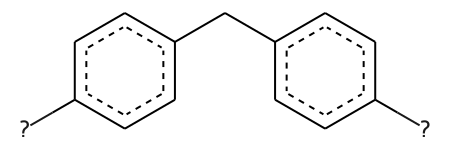

In [45]:
mol1